In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import json

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
import keras

2023-05-22 15:34:45.908746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
from keras.callbacks import EarlyStopping

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [26]:
color_data = pd.read_csv('rgb_color_labels.csv')
color_data.head()

red  green  blue  label
0   20    139   240   Blue
1  174     83    72  Brown
2  144    249   131  Green
3  168     25   156   Pink
4   30    182   136  Green

In [27]:
color_data.shape

(5052, 4)

In [28]:
color_data.isna().sum()

red      0
green    0
blue     0
label    0
dtype: int64

In [29]:
ohe_data = pd.get_dummies(color_data, columns=['label'])
ohe_data.head()

red  green  blue  label_Black  label_Blue  label_Brown  label_Green  \
0   20    139   240            0           1            0            0   
1  174     83    72            0           0            1            0   
2  144    249   131            0           0            0            1   
3  168     25   156            0           0            0            0   
4   30    182   136            0           0            0            1   

   label_Grey  label_Orange  label_Pink  label_Purple  label_Red  label_White  \
0           0             0           0             0          0            0   
1           0             0           0             0          0            0   
2           0             0           0             0          0            0   
3           0             0           1             0          0            0   
4           0             0           0             0          0            0   

   label_Yellow  
0             0  
1             0  
2             0  
3             0  
4             0

In [30]:
seed = 349893

X_train, X_test, y_train, y_test = train_test_split(ohe_data.loc[:, ['red', 'green', 'blue']].copy(),
                                                    ohe_data.drop(['red', 'green', 'blue'], axis=1),
                                                    test_size=0.2,
                                                    random_state=seed)

In [31]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4041, 3)
(4041, 11)
(1011, 3)
(1011, 11)


In [32]:
X_train.head()

red  green  blue
2860   66    184   240
4491  227    111   214
3778   43      1    66
527    61    127   159
2395   77    252    50

In [33]:
y_train.head()

label_Black  label_Blue  label_Brown  label_Green  label_Grey  \
2860            0           1            0            0           0   
4491            0           0            0            0           0   
3778            1           0            0            0           0   
527             0           1            0            0           0   
2395            0           0            0            1           0   

      label_Orange  label_Pink  label_Purple  label_Red  label_White  \
2860             0           0             0          0            0   
4491             0           1             0          0            0   
3778             0           0             0          0            0   
527              0           0             0          0            0   
2395             0           0             0          0            0   

      label_Yellow  
2860             0  
4491             0  
3778             0  
527              0  
2395             0

In [34]:
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential

In [35]:
baseline_model = Sequential()

baseline_model.add(Input(shape=(3,)))
baseline_model.add(Dense(11, activation='softmax'))

2023-05-22 15:34:48.988479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                44        
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [37]:
baseline_model.compile(loss='categorical_crossentropy',
                       metrics='accuracy')

In [38]:
summary = baseline_model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0, validation_split=0.2)

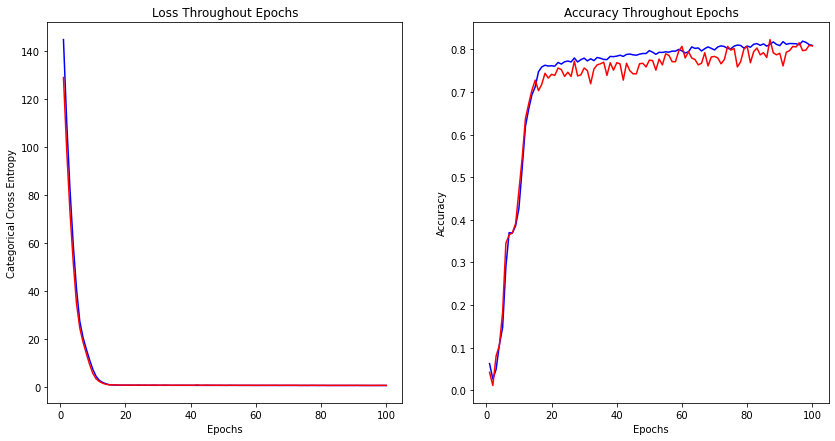

In [39]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 101), history['loss'], label='training', c='b')
plt.plot(range(1, 101), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 101), history['accuracy'], label='training', c='b')
plt.plot(range(1, 101), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

Our baseline model is essentially an instance of logistic regression - a neural network with no hidden layers, and a softmax output layer.

We see both training and validation loss decreasing smoothly, and training and validation accuracy increasing, up to about 20 epochs, then oscillating.

In [40]:
model2 = Sequential()

model2.add(Input(shape=(3,)))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(11, activation='softmax'))

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 7)                 28        
                                                                 
 dense_2 (Dense)             (None, 11)                88        
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


In [42]:
model2.compile(loss='categorical_crossentropy', metrics='accuracy')

In [43]:
summary = model2.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0, validation_split=0.2)

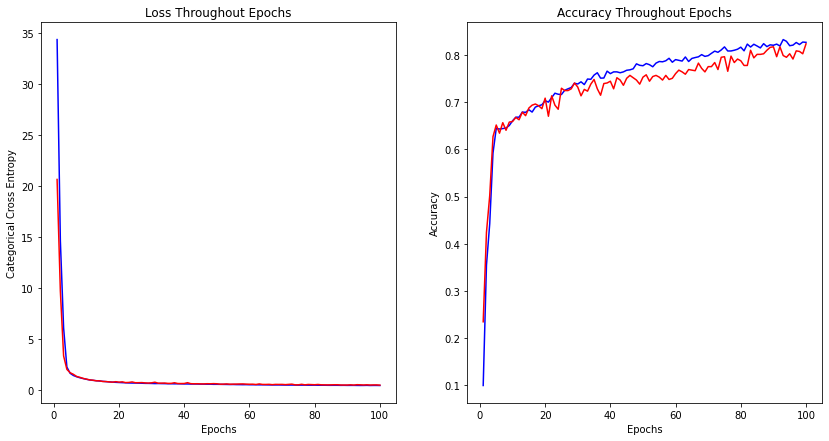

In [44]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 101), history['loss'], label='training', c='b')
plt.plot(range(1, 101), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 101), history['accuracy'], label='training', c='b')
plt.plot(range(1, 101), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [45]:
summary = model2.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

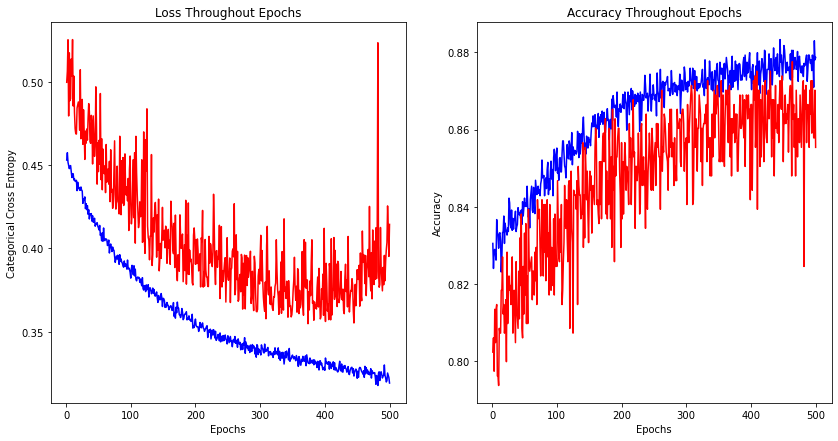

In [46]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

We see some overfitting happening with the addition of many more epochs of training, and a large amount of oscillation. Let's add regularization to our model.

In [47]:
model3 = Sequential()

model3.add(Input(shape=(3,)))
model3.add(Dense(7, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(11, activation='softmax'))

In [48]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 28        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_4 (Dense)             (None, 11)                88        
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


In [49]:
model3.compile(loss='categorical_crossentropy', metrics='accuracy')

In [50]:
summary = model3.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0, validation_split=0.2)

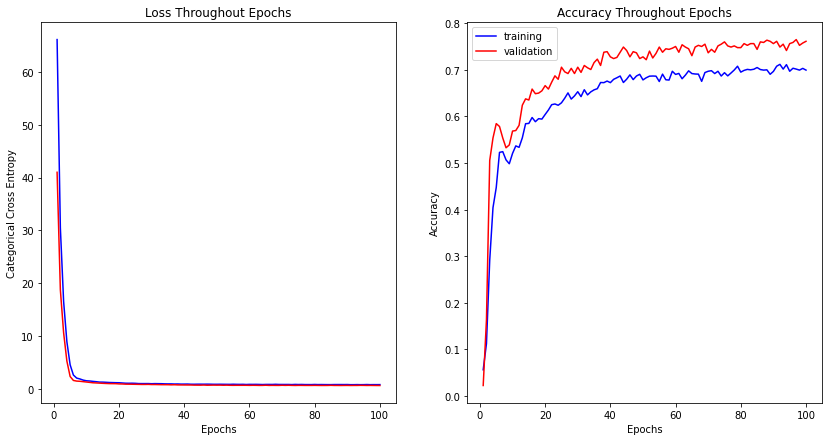

In [51]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 101), history['loss'], label='training', c='b')
plt.plot(range(1, 101), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 101), history['accuracy'], label='training', c='b')
plt.plot(range(1, 101), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1].legend();

Very strangely, validation accuracy has beaten training accuracy.

In [52]:
summary = model3.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

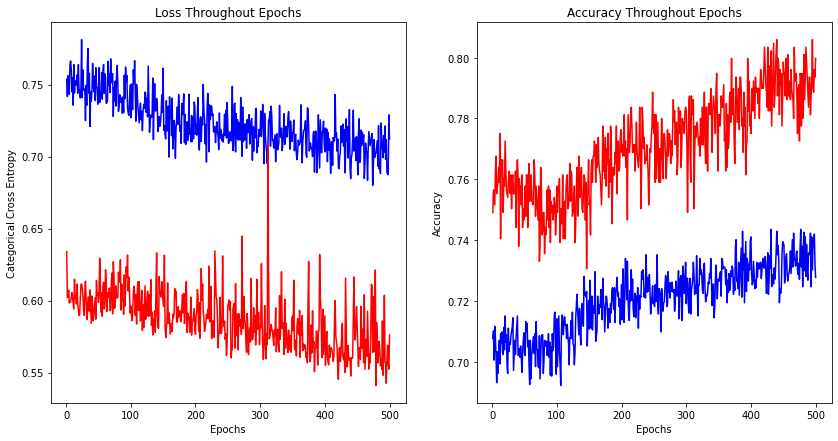

In [53]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [54]:
model4 = Sequential()

model4.add(Input(shape=(3,)))
model4.add(Dense(6, activation='relu'))
model4.add(Dense(9, activation='relu'))
model4.add(Dense(11, activation='softmax'))

In [55]:
model4.compile(loss='categorical_crossentropy', metrics='accuracy')

In [56]:
summary = model4.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

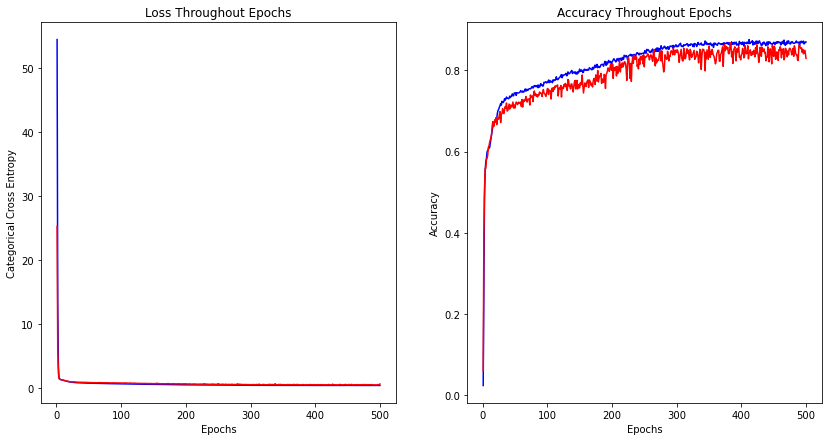

In [57]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [58]:
model5 = Sequential()

model5.add(Input(shape=(3,)))
model5.add(Dense(6, activation='relu'))
model5.add(Dense(9, activation='relu'))
model5.add(Dense(9, activation='relu'))
model5.add(Dense(11, activation='softmax'))

In [59]:
model5.compile(loss='categorical_crossentropy', metrics='accuracy')

In [60]:
summary = model5.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

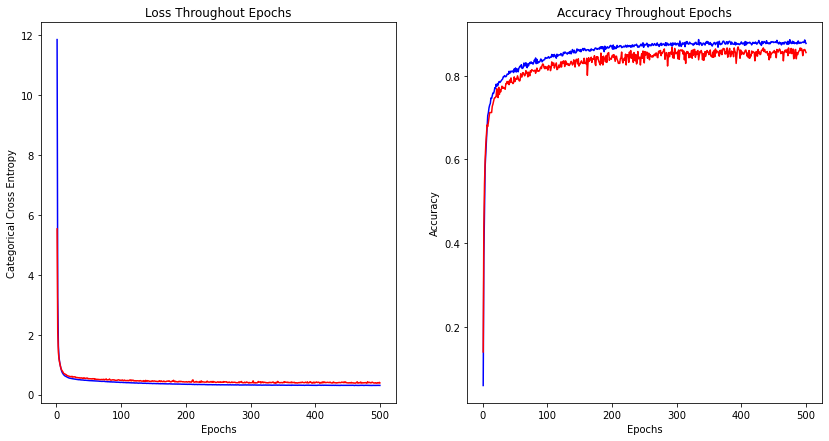

In [61]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [62]:
summary = model4.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

In [63]:
print(f"Best validation accuracy score: {np.max(summary.history['val_accuracy'])}")
print(f"Occurred after: {np.argmax(summary.history['val_accuracy']) + 1} epochs")

Best validation accuracy score: 0.8714462518692017
Occurred after: 425 epochs


In [64]:
model6 = Sequential()

model6.add(Input(shape=(3,)))
model6.add(Dense(18, activation='relu'))
model6.add(Dense(33, activation='relu'))
model6.add(Dense(22, activation='relu'))
model6.add(Dense(11, activation='softmax'))

In [65]:
model6.compile(loss='categorical_crossentropy', metrics='accuracy')

In [66]:
summary = model6.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

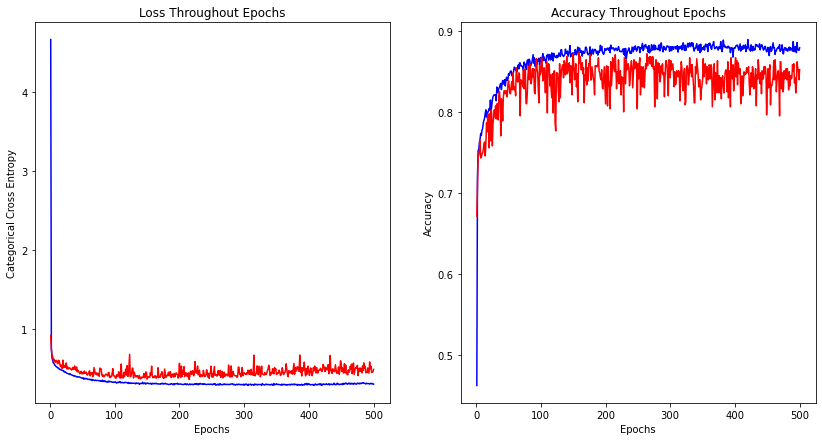

In [67]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [68]:
model7 = Sequential()

model7.add(Input(shape=(3,)))
model7.add(Dense(18, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(33, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(22, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(11, activation='softmax'))

In [69]:
model7.compile(loss='categorical_crossentropy', metrics='accuracy')

In [70]:
summary = model7.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

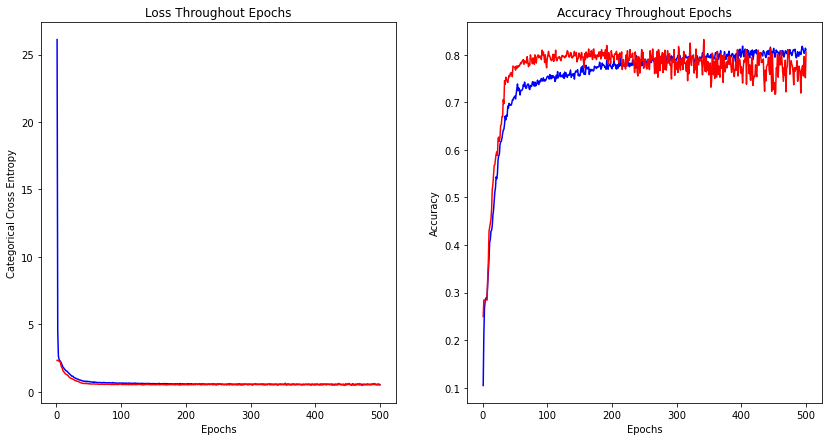

In [71]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

Model 4 has had the best performance so far. Let's test the model's performance on the holdout test set.

In [72]:
early_stop = EarlyStopping(monitor="accuracy", patience=5, verbose=0)

In [73]:
summary = model4.fit(X_train, y_train, batch_size=50, epochs=500, callbacks=[early_stop], verbose=0)

In [74]:
summary.history

{'loss': [0.35115450620651245,
  0.35039642453193665,
  0.35304635763168335,
  0.3499549627304077,
  0.34545475244522095,
  0.342856764793396,
  0.342789888381958,
  0.34091460704803467,
  0.33983948826789856,
  0.3416273891925812,
  0.3447823226451874,
  0.34220585227012634,
  0.34063878655433655,
  0.3477057218551636,
  0.34353968501091003],
 'accuracy': [0.8671121001243591,
  0.8663697242736816,
  0.8671121001243591,
  0.8631526827812195,
  0.8688443303108215,
  0.8705765604972839,
  0.8643900156021118,
  0.8658747673034668,
  0.868101954460144,
  0.8730512261390686,
  0.869586706161499,
  0.8710715174674988,
  0.8698341846466064,
  0.867607057094574,
  0.8688443303108215]}

In [75]:
y_test_probs = model4.predict(X_test)

32/32 [==============================] - 0s 495us/step


In [76]:
y_test_preds = [np.argmax(example) for example in y_test_probs]

In [77]:
mapping = dict(zip(y_test.columns, range(11)))

In [78]:
y_test_true = y_test.idxmax(axis=1).replace(mapping)

In [79]:
print(classification_report(y_test_true, y_test_preds))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.90      0.95      0.92       223
           2       0.81      0.82      0.81        83
           3       0.95      0.85      0.90       295
           4       0.58      0.58      0.58        24
           5       0.66      0.84      0.74        37
           6       0.80      0.92      0.86       127
           7       0.86      0.64      0.74       104
           8       0.86      0.84      0.85        44
           9       0.50      0.75      0.60         4
          10       0.64      0.82      0.72        60

    accuracy                           0.85      1011
   macro avg       0.78      0.80      0.78      1011
weighted avg       0.86      0.85      0.85      1011



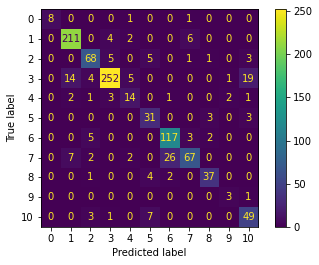

In [80]:
ConfusionMatrixDisplay(
confusion_matrix(y_test_true, y_test_preds)
).plot();

The below code makes a copy of color_data (the original dataset), adds a column for model predictions, and then prints out the examples on which the model made an error.

In [90]:
color_data_aug = color_data.copy()

In [94]:
all_data_preds = [np.argmax(example) for example in model4.predict(color_data_aug.drop(['label'], axis=1))]

158/158 [==============================] - 0s 465us/step


In [95]:
color_data_aug['prediction'] = all_data_preds

In [96]:
color_data_aug.head()

red  green  blue  label  prediction
0   20    139   240   Blue           1
1  174     83    72  Brown           2
2  144    249   131  Green           3
3  168     25   156   Pink           6
4   30    182   136  Green           3

In [98]:
reverse_mapping = dict(zip(range(11), y_test.columns))

In [123]:
with open('model_class_mapping.json', 'w') as f:
    json.dump(reverse_mapping, f)

In [100]:
color_data_aug['prediction'] = color_data_aug.prediction.replace(reverse_mapping)

In [101]:
color_data_aug.head()

red  green  blue  label   prediction
0   20    139   240   Blue   label_Blue
1  174     83    72  Brown  label_Brown
2  144    249   131  Green  label_Green
3  168     25   156   Pink   label_Pink
4   30    182   136  Green  label_Green

In [104]:
color_data_aug['prediction'] = color_data_aug.prediction.map(lambda x: x.split('_')[1])

In [105]:
color_data_aug.head()

red  green  blue  label prediction
0   20    139   240   Blue       Blue
1  174     83    72  Brown      Brown
2  144    249   131  Green      Green
3  168     25   156   Pink       Pink
4   30    182   136  Green      Green

In [106]:
color_data_aug.loc[color_data_aug.label != color_data_aug.prediction]

red  green  blue   label prediction
9      38      3    64    Blue     Purple
11    249     99   108    Pink        Red
14    125    103   236    Blue     Purple
36    187    191   105   Green     Yellow
39     91     77   165  Purple       Blue
...   ...    ...   ...     ...        ...
4977  169     47   254    Pink     Purple
4979  214    199   236    Grey       Pink
4981  175    103     4  Orange      Brown
4985  119     98   134    Grey     Purple
4990  230     94    86  Orange        Red

[676 rows x 5 columns]

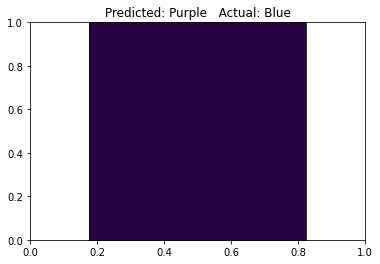

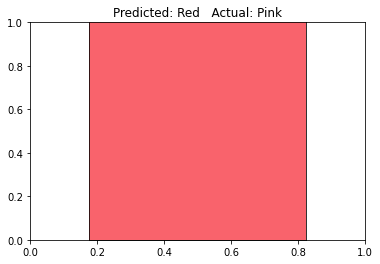

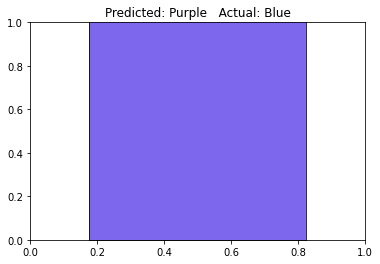

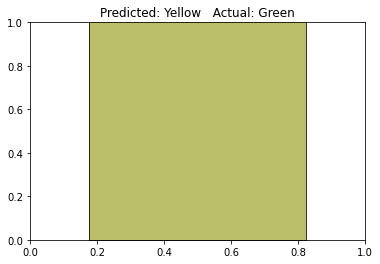

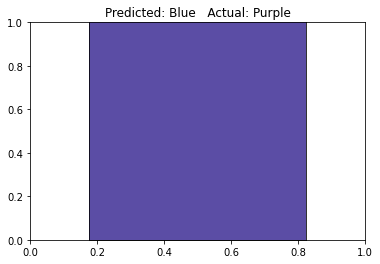

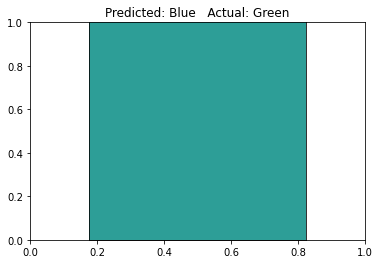

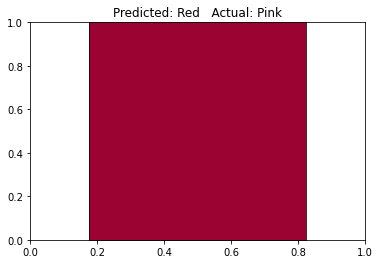

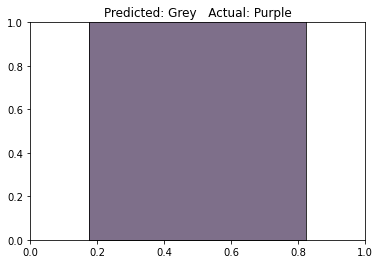

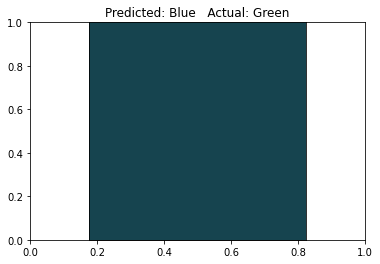

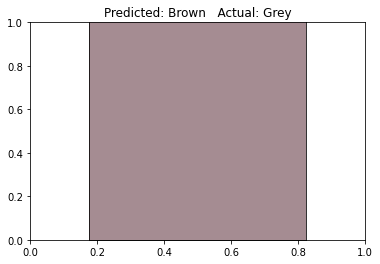

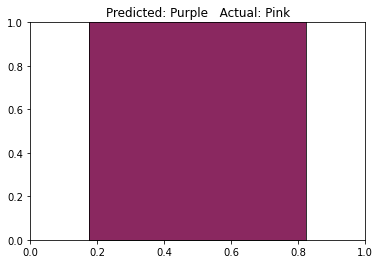

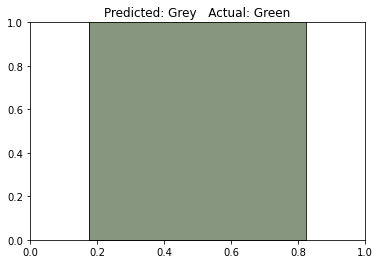

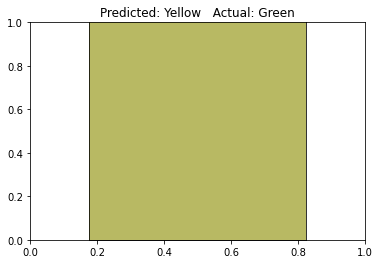

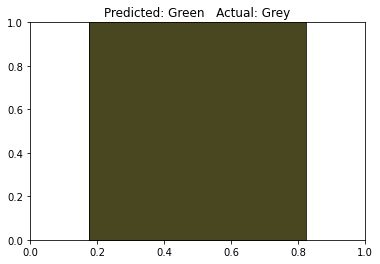

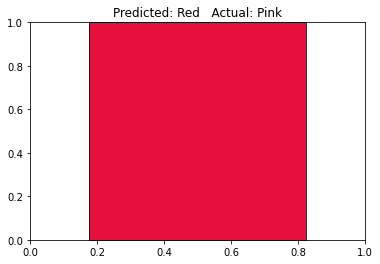

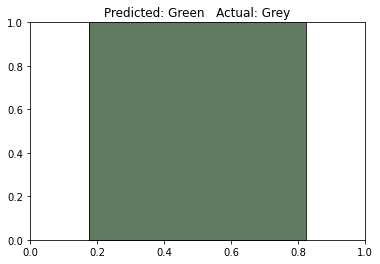

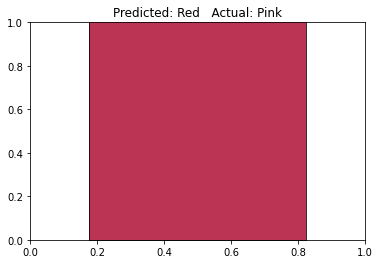

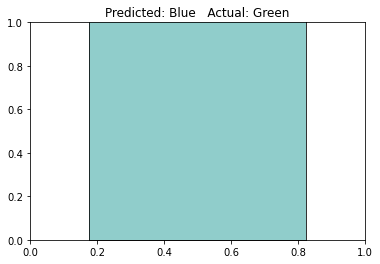

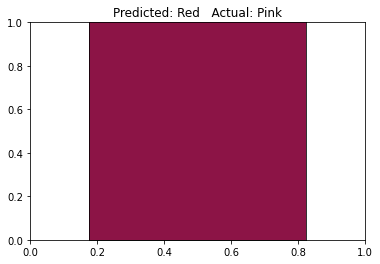

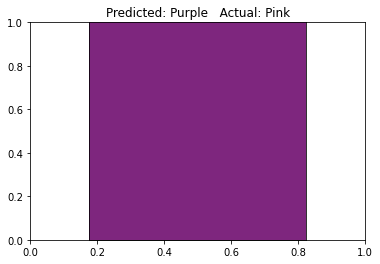

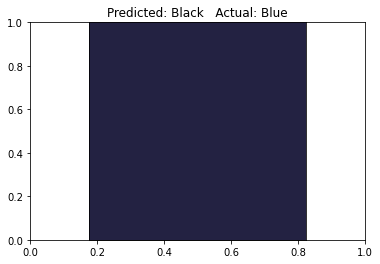

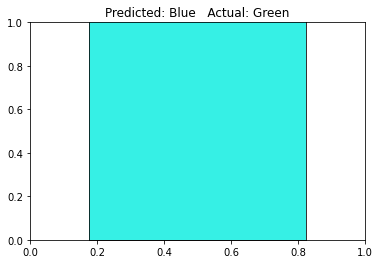

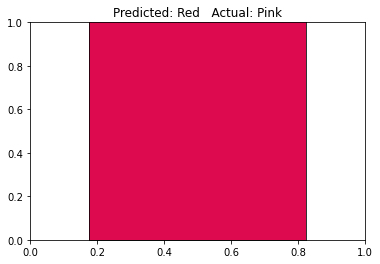

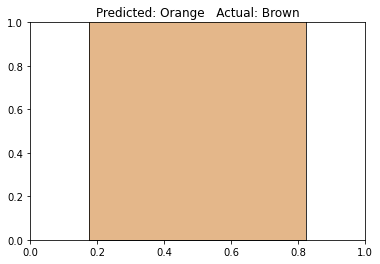

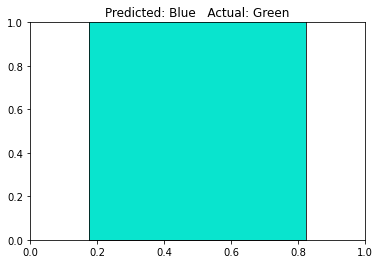

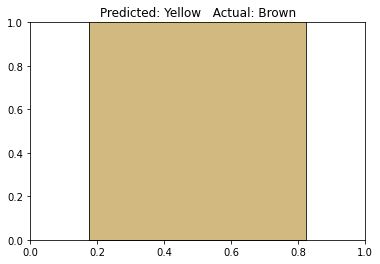

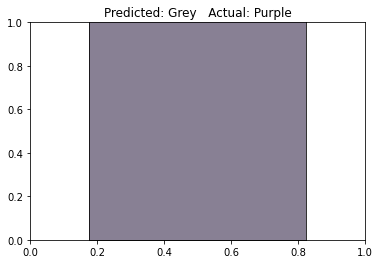

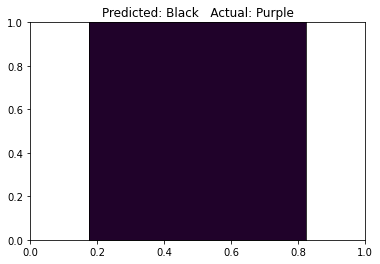

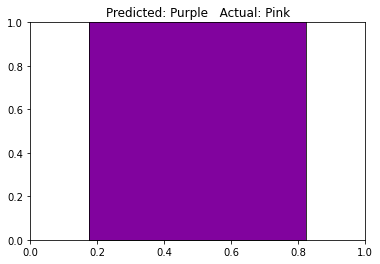

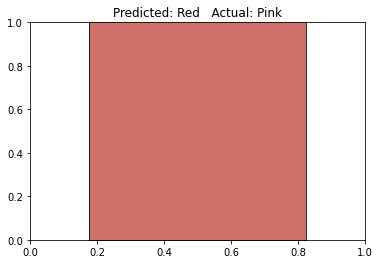

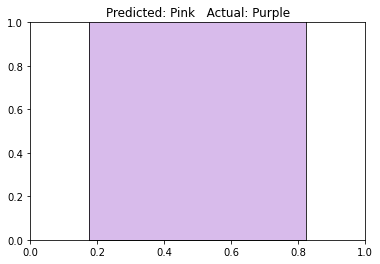

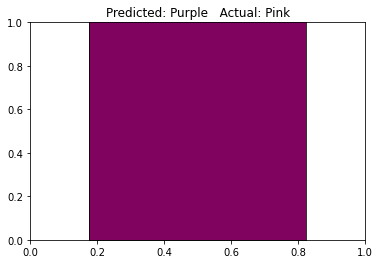

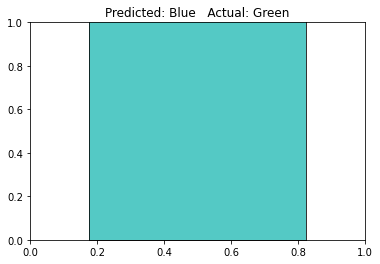

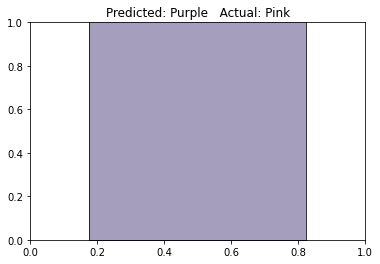

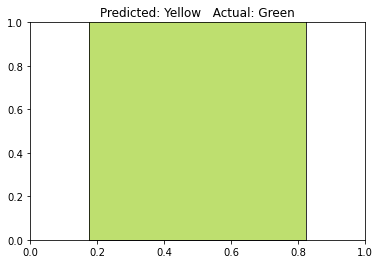

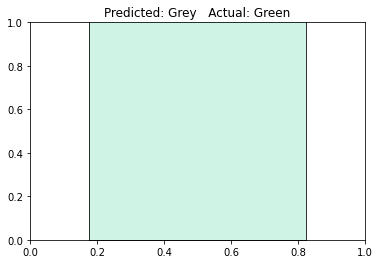

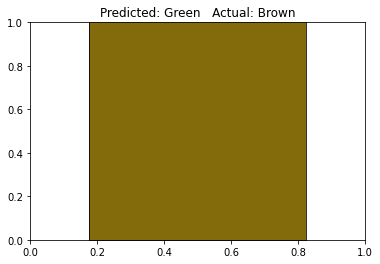

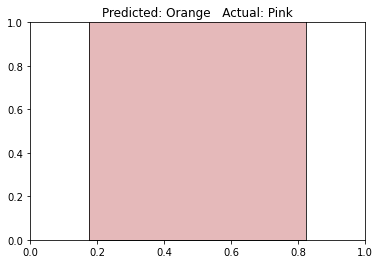

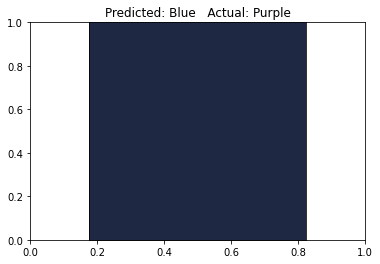

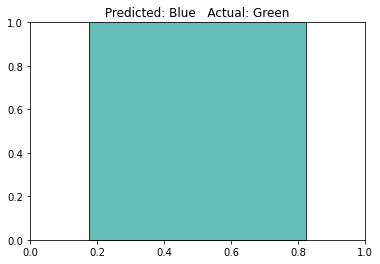

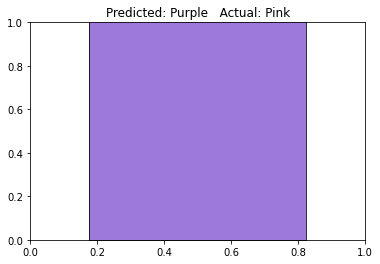

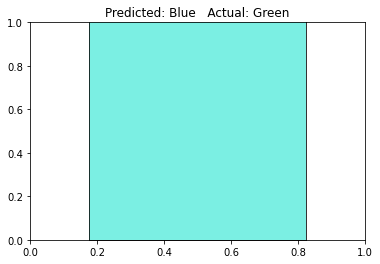

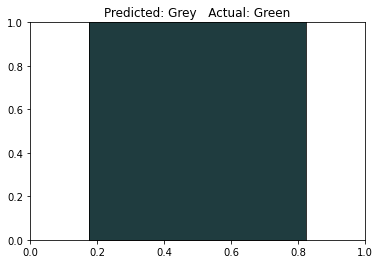

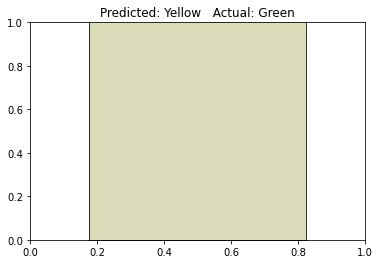

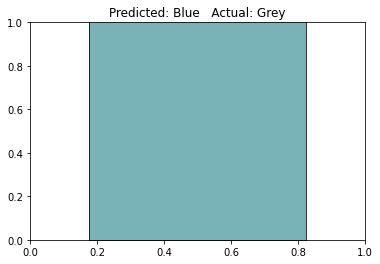

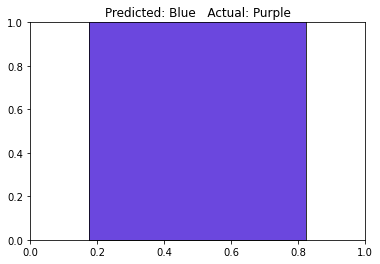

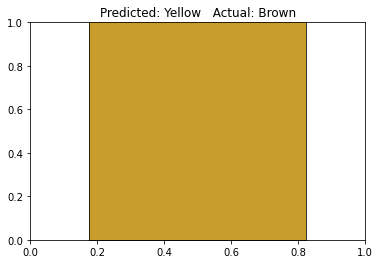

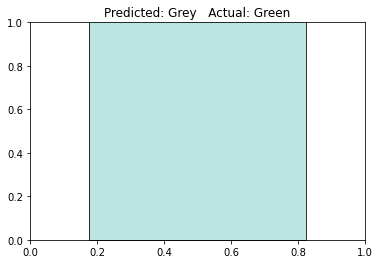

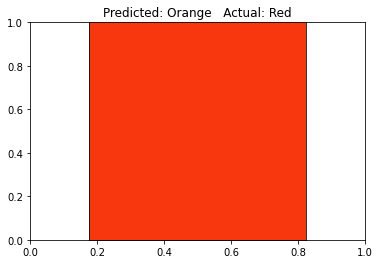

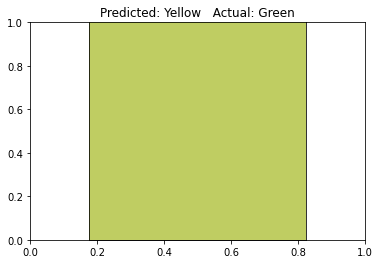

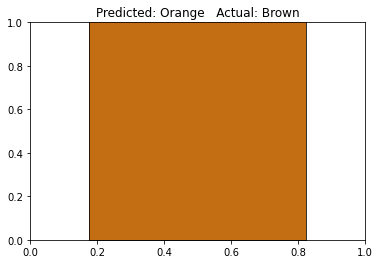

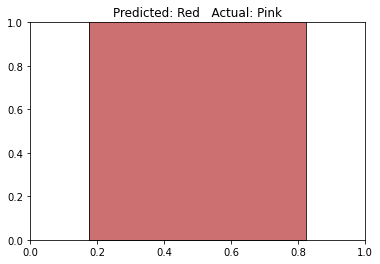

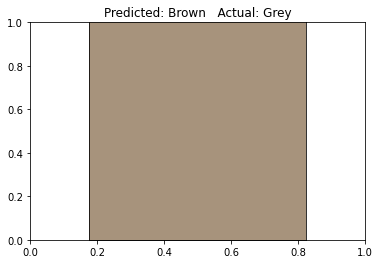

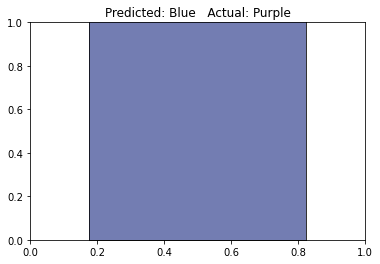

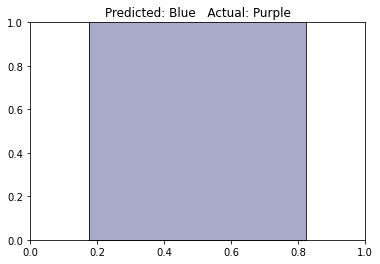

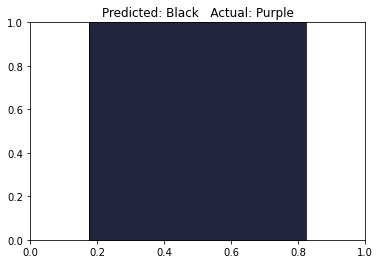

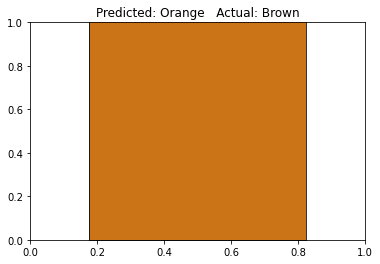

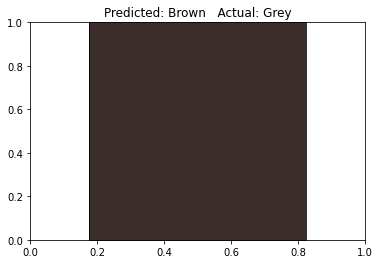

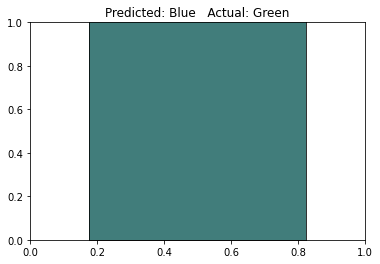

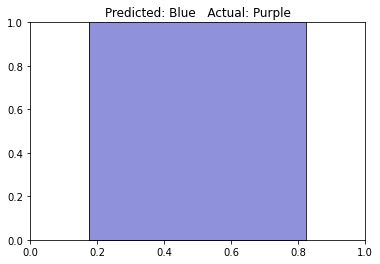

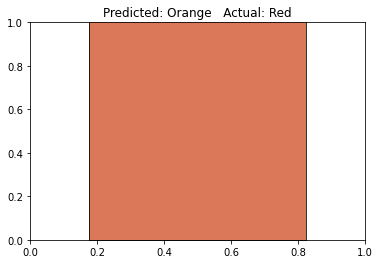

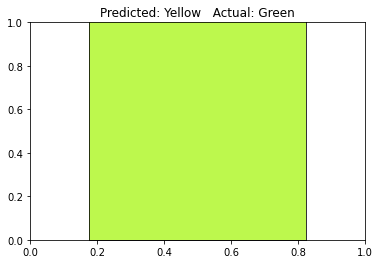

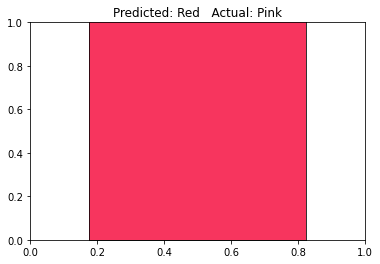

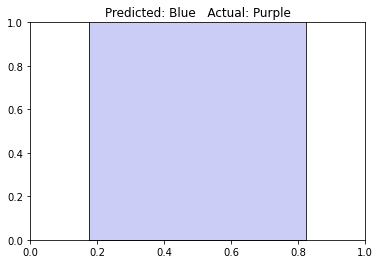

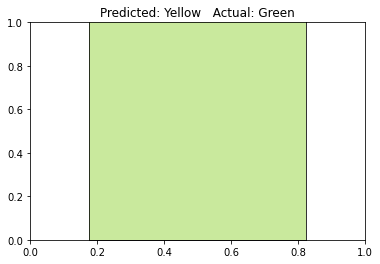

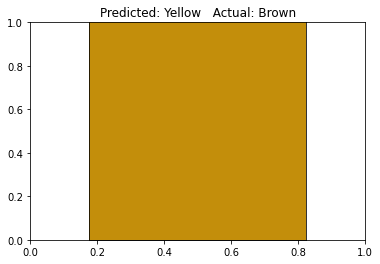

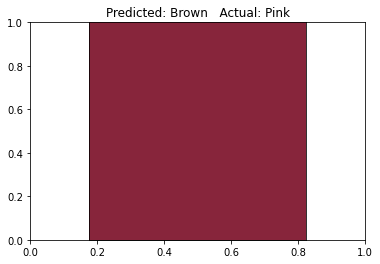

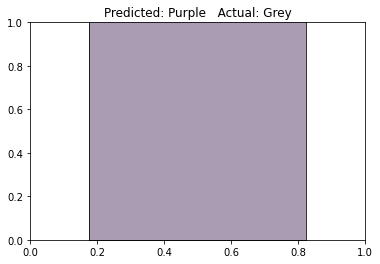

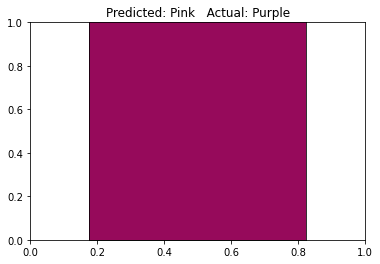

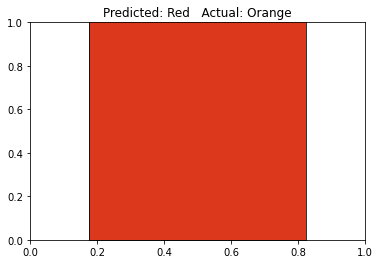

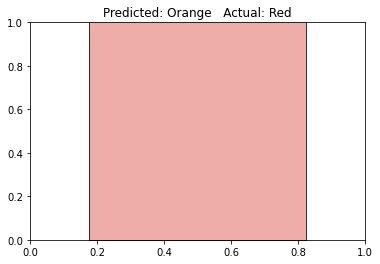

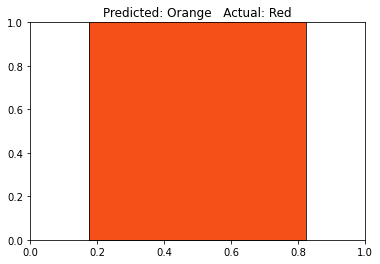

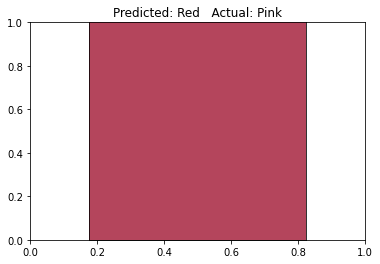

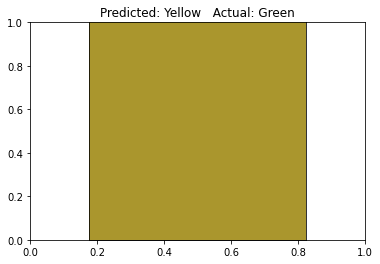

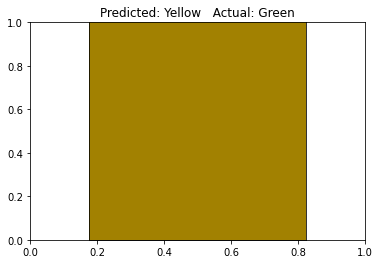

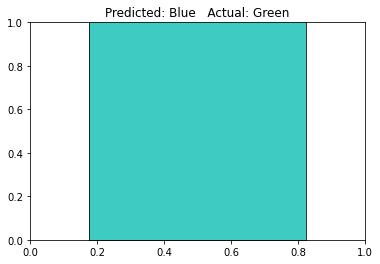

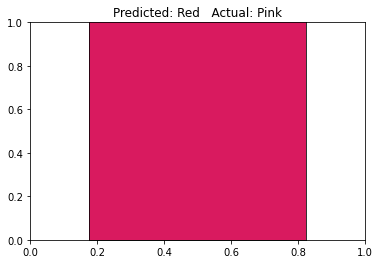

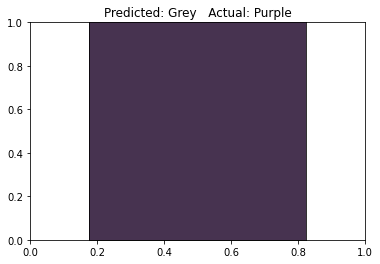

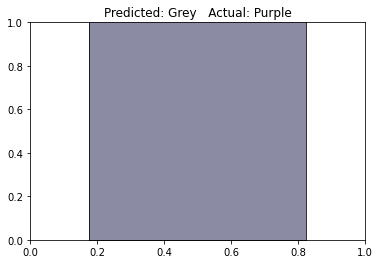

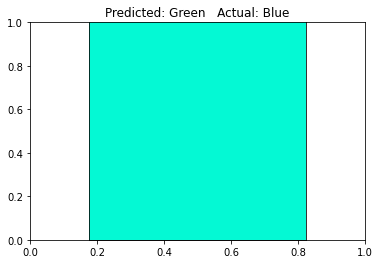

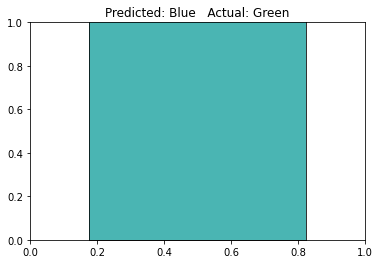

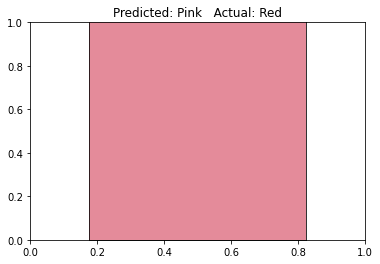

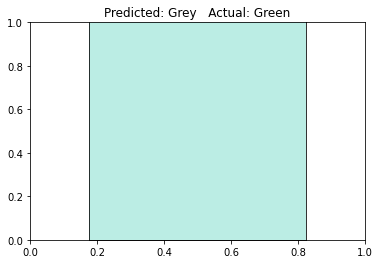

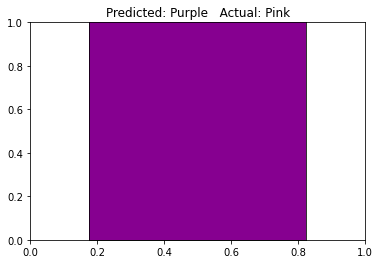

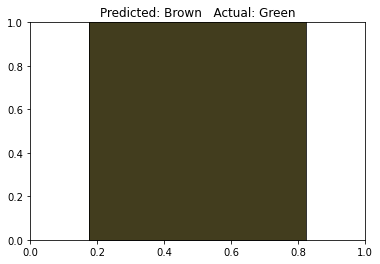

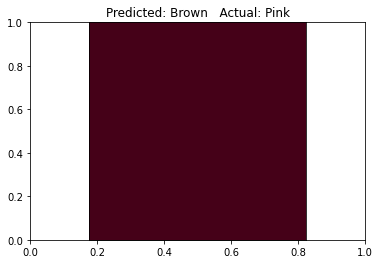

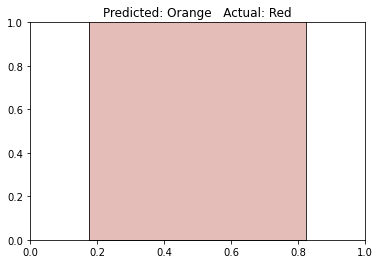

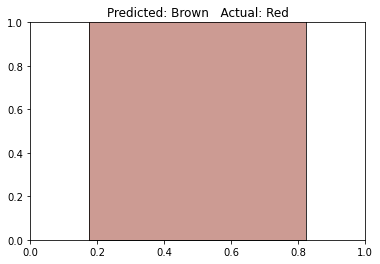

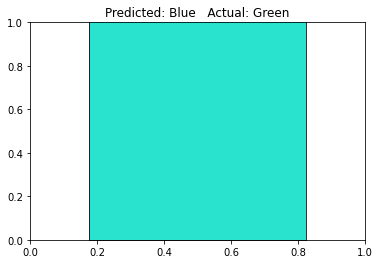

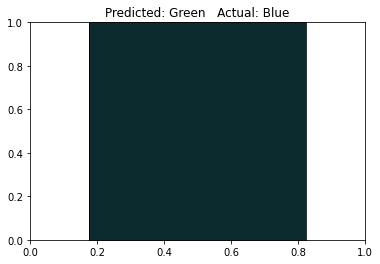

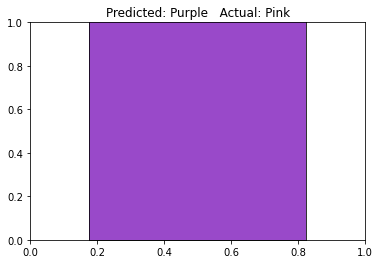

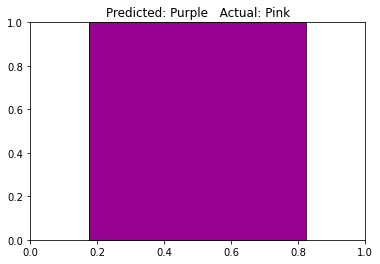

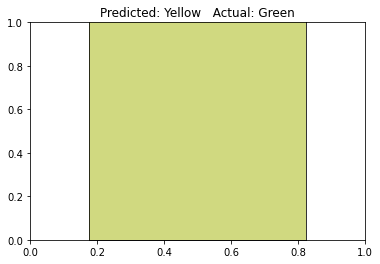

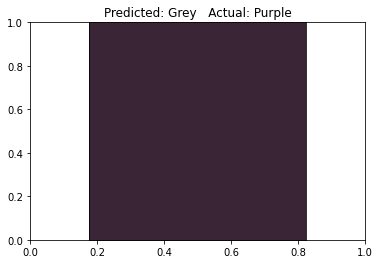

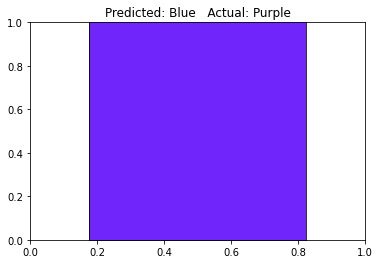

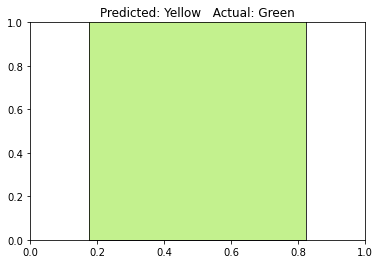

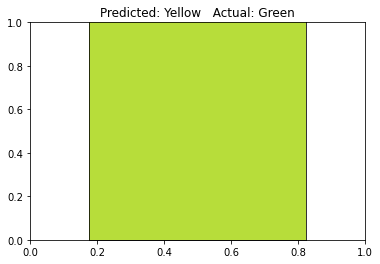

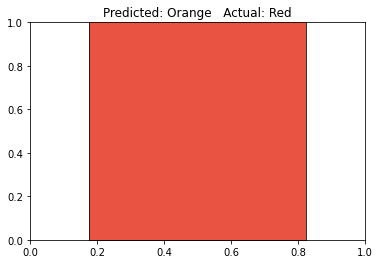

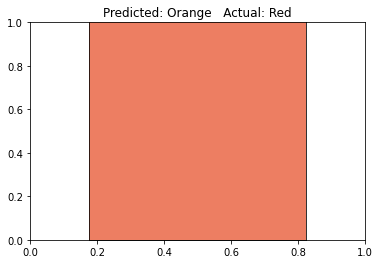

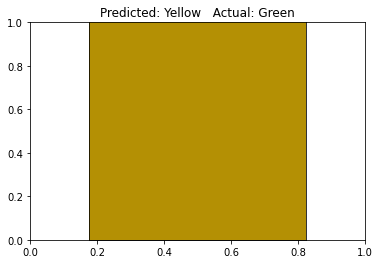

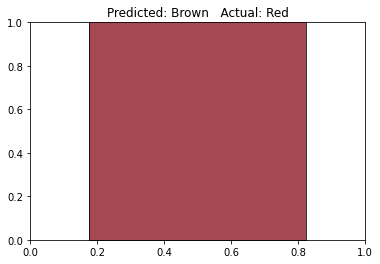

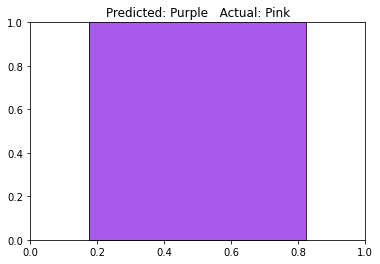

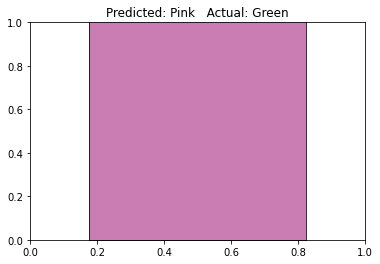

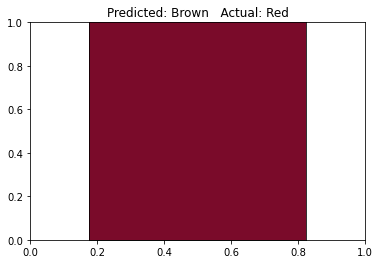

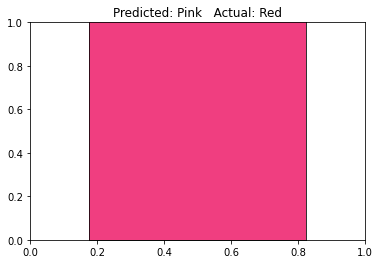

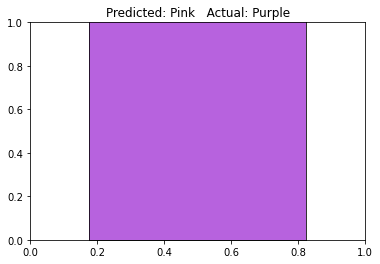

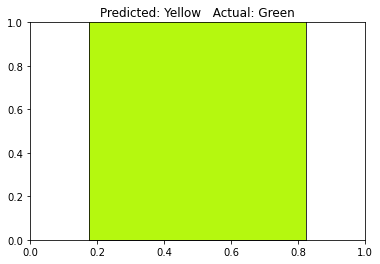

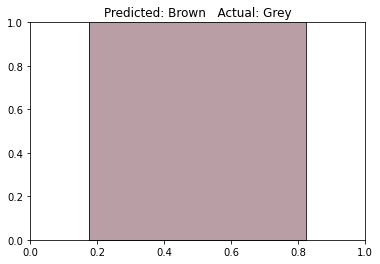

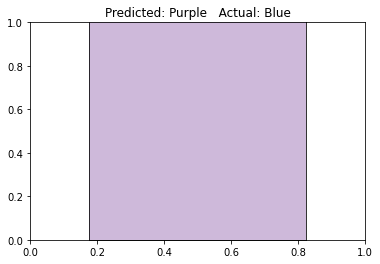

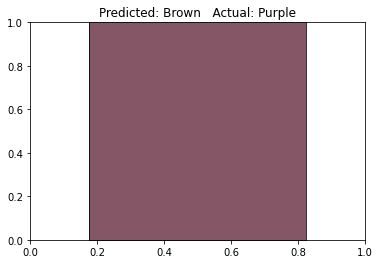

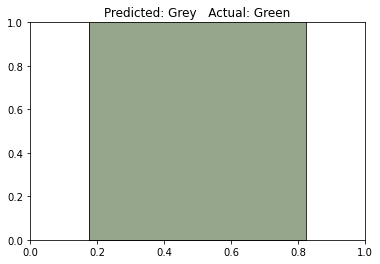

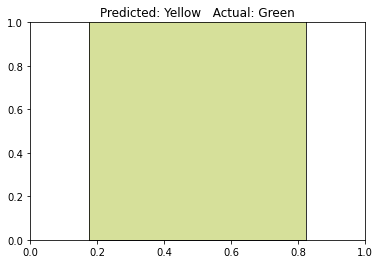

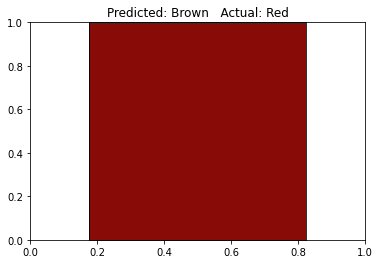

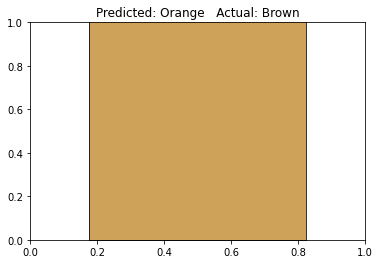

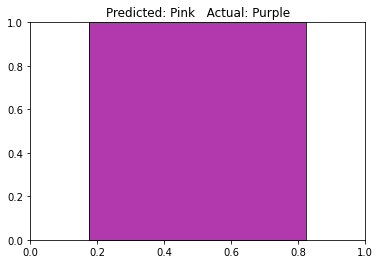

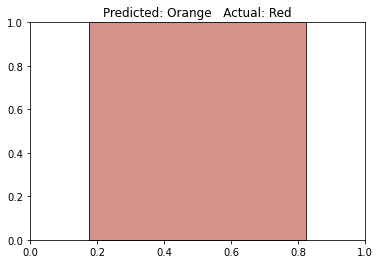

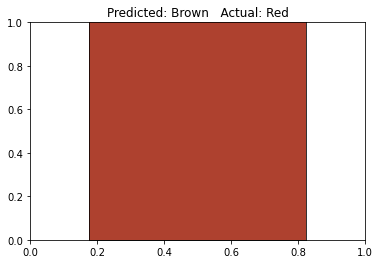

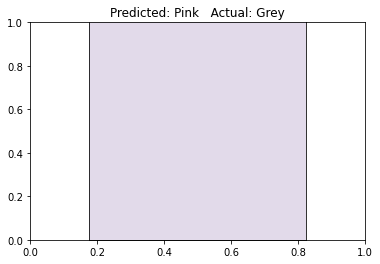

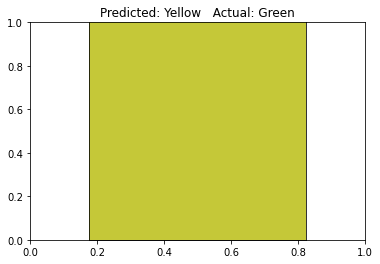

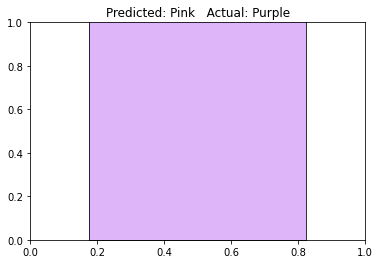

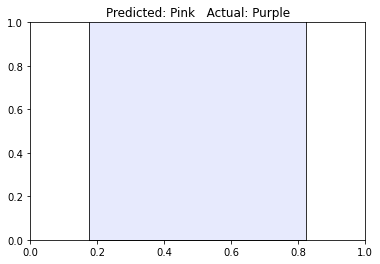

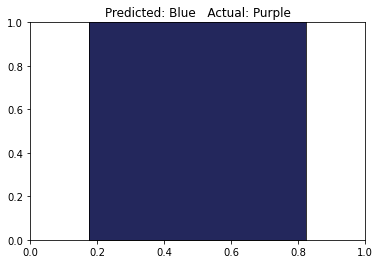

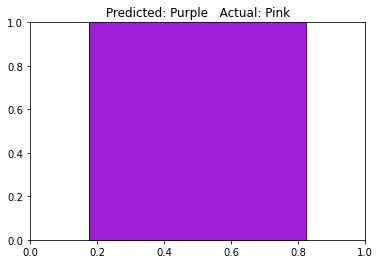

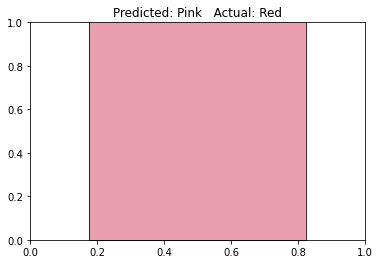

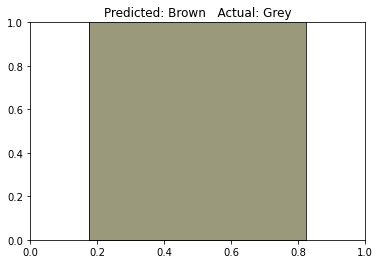

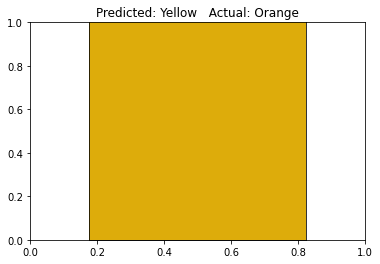

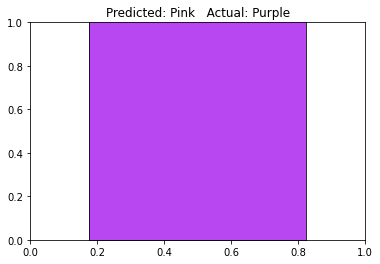

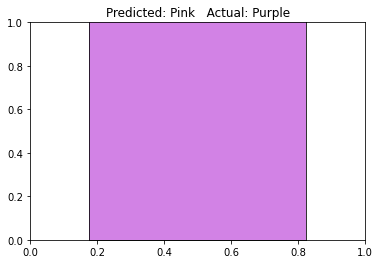

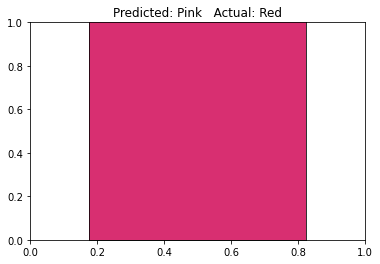

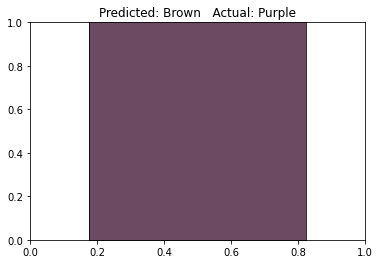

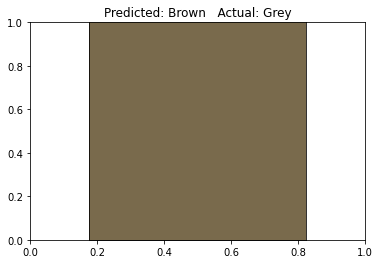

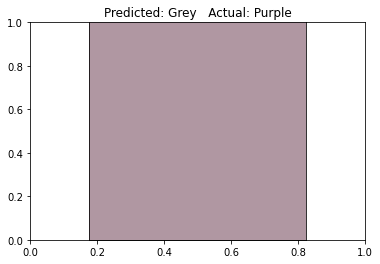

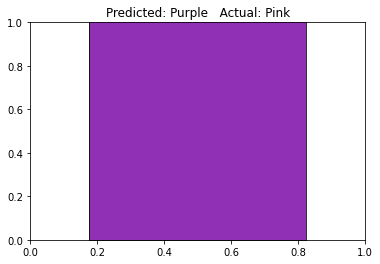

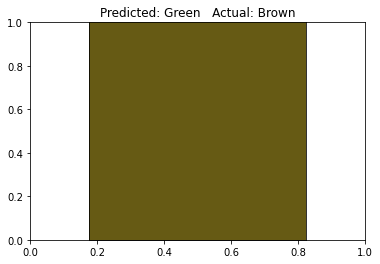

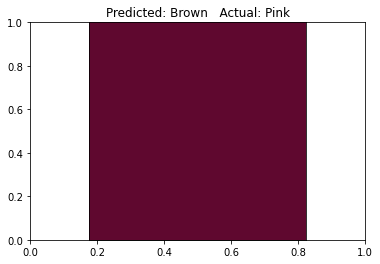

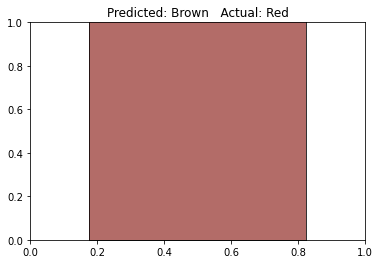

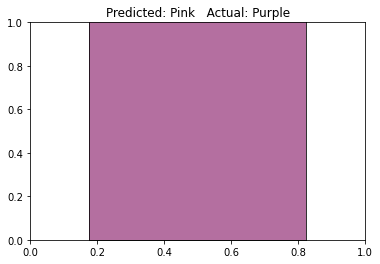

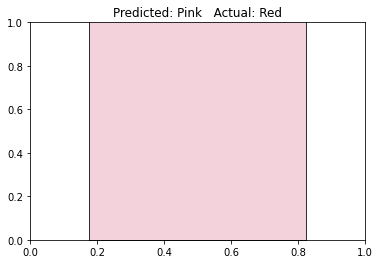

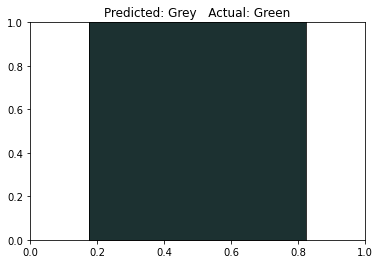

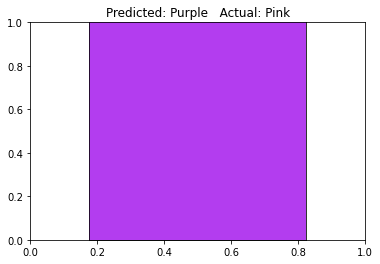

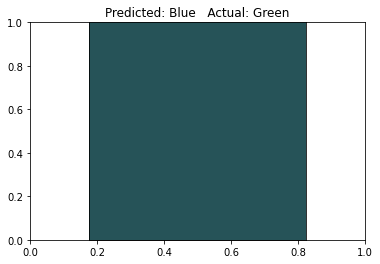

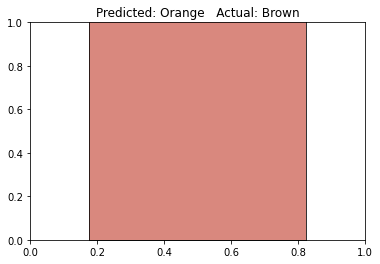

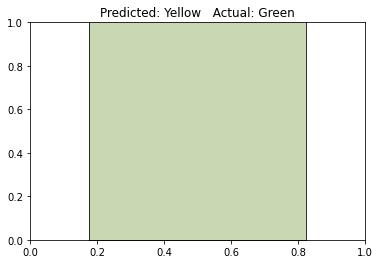

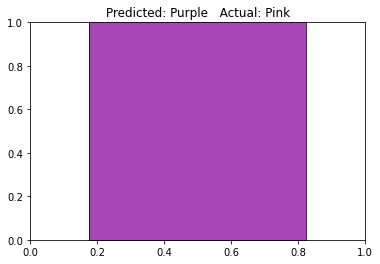

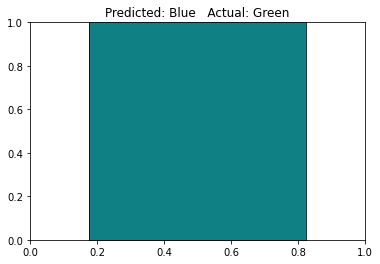

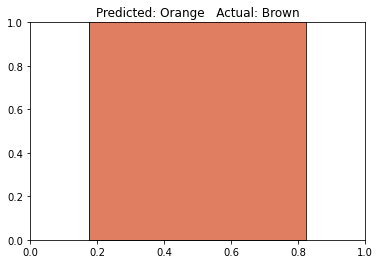

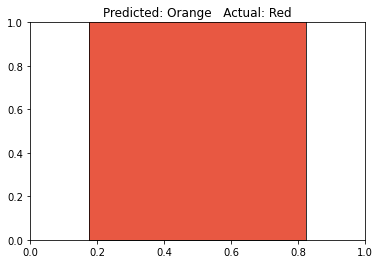

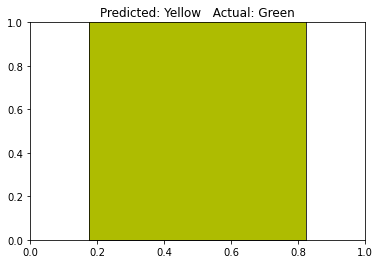

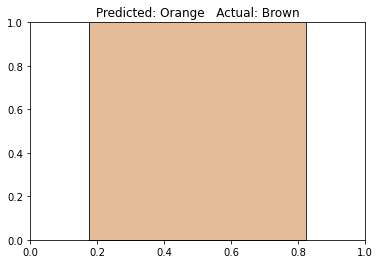

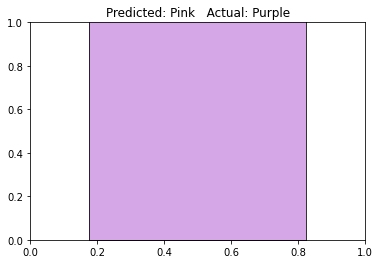

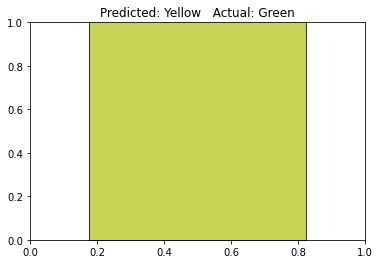

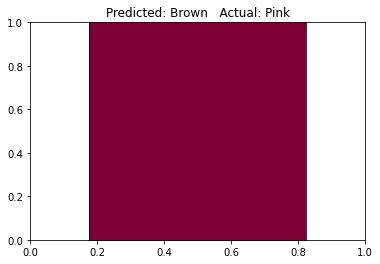

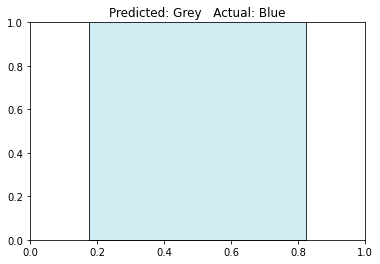

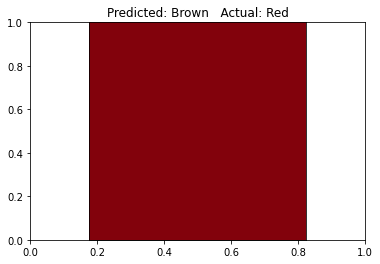

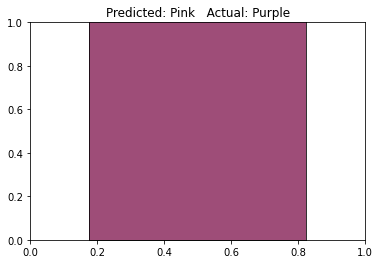

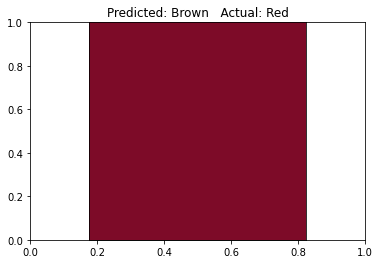

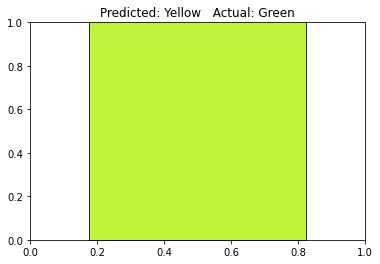

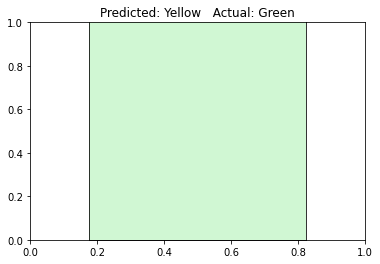

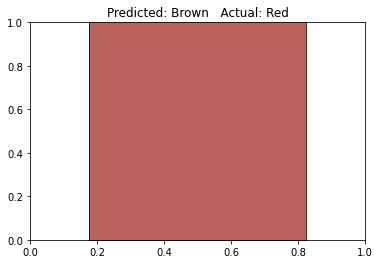

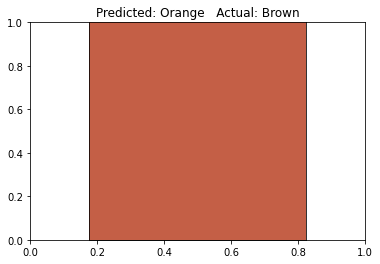

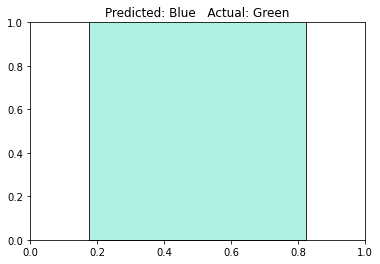

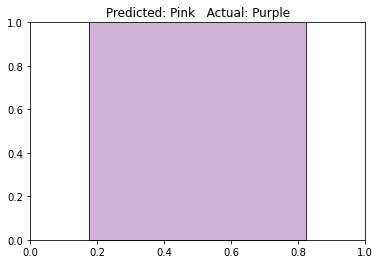

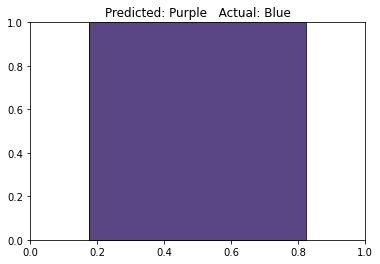

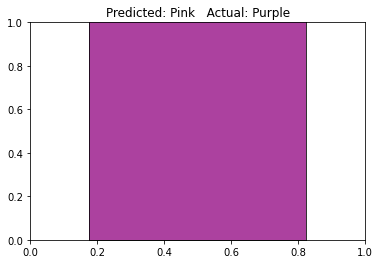

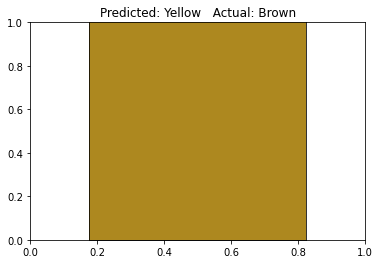

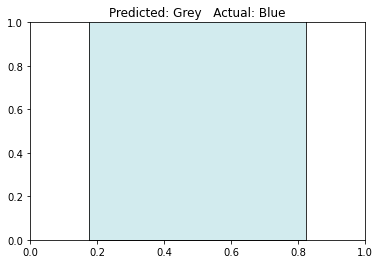

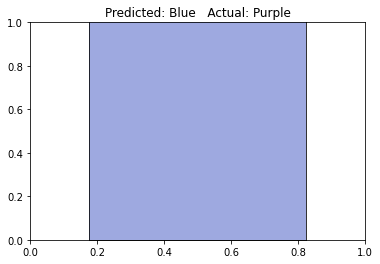

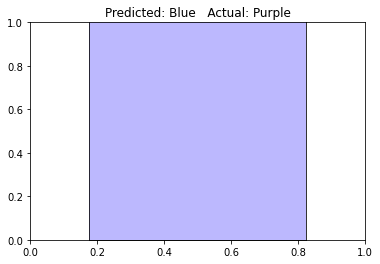

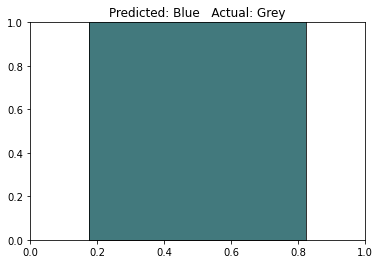

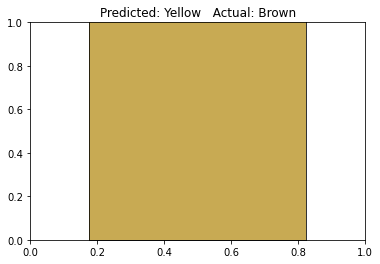

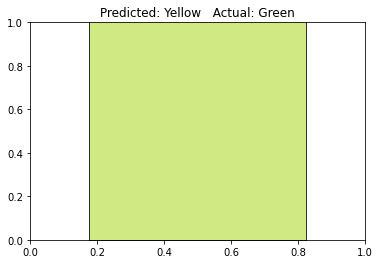

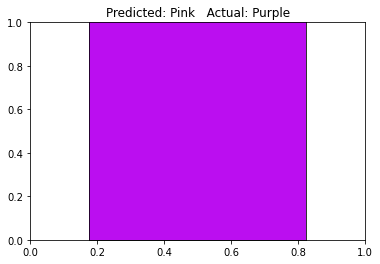

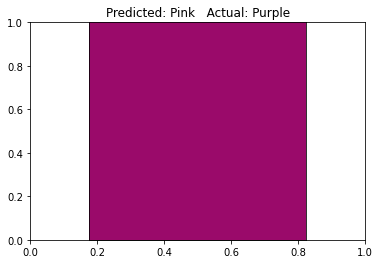

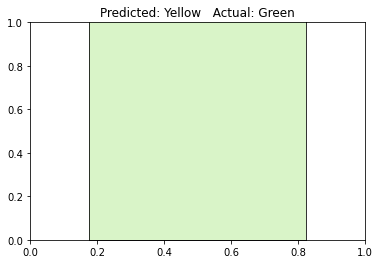

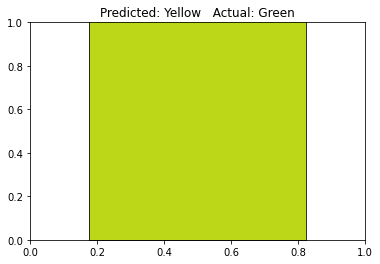

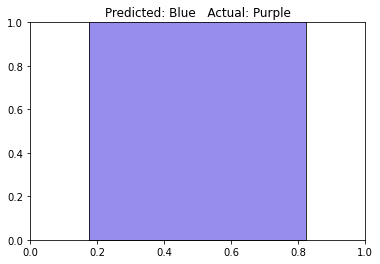

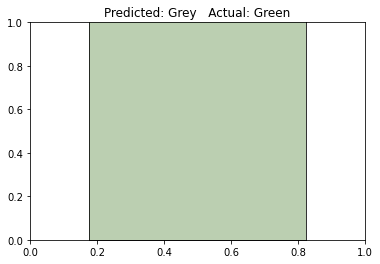

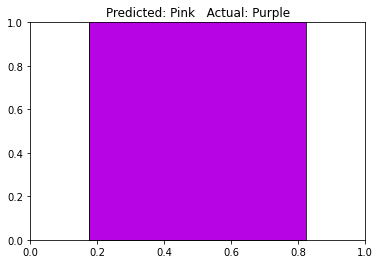

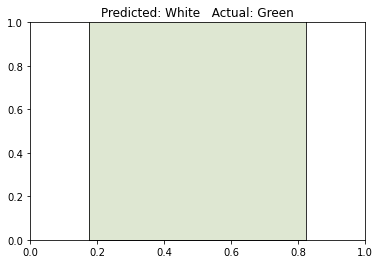

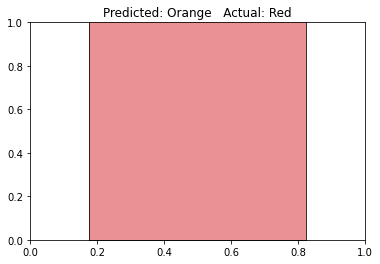

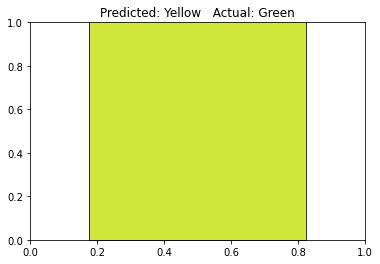

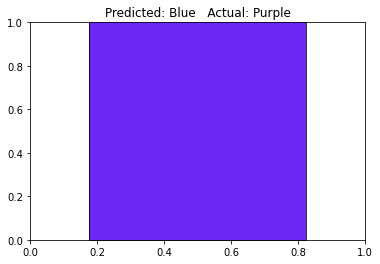

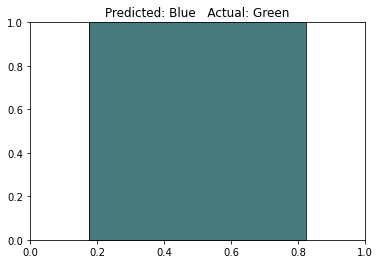

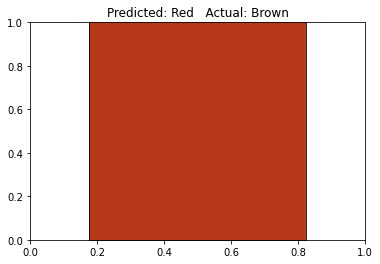

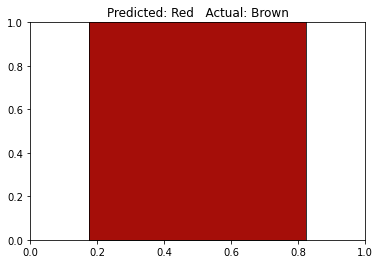

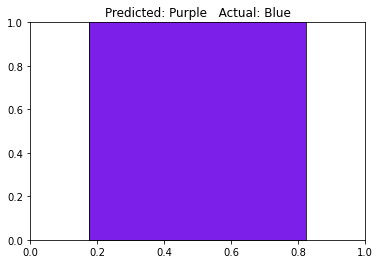

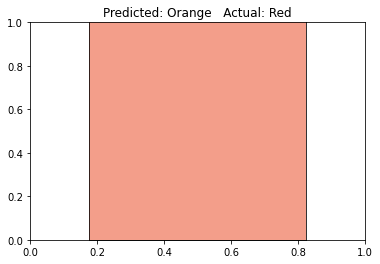

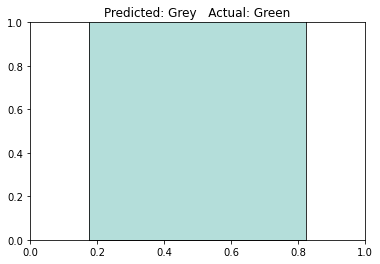

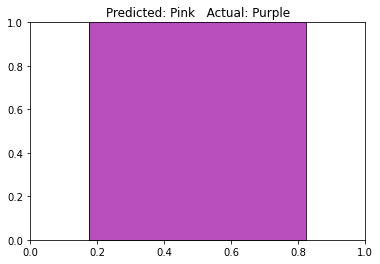

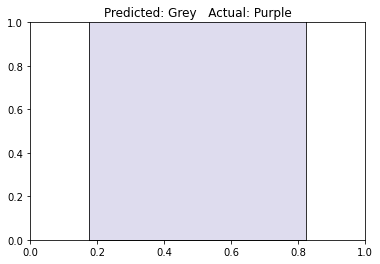

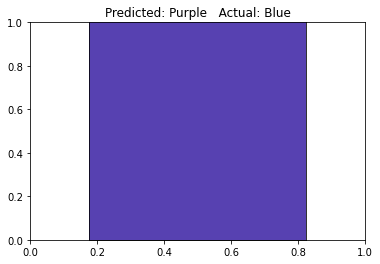

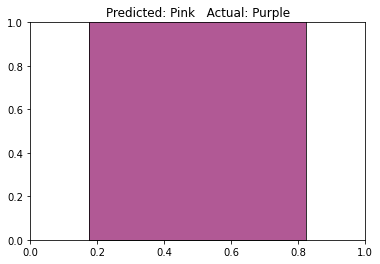

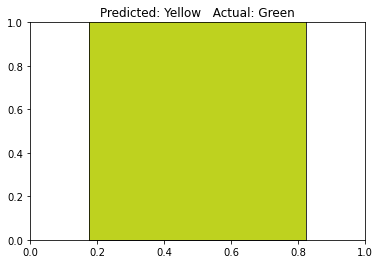

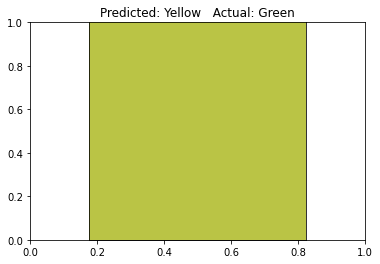

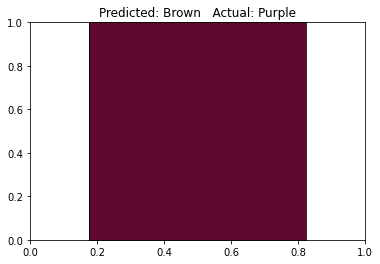

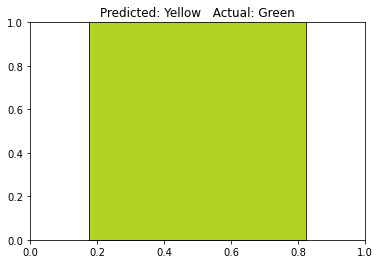

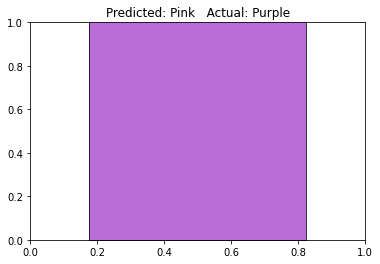

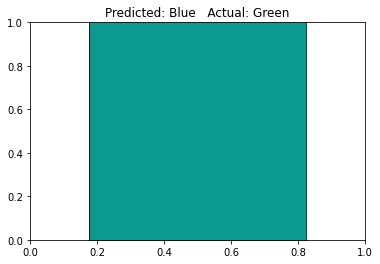

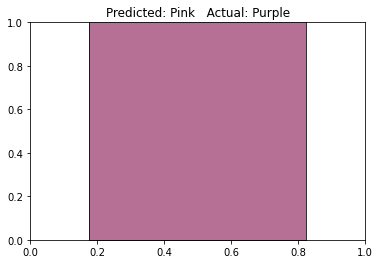

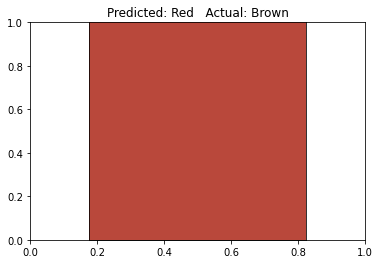

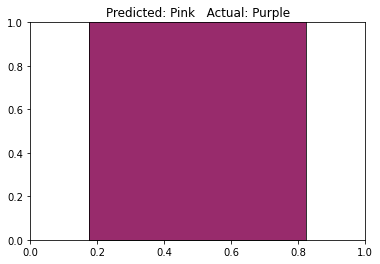

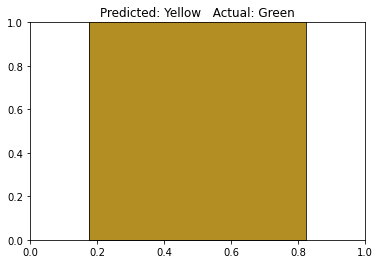

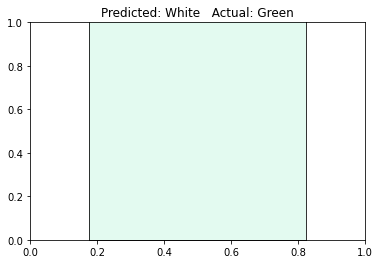

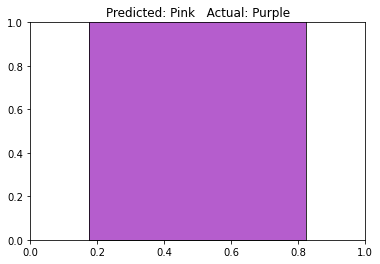

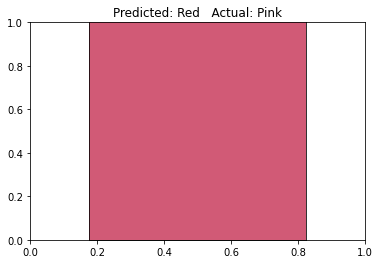

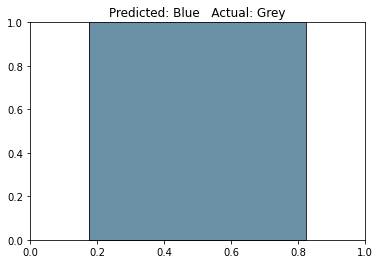

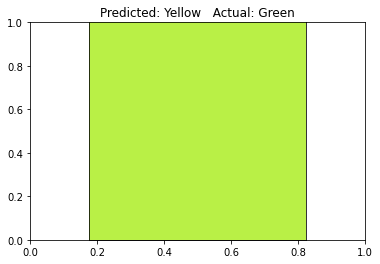

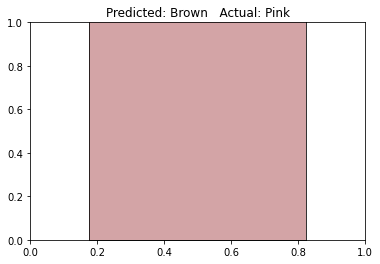

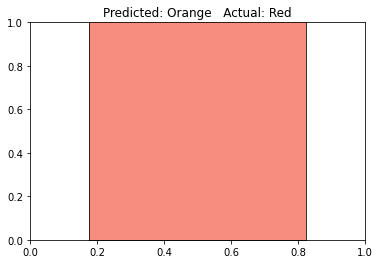

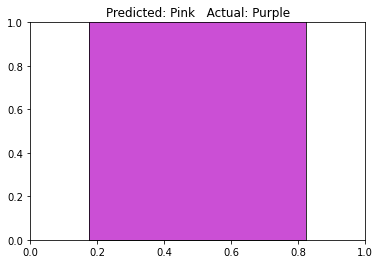

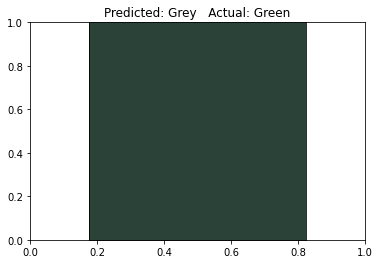

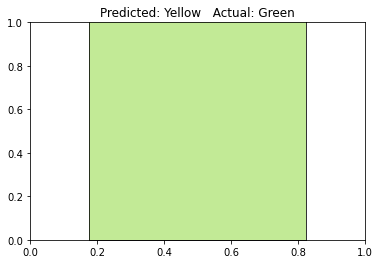

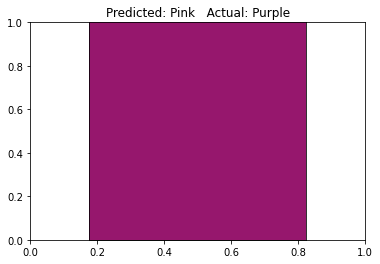

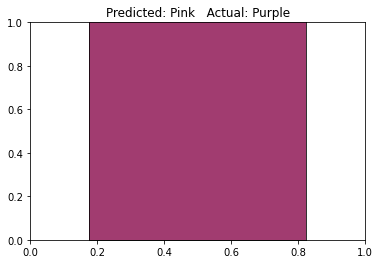

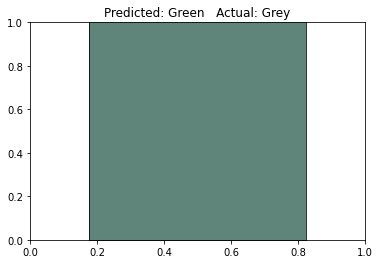

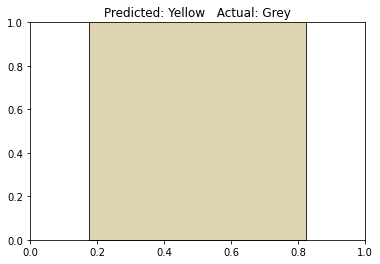

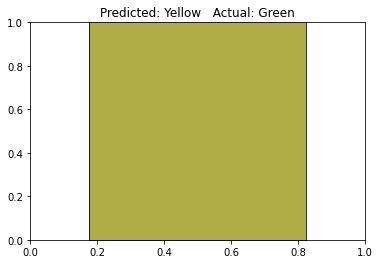

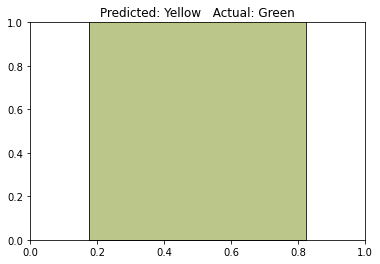

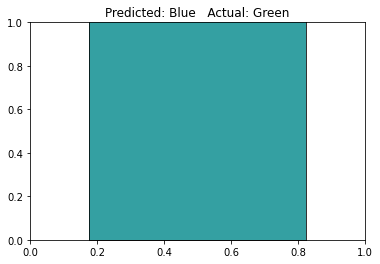

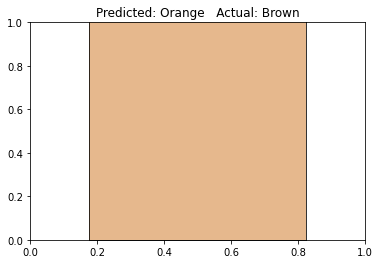

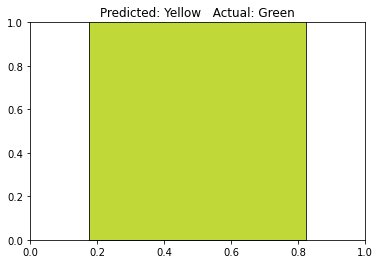

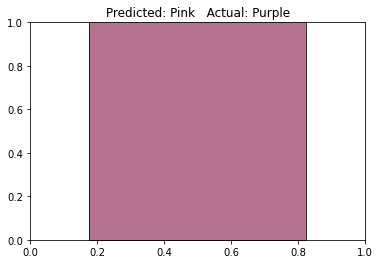

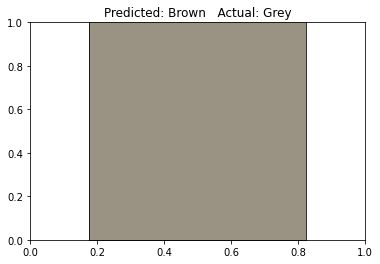

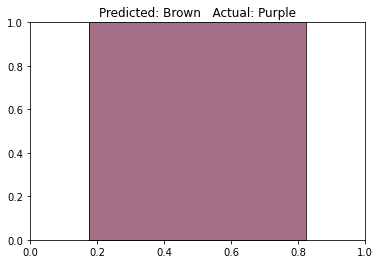

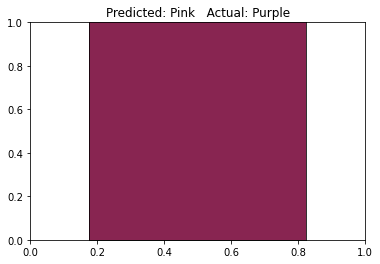

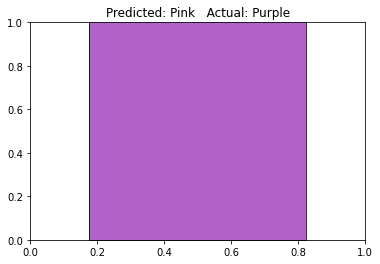

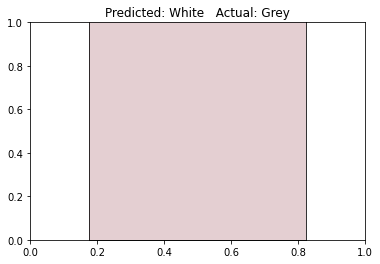

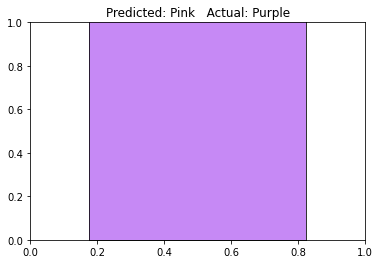

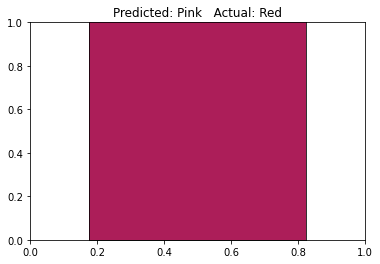

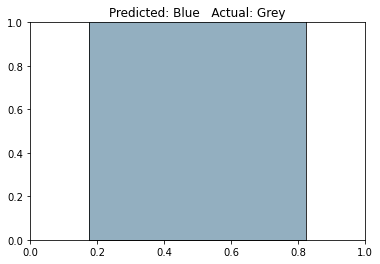

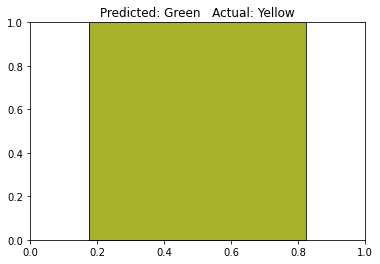

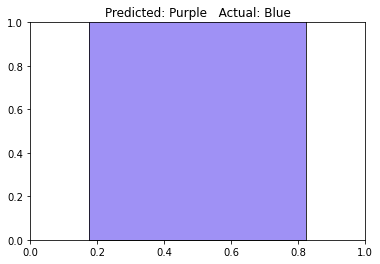

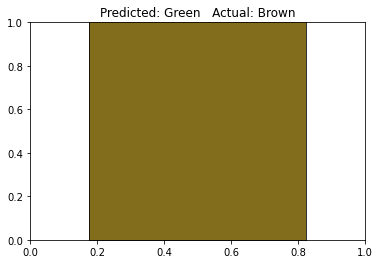

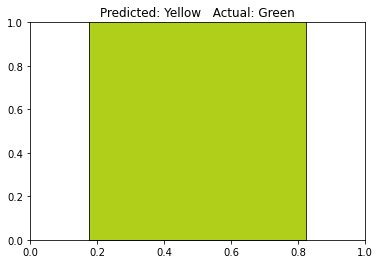

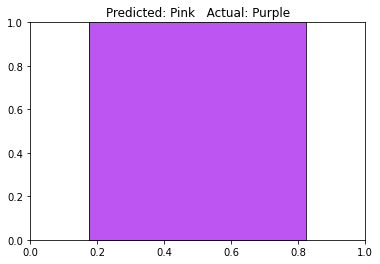

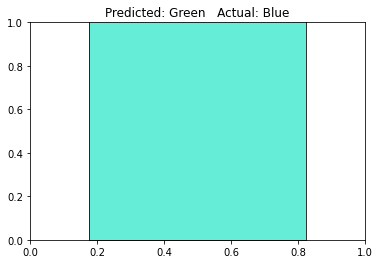

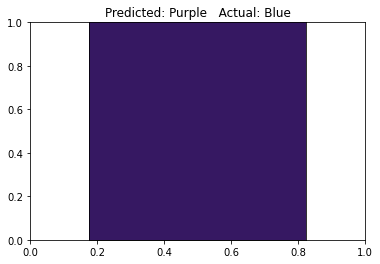

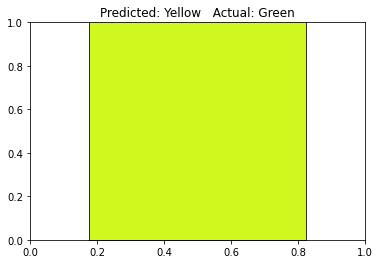

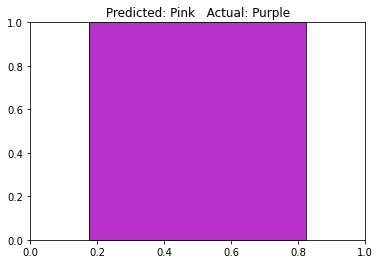

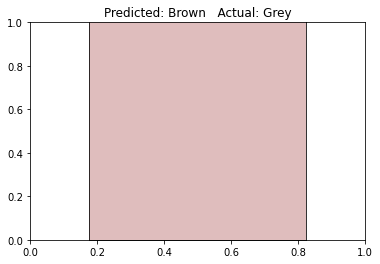

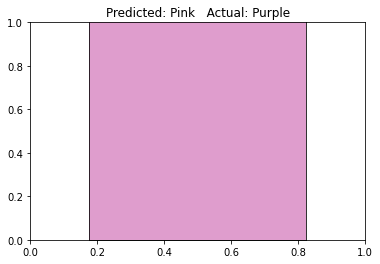

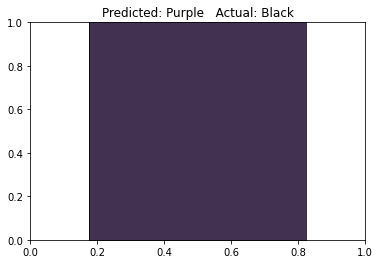

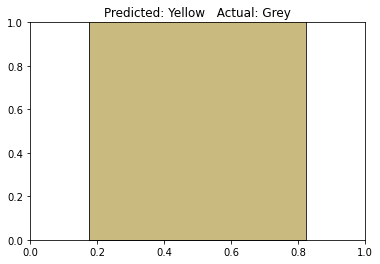

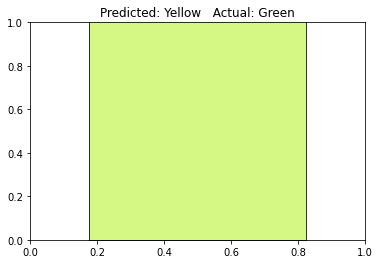

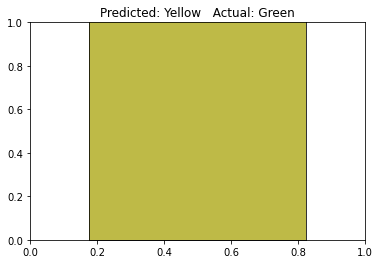

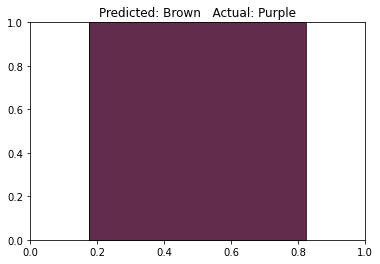

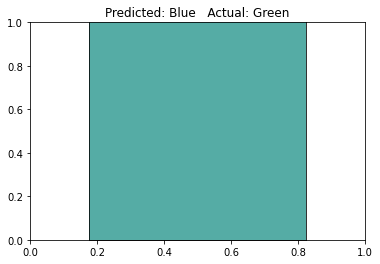

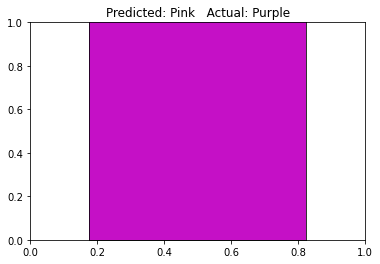

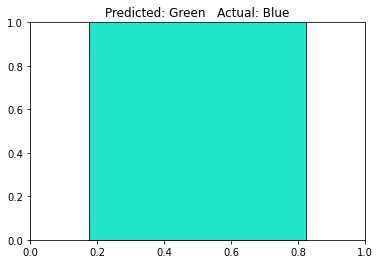

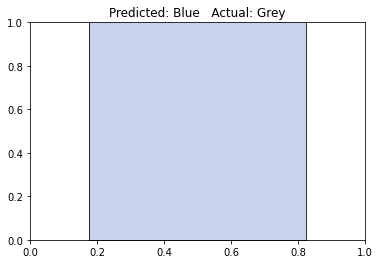

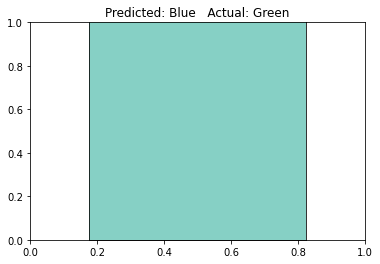

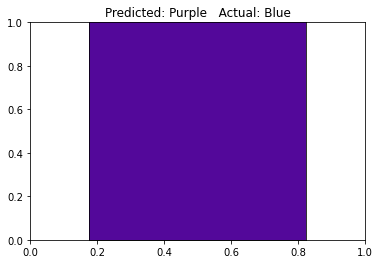

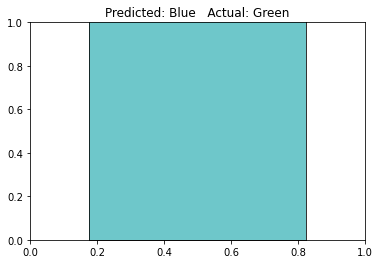

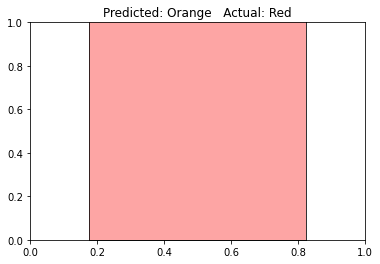

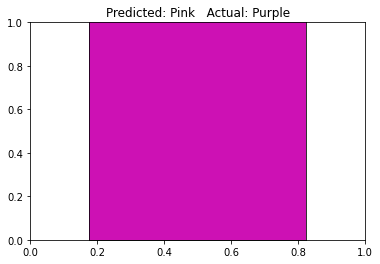

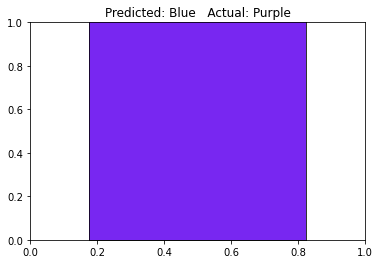

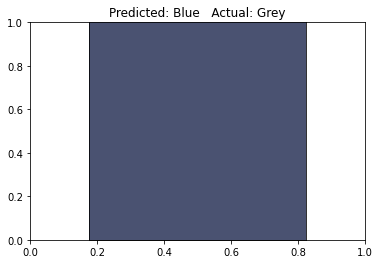

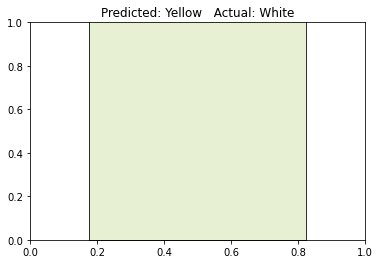

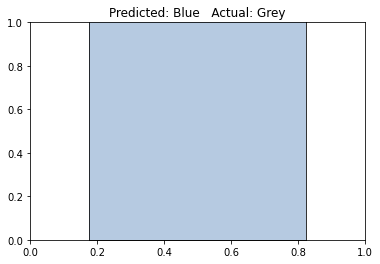

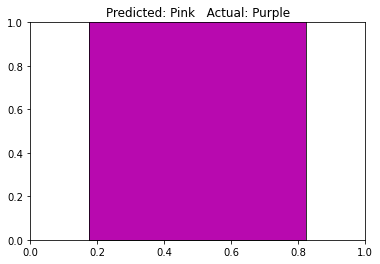

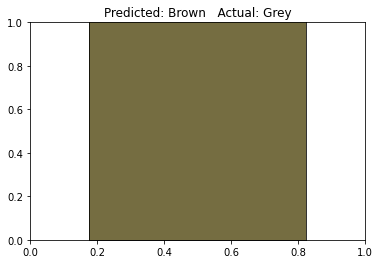

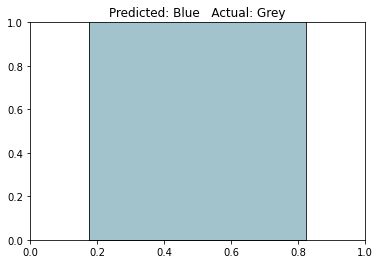

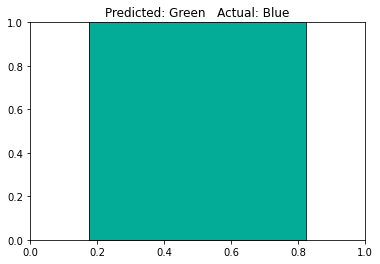

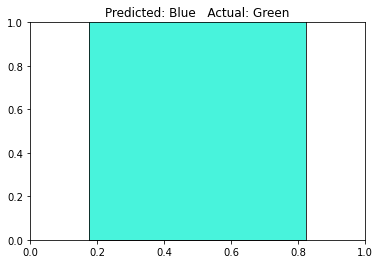

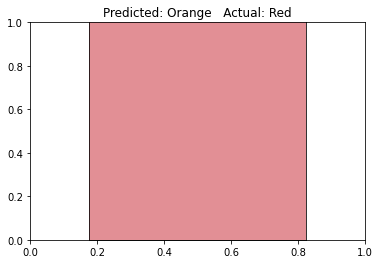

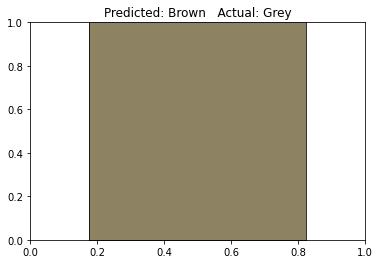

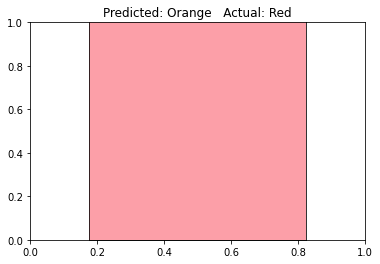

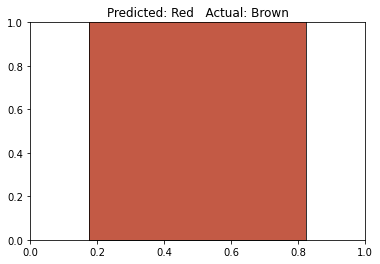

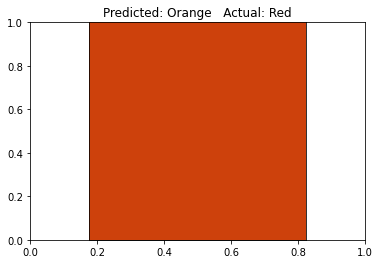

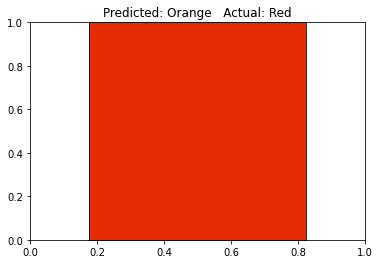

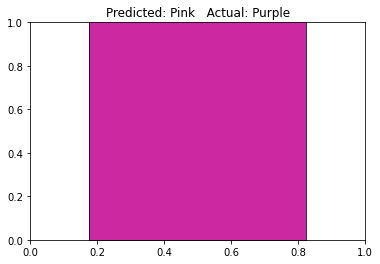

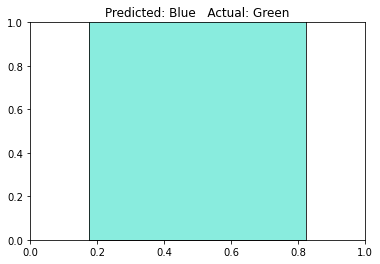

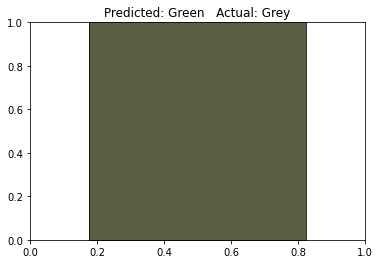

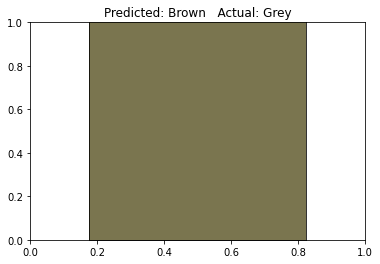

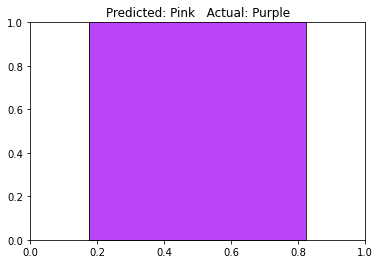

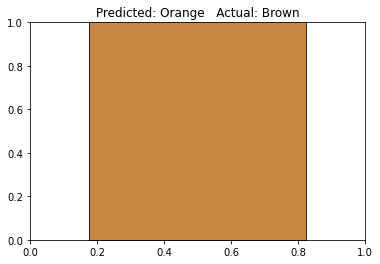

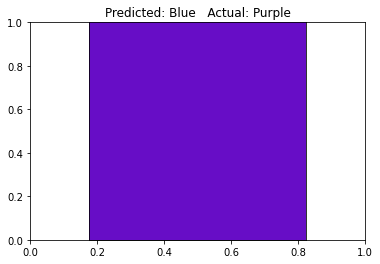

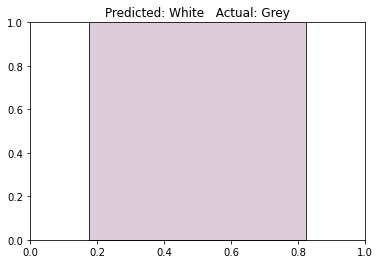

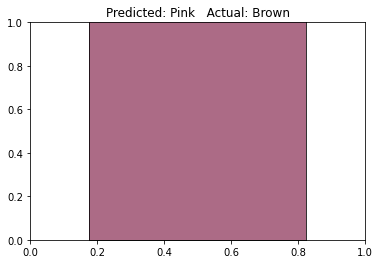

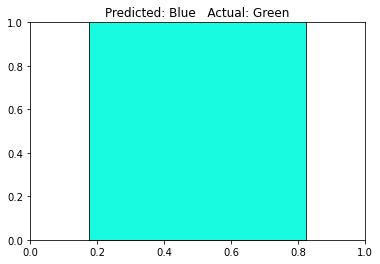

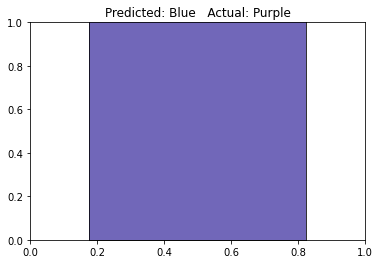

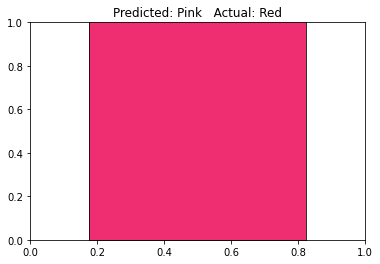

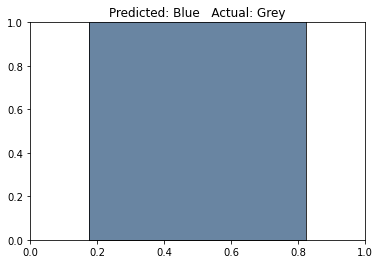

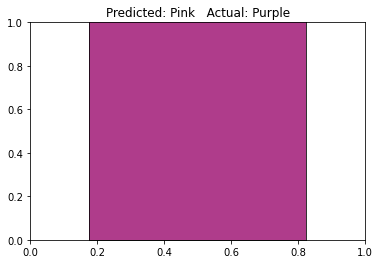

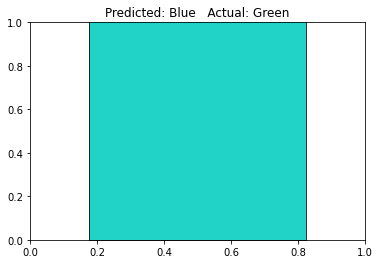

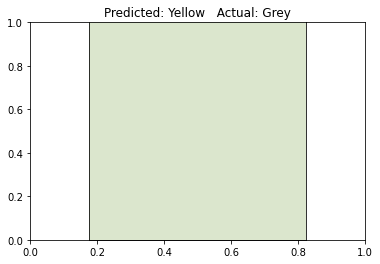

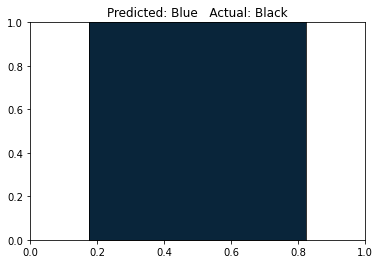

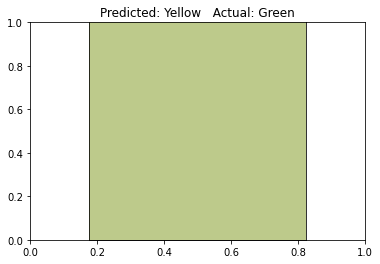

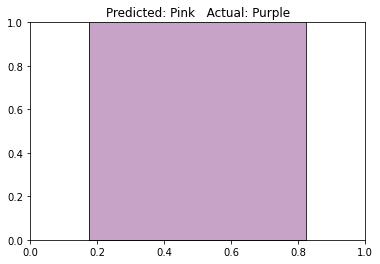

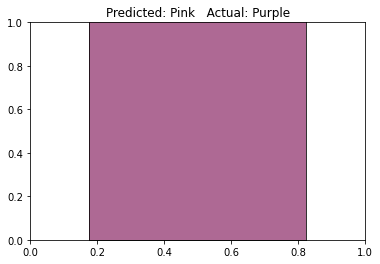

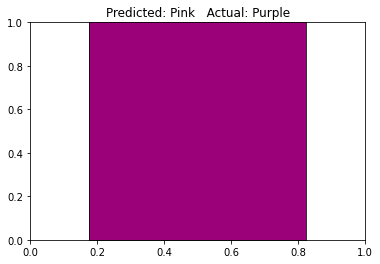

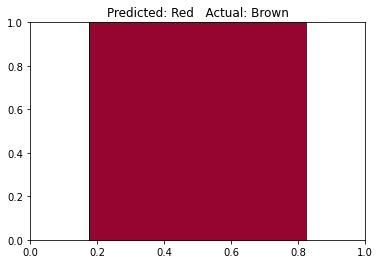

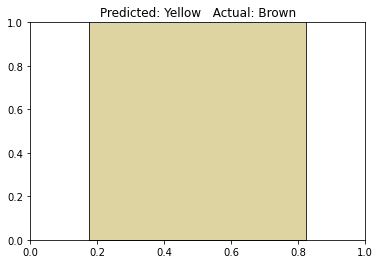

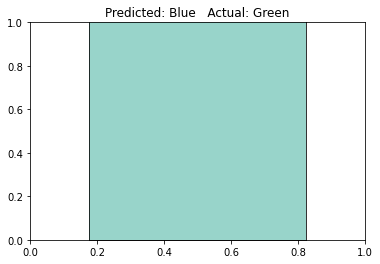

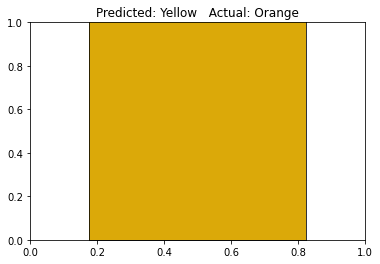

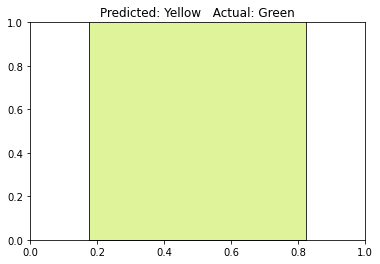

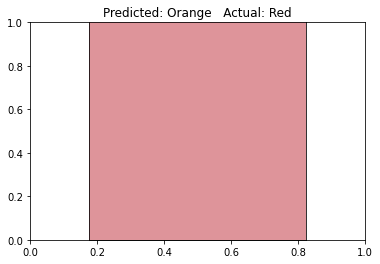

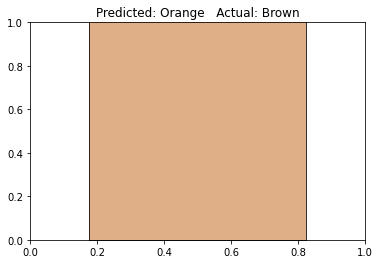

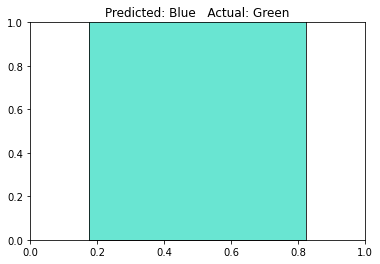

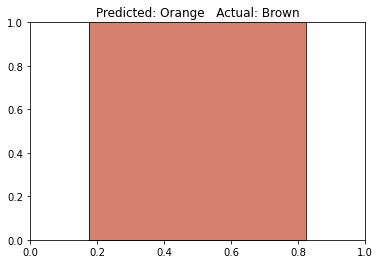

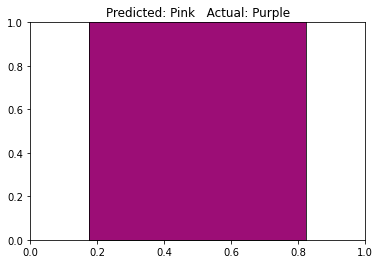

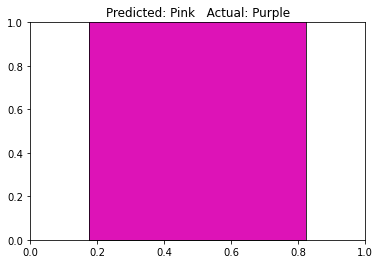

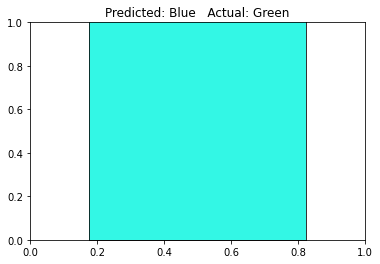

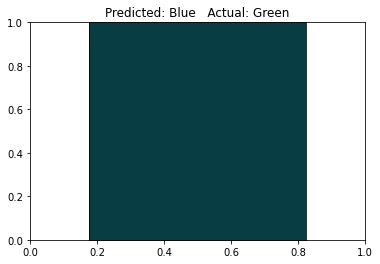

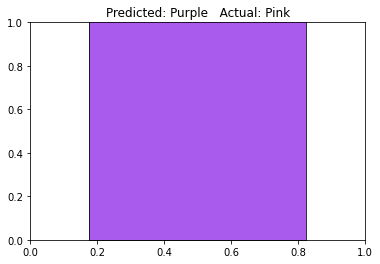

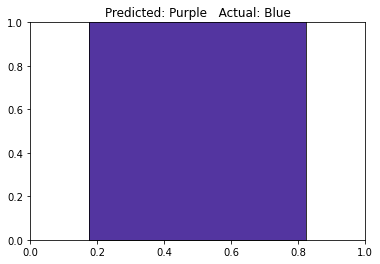

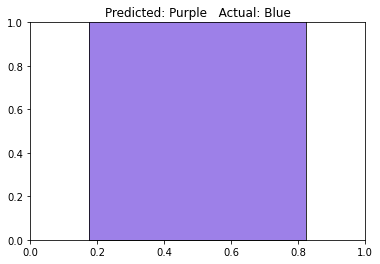

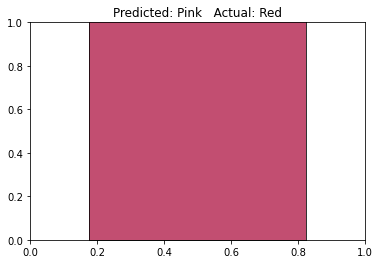

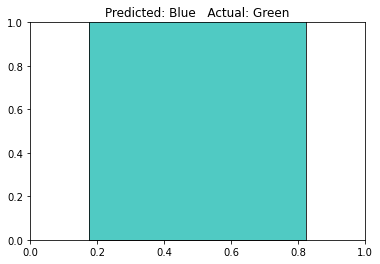

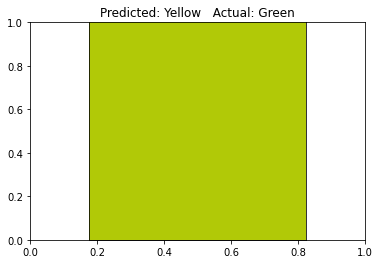

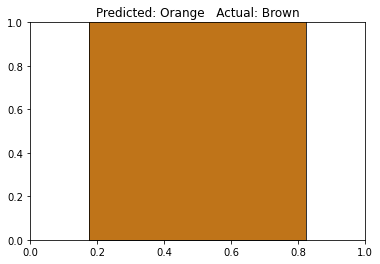

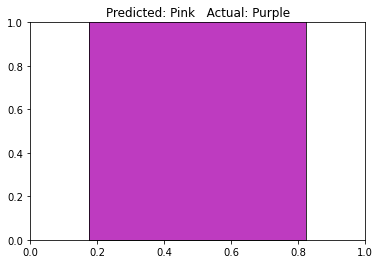

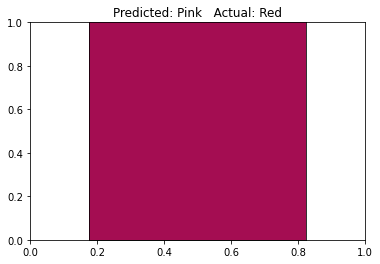

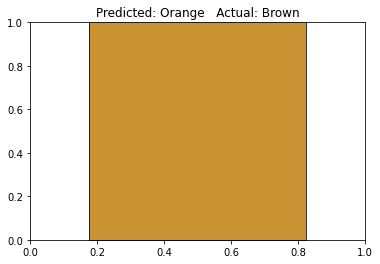

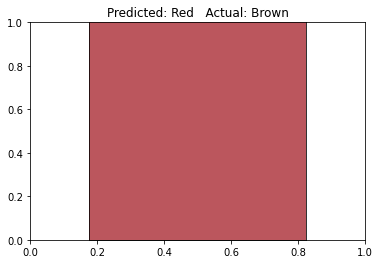

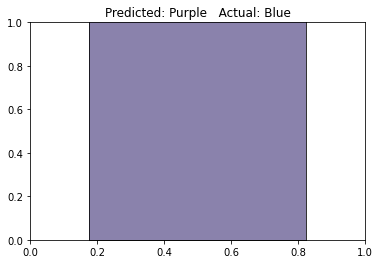

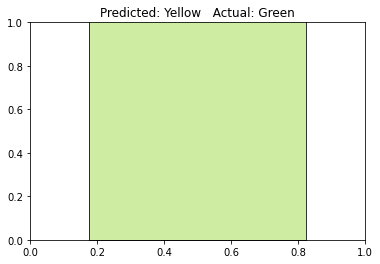

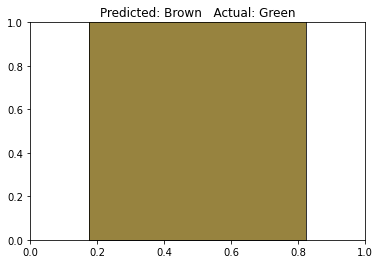

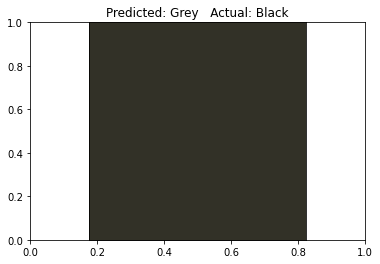

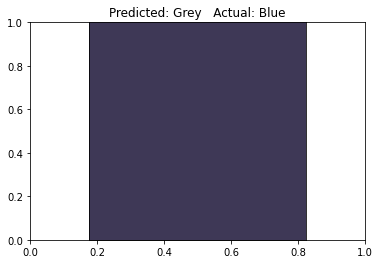

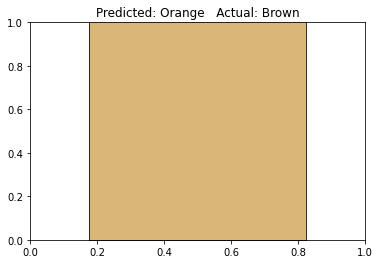

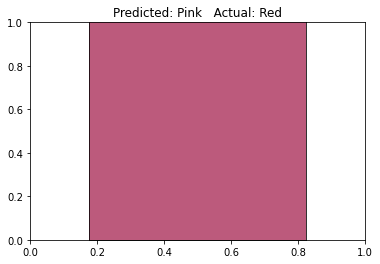

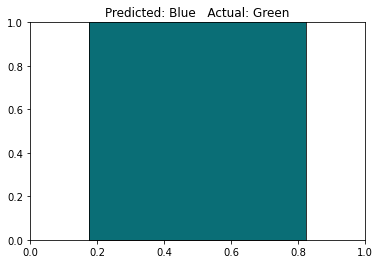

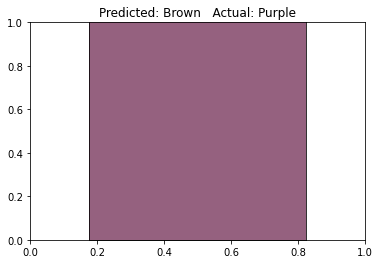

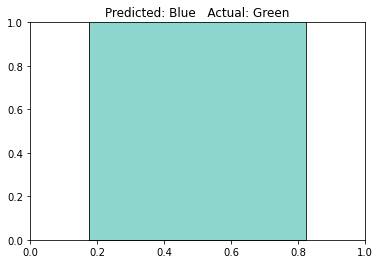

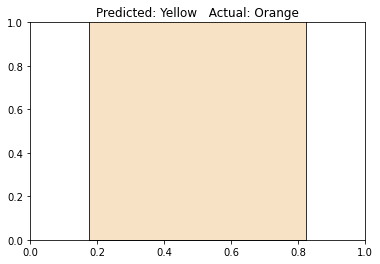

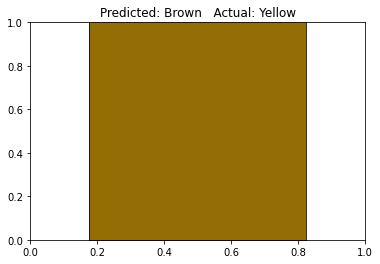

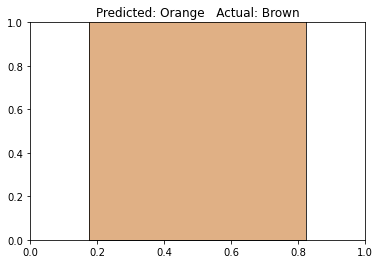

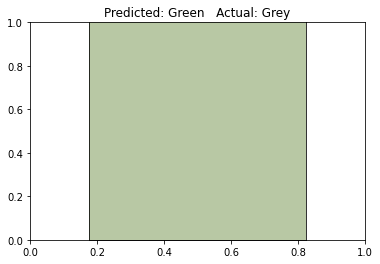

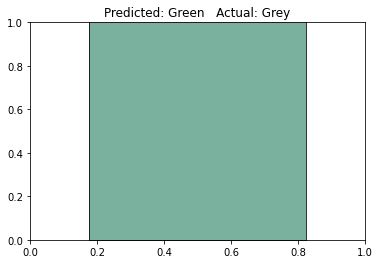

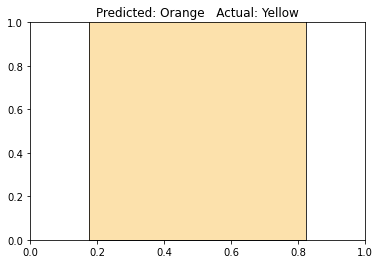

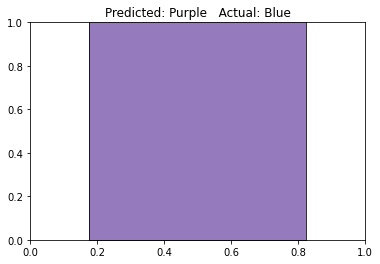

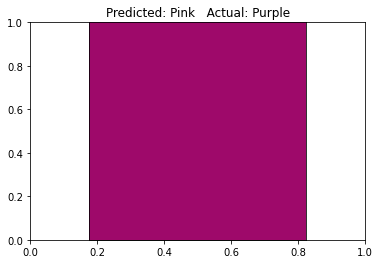

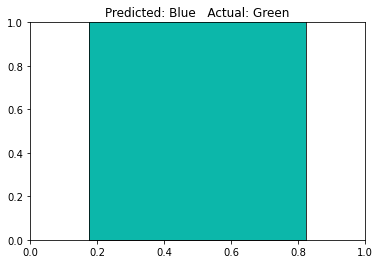

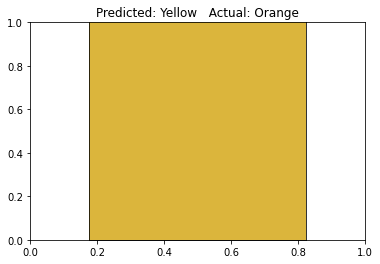

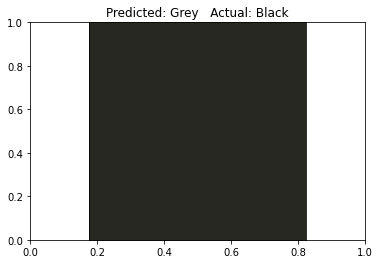

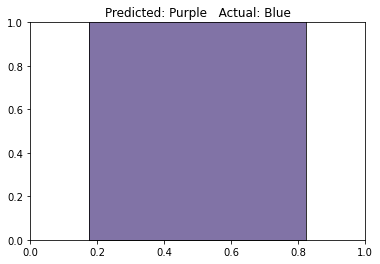

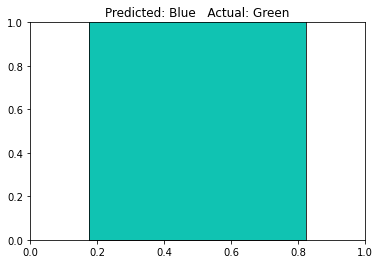

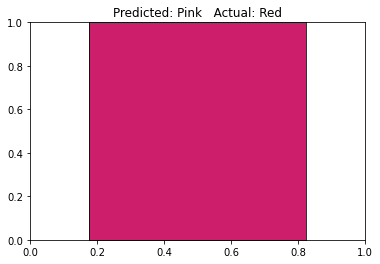

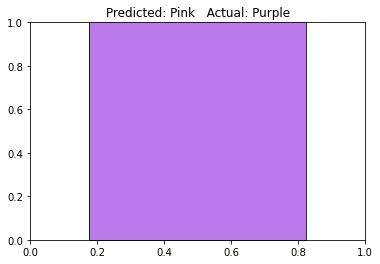

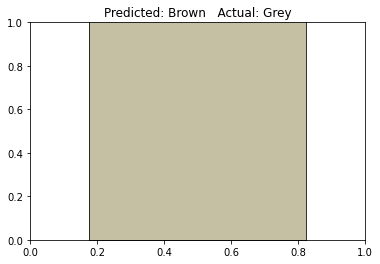

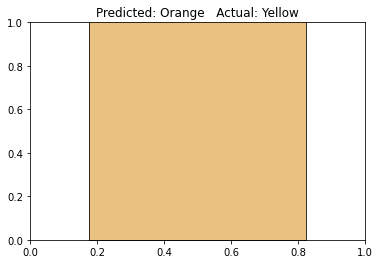

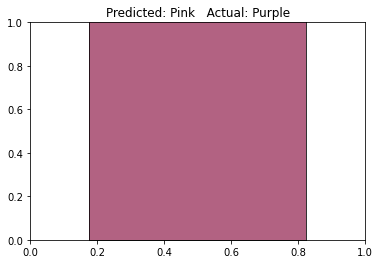

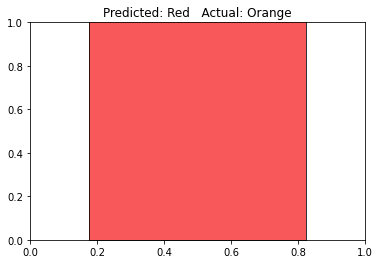

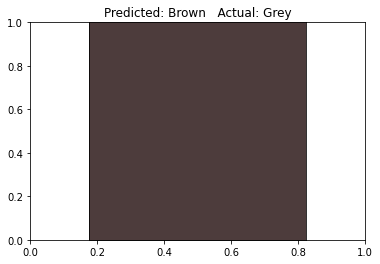

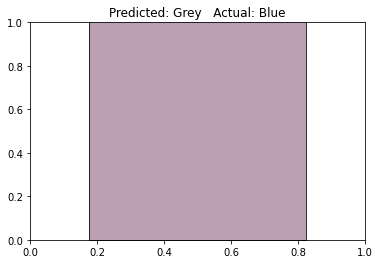

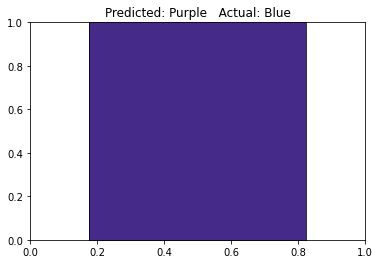

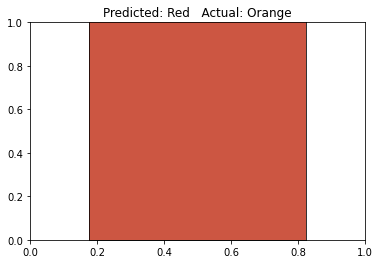

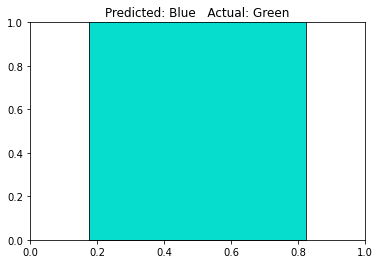

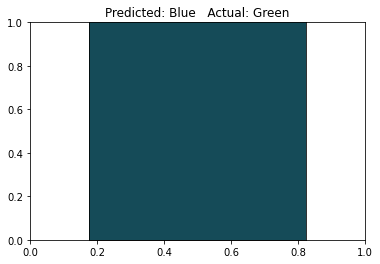

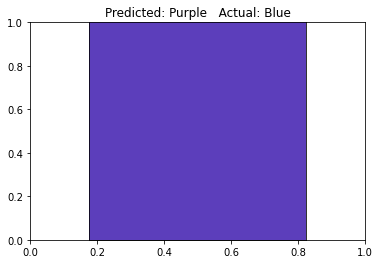

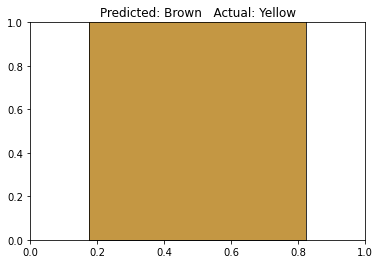

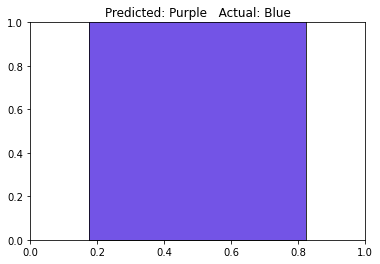

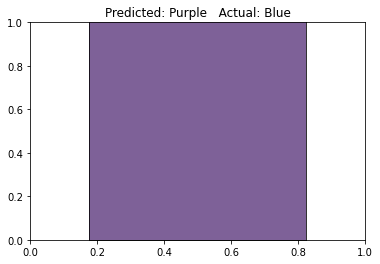

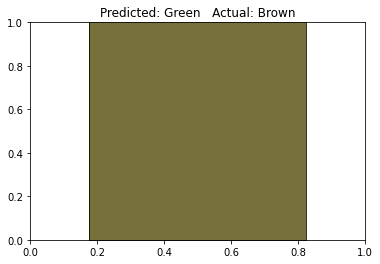

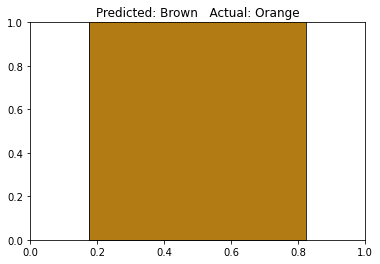

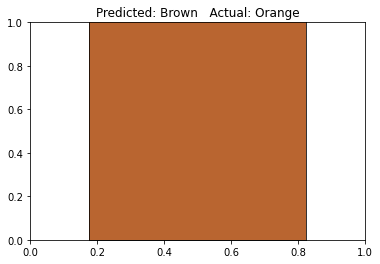

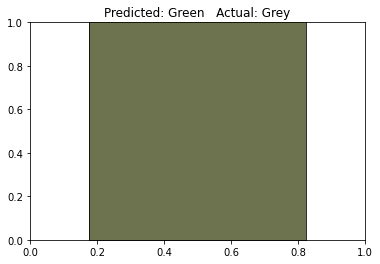

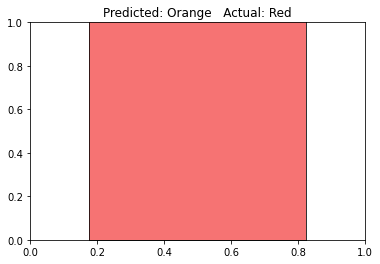

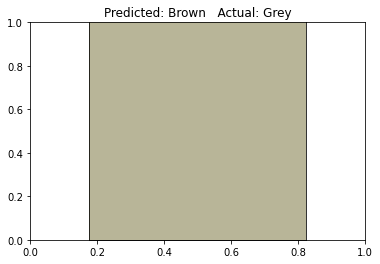

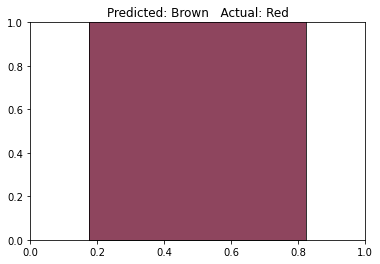

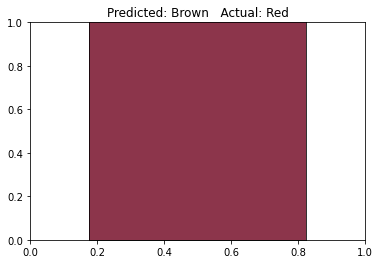

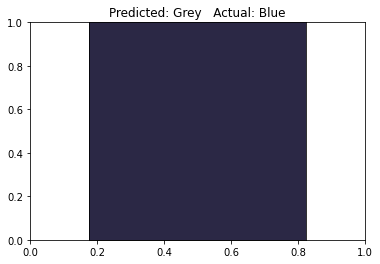

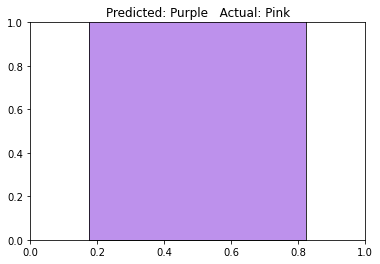

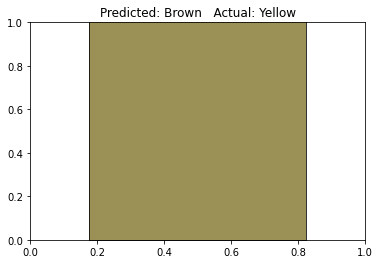

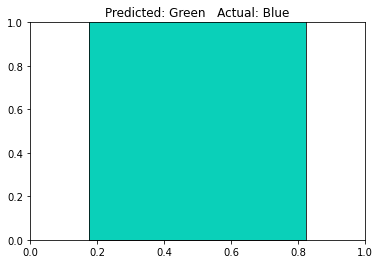

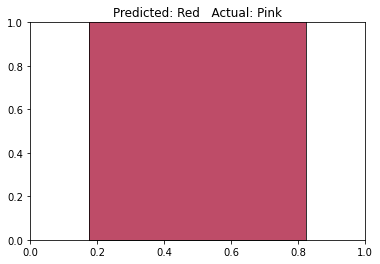

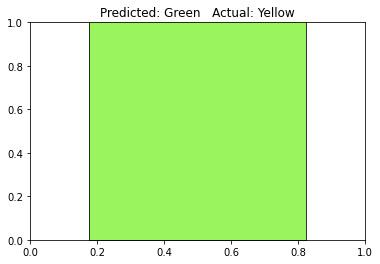

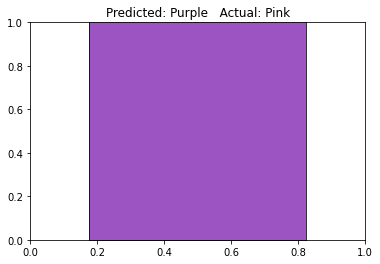

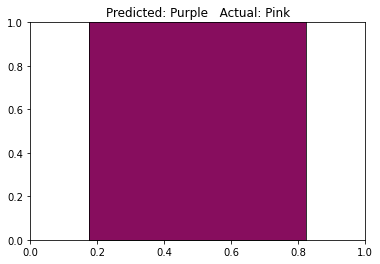

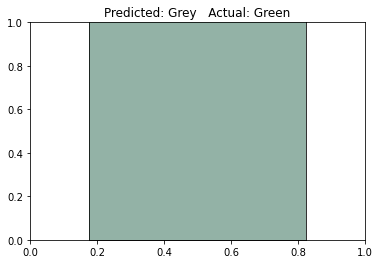

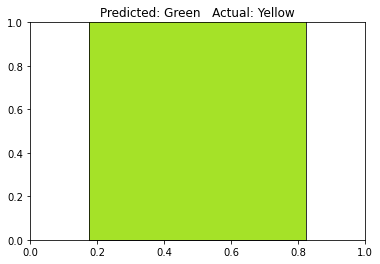

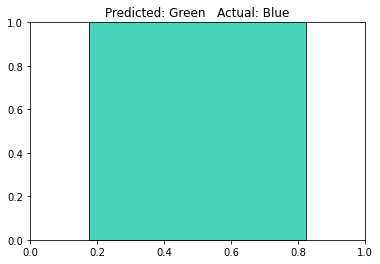

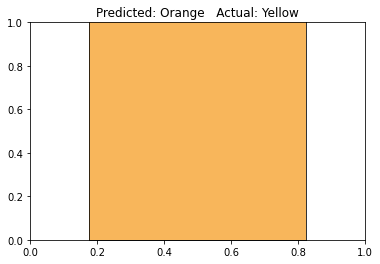

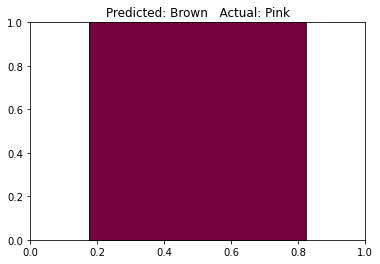

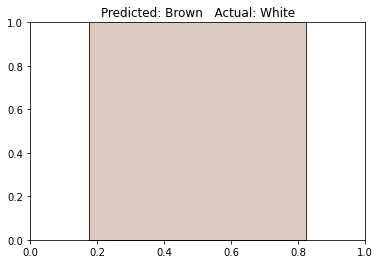

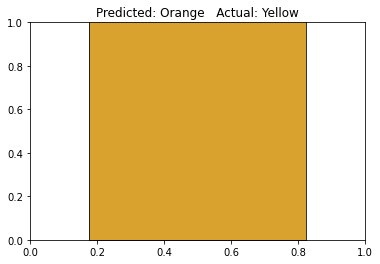

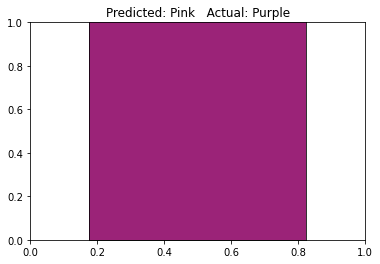

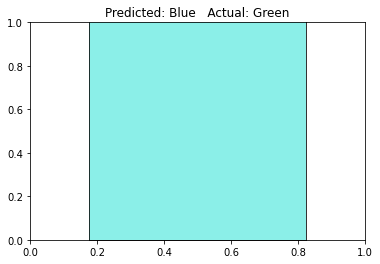

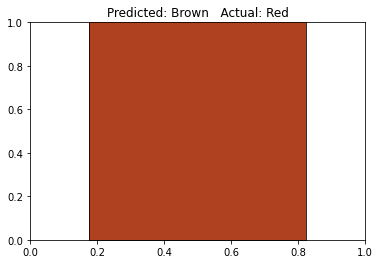

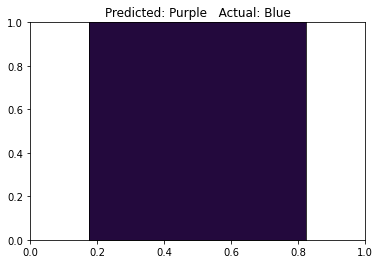

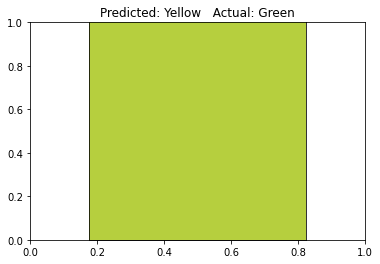

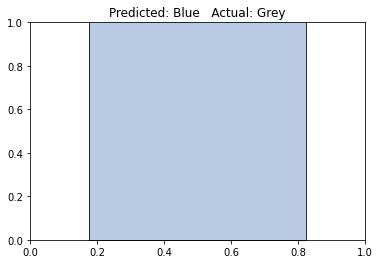

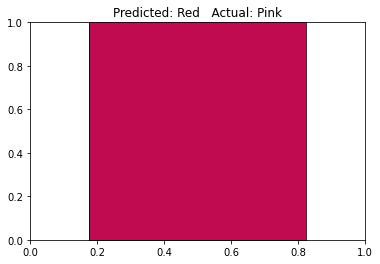

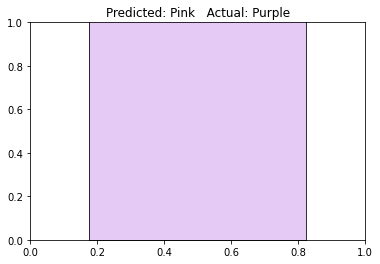

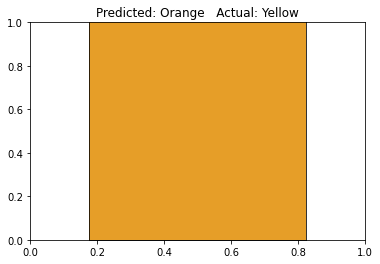

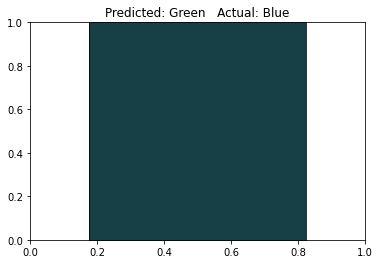

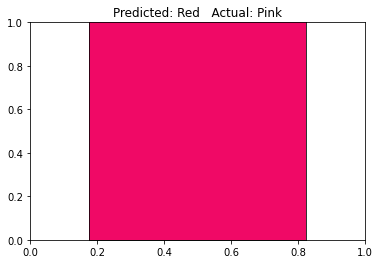

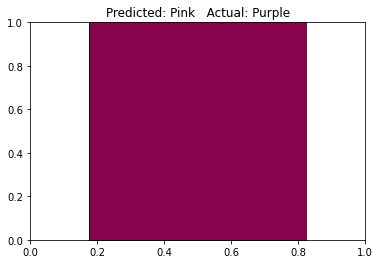

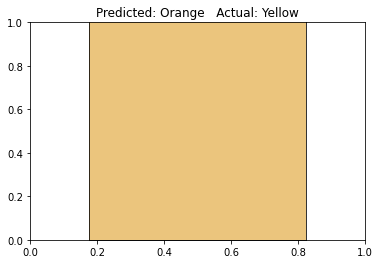

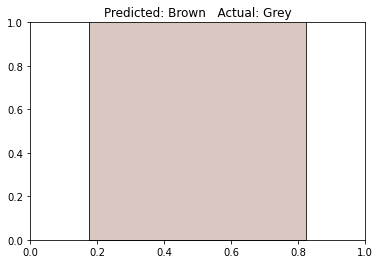

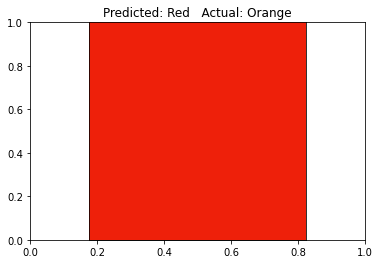

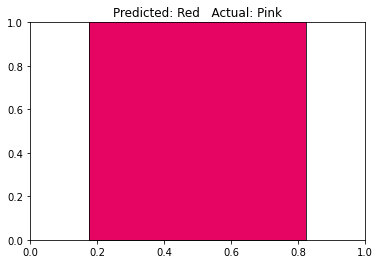

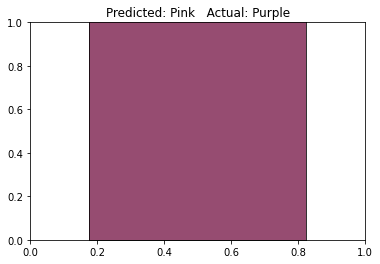

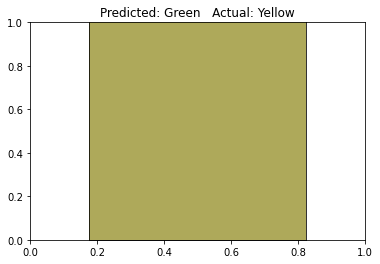

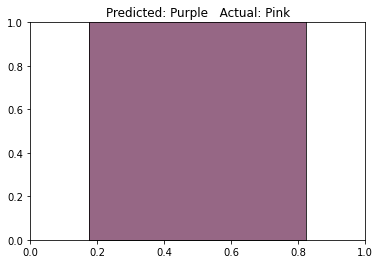

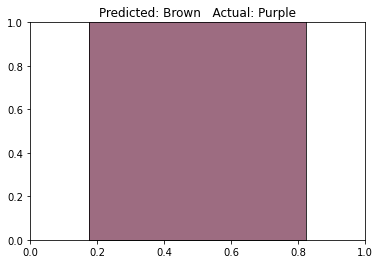

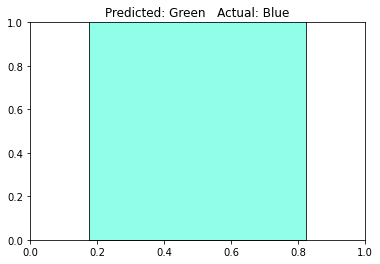

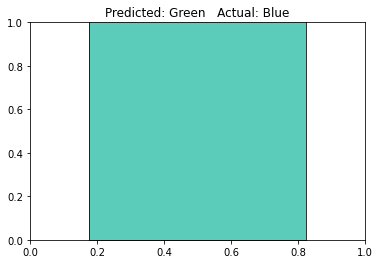

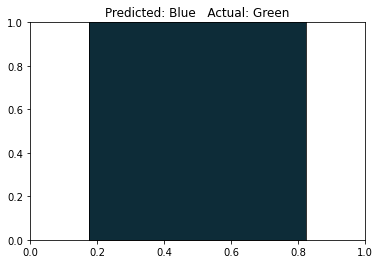

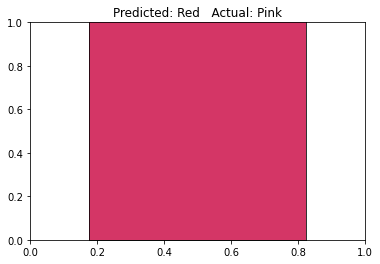

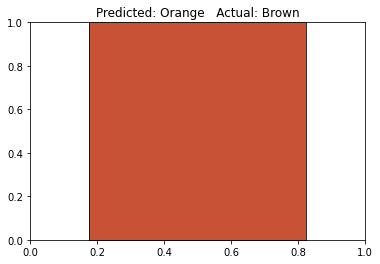

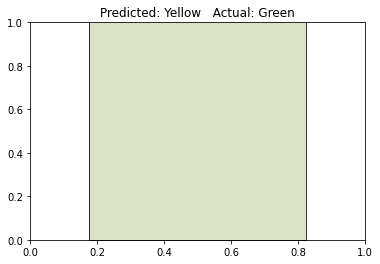

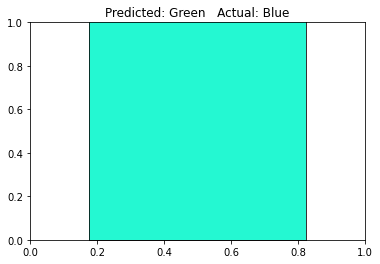

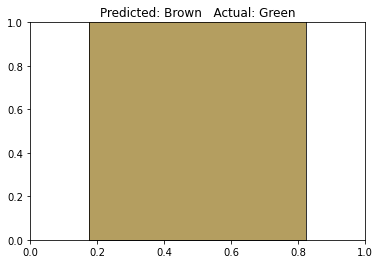

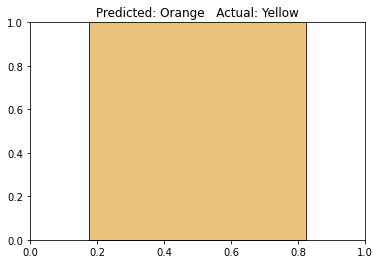

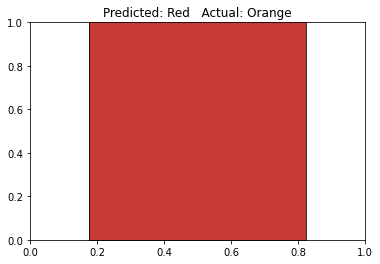

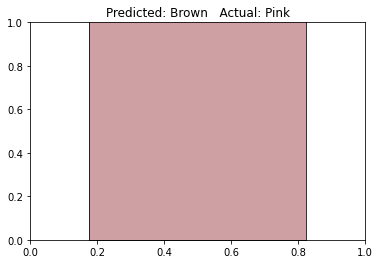

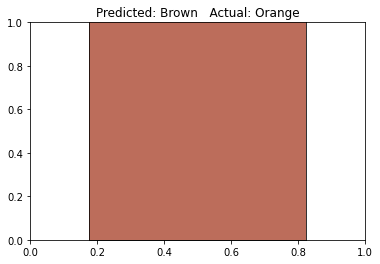

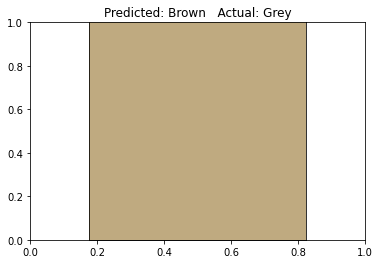

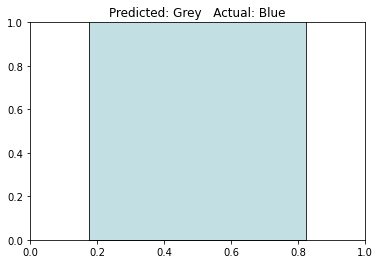

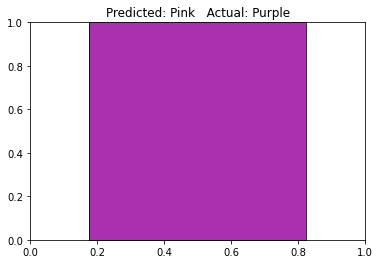

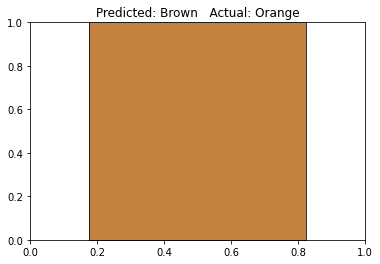

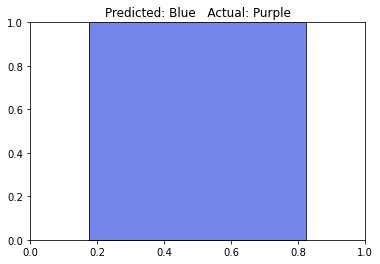

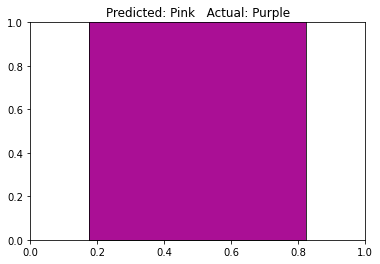

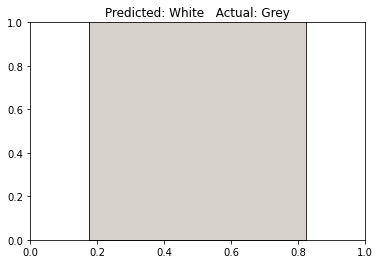

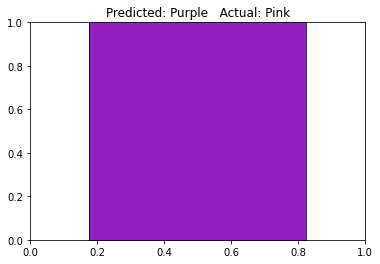

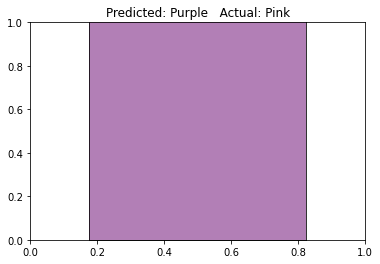

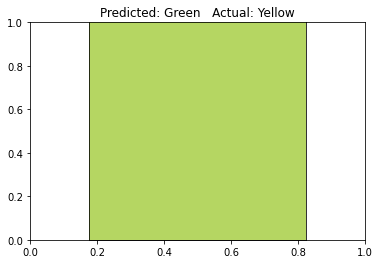

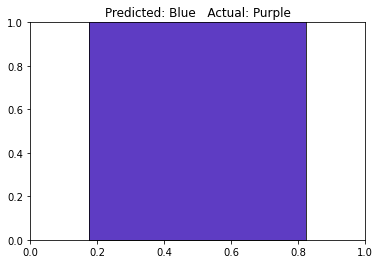

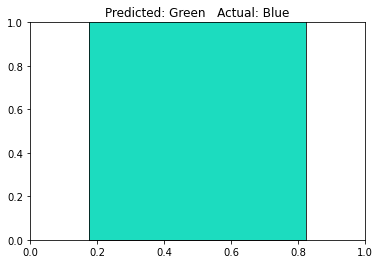

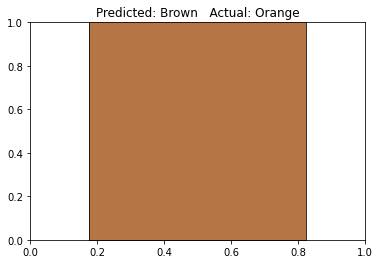

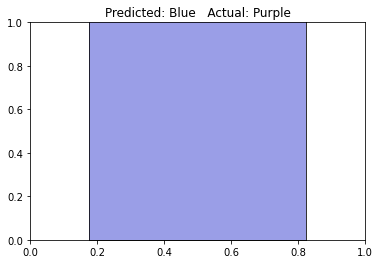

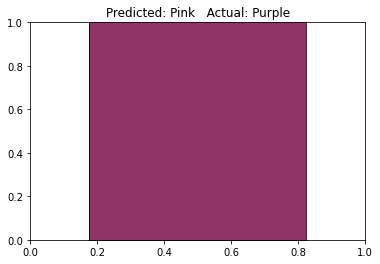

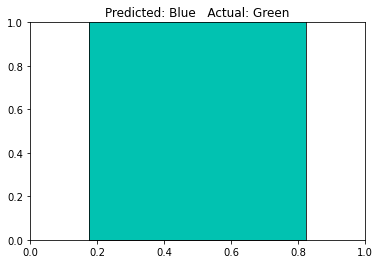

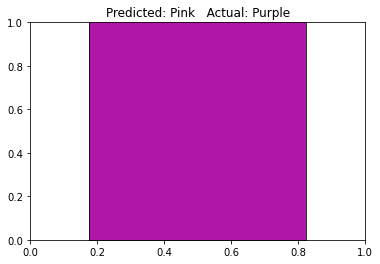

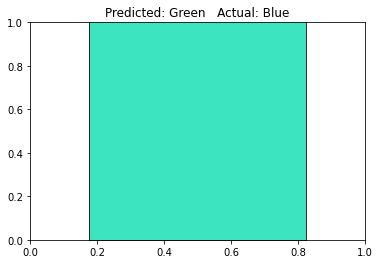

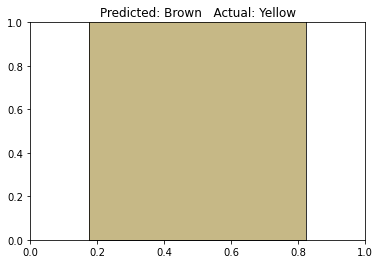

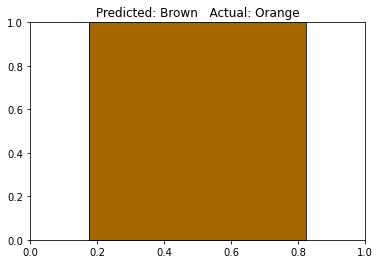

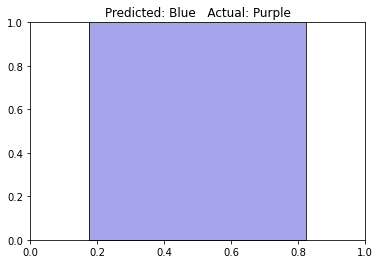

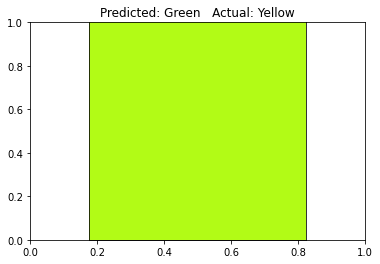

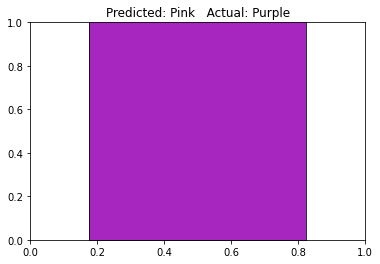

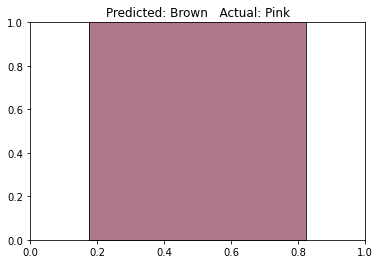

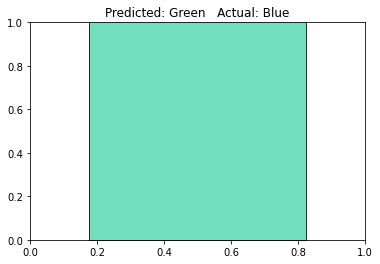

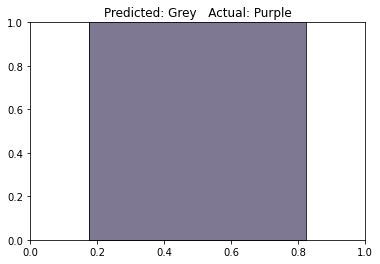

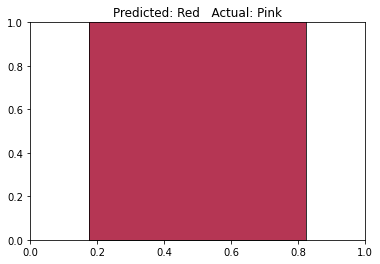

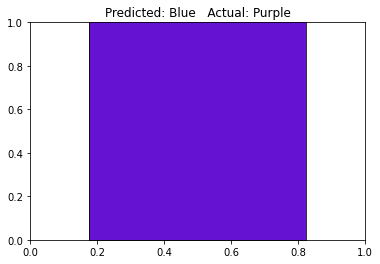

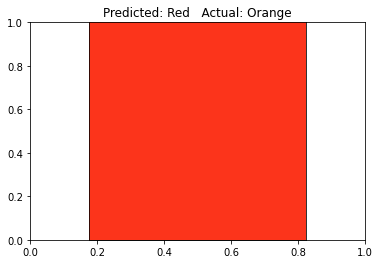

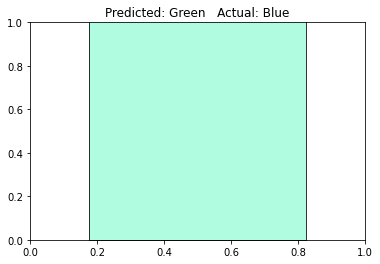

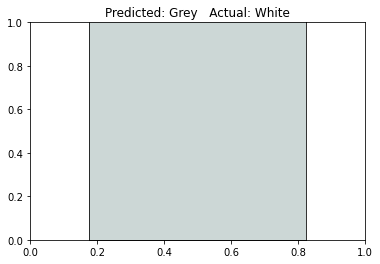

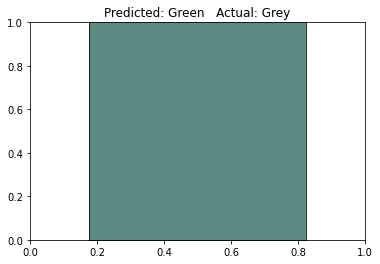

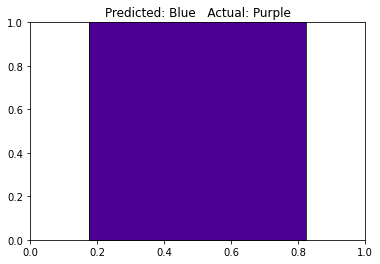

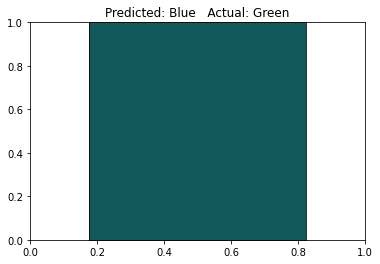

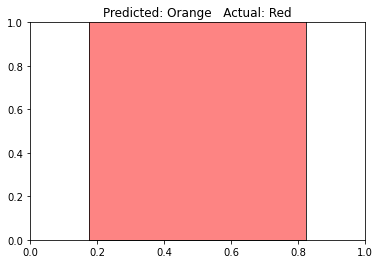

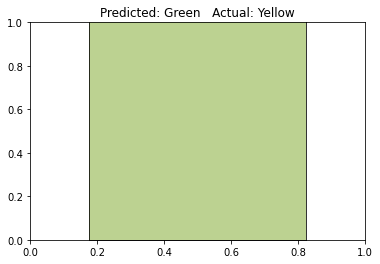

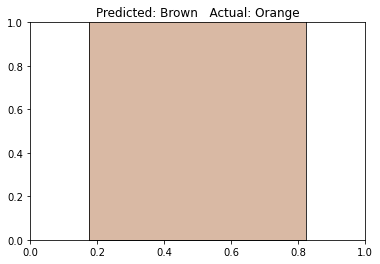

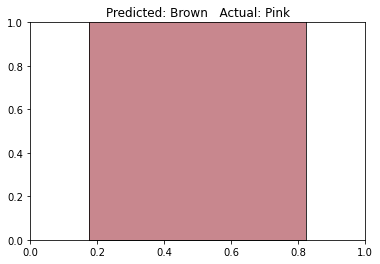

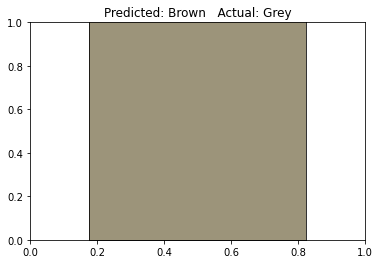

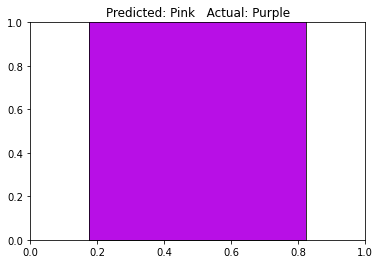

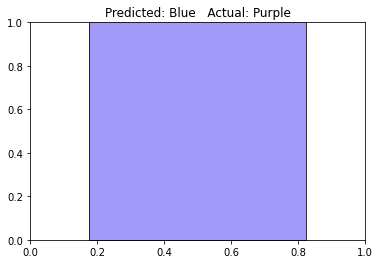

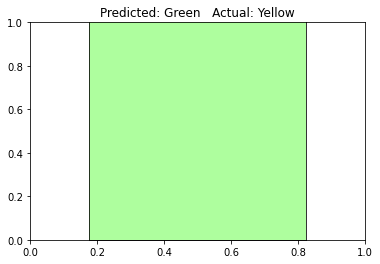

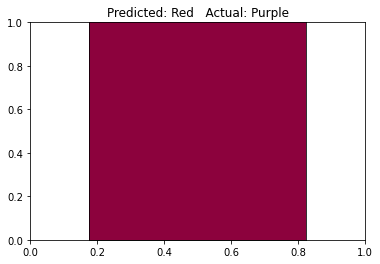

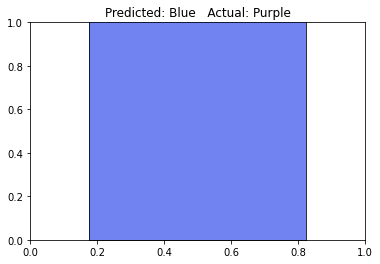

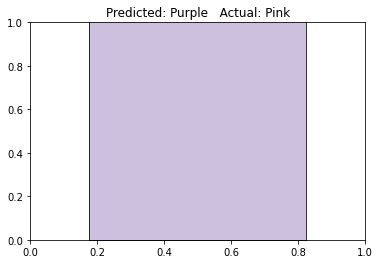

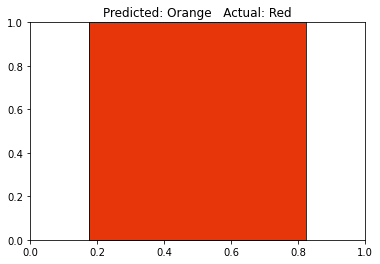

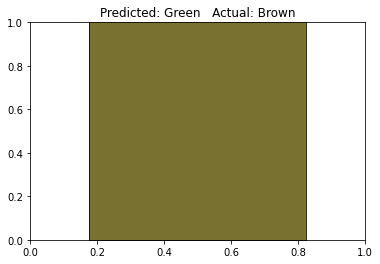

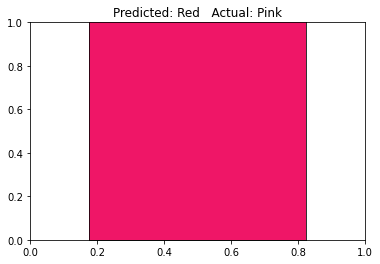

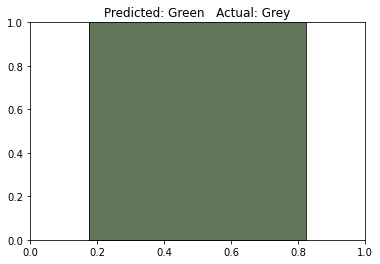

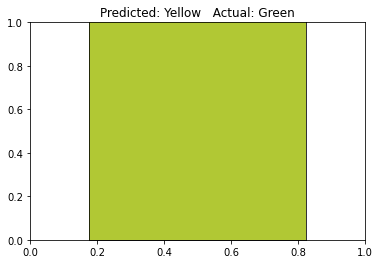

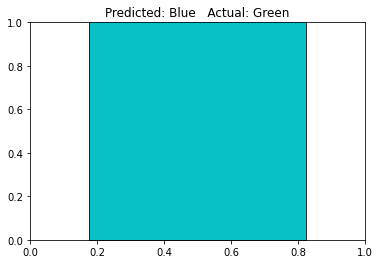

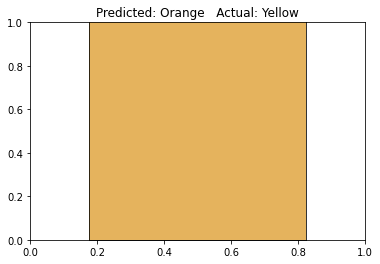

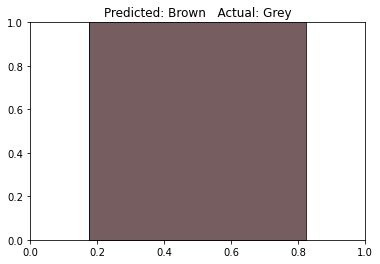

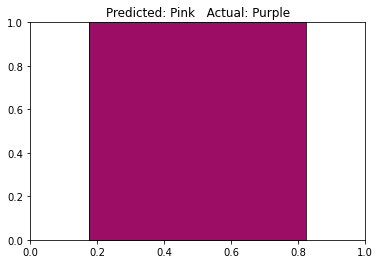

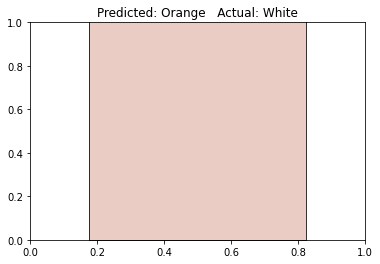

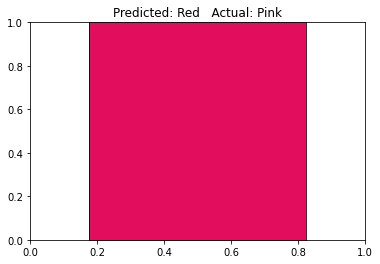

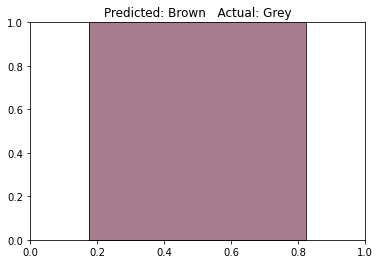

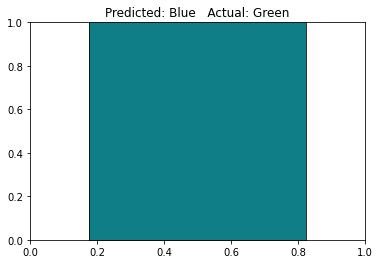

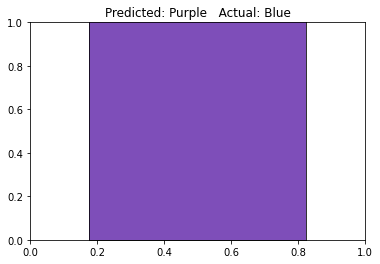

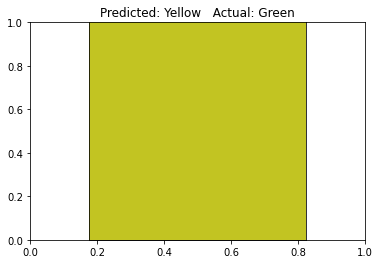

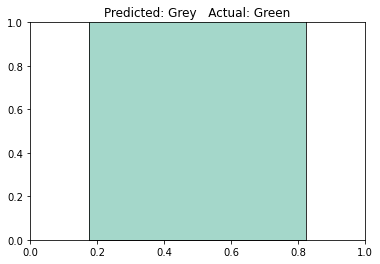

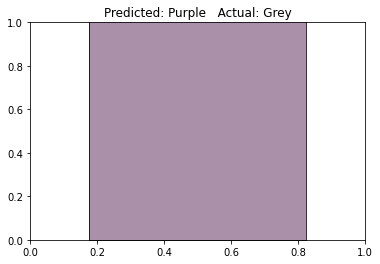

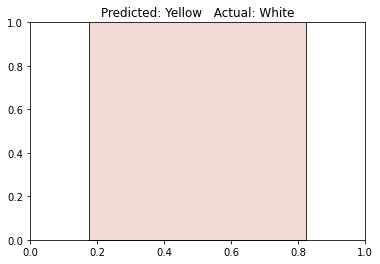

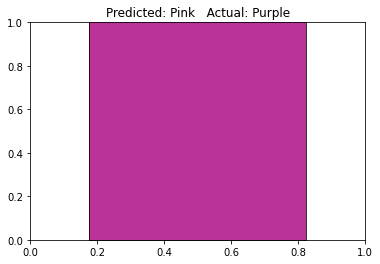

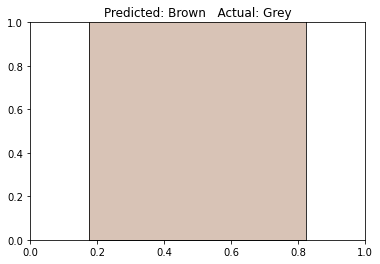

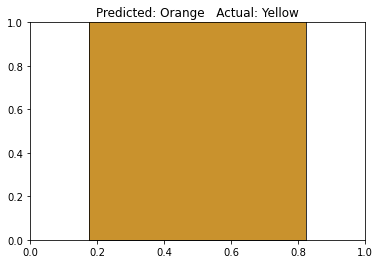

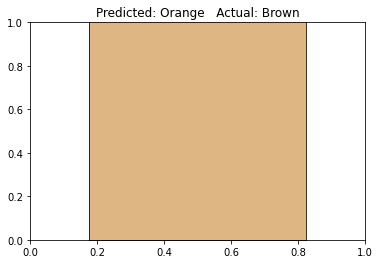

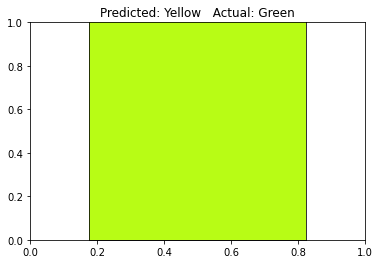

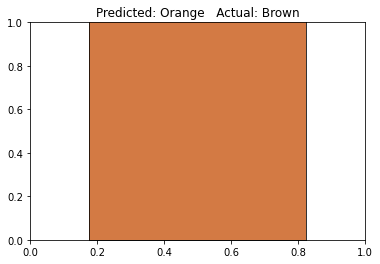

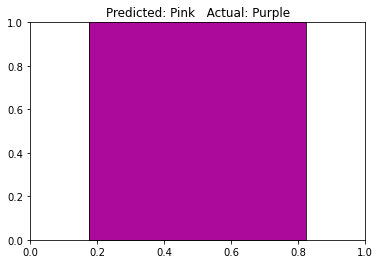

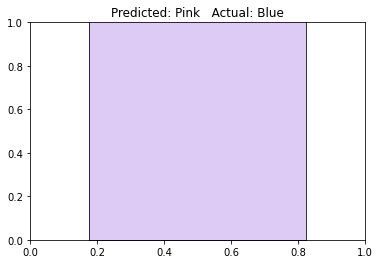

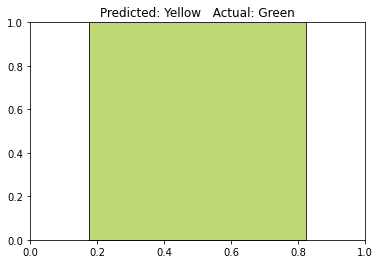

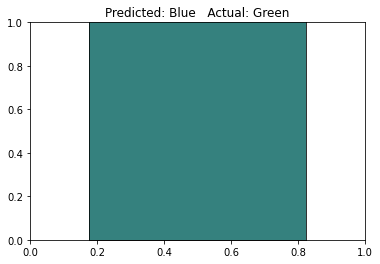

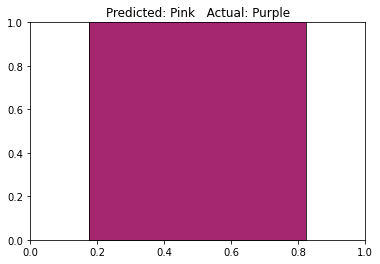

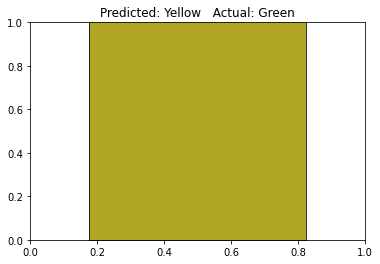

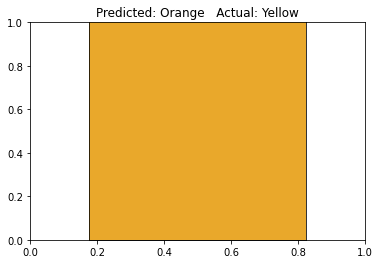

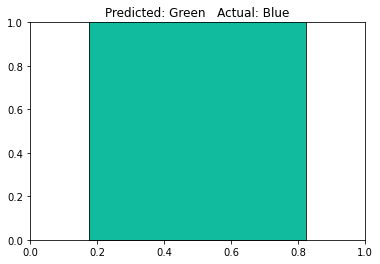

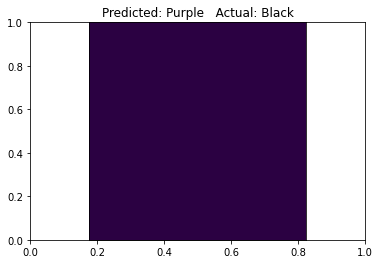

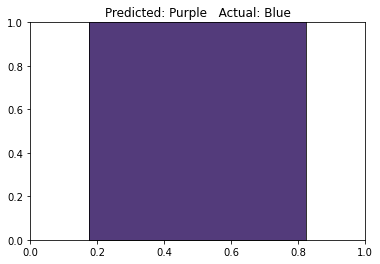

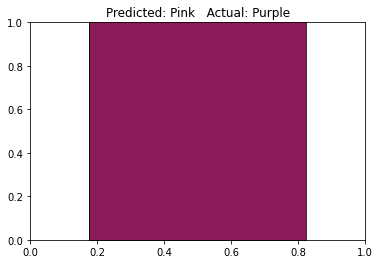

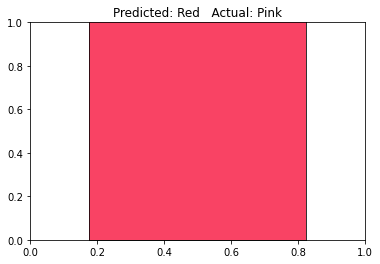

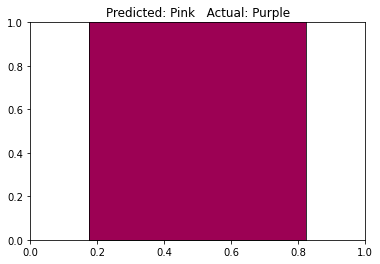

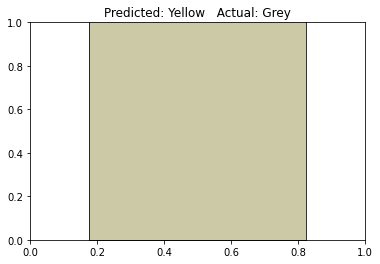

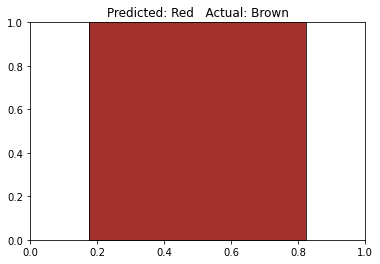

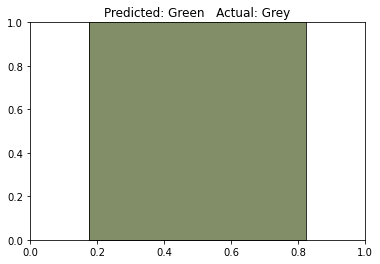

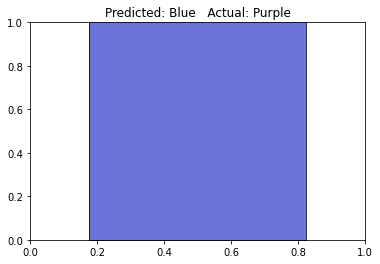

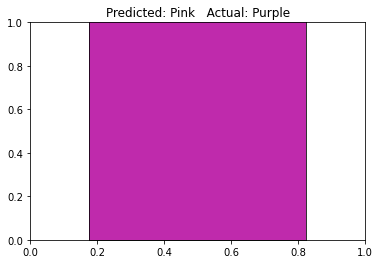

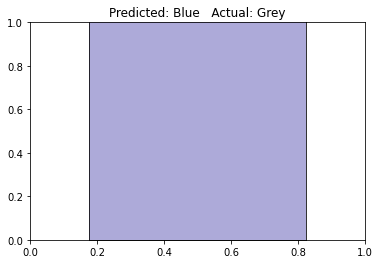

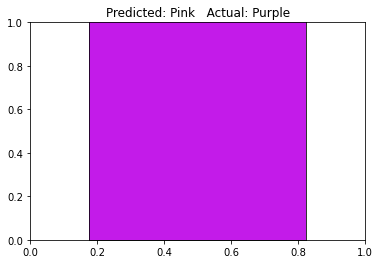

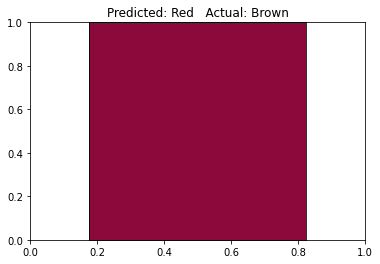

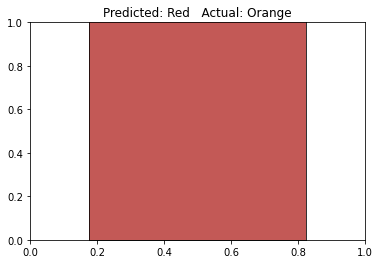

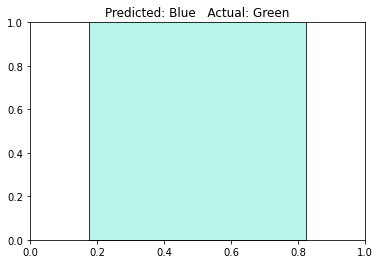

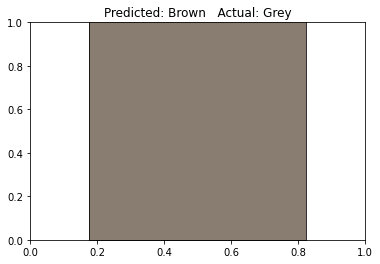

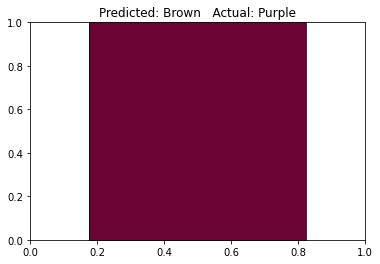

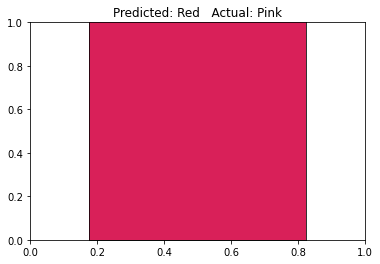

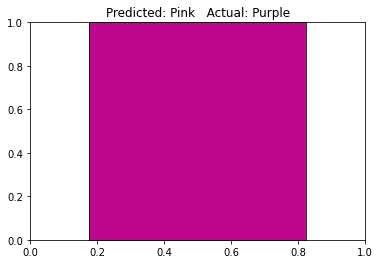

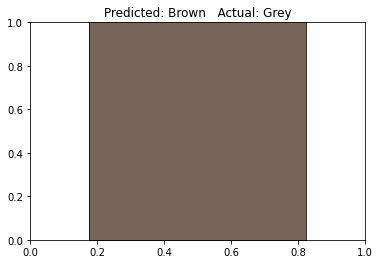

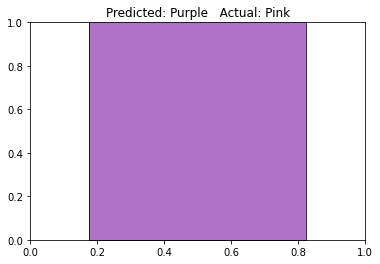

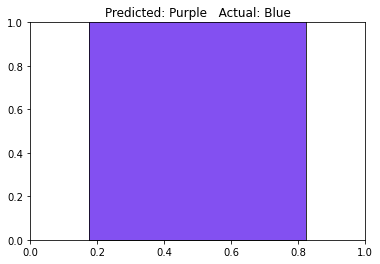

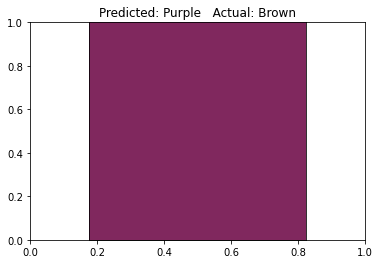

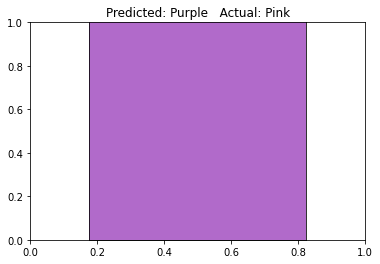

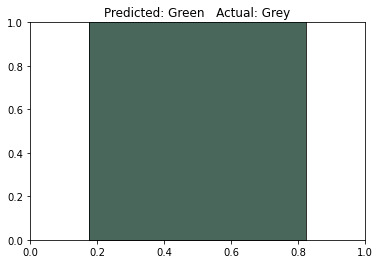

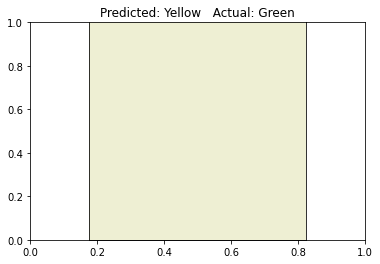

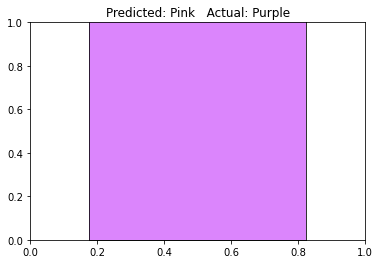

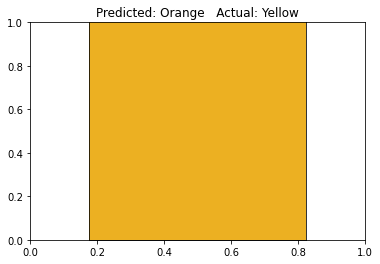

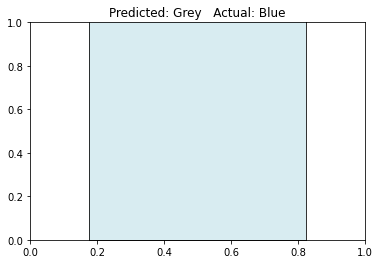

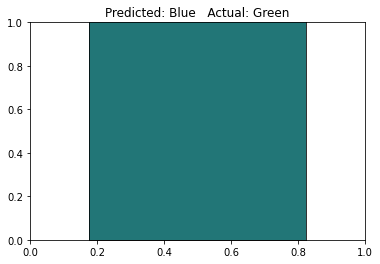

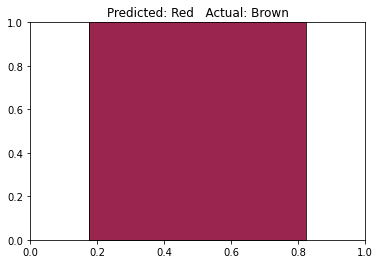

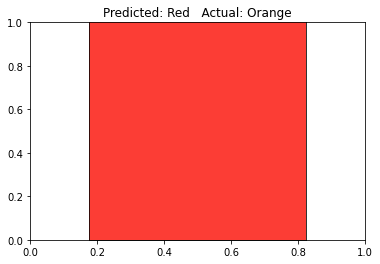

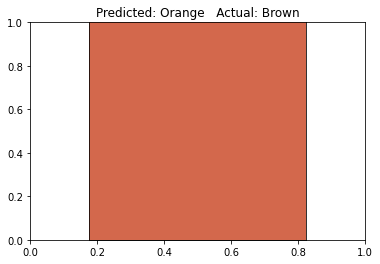

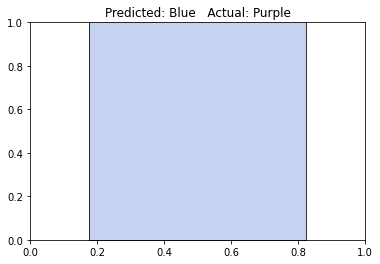

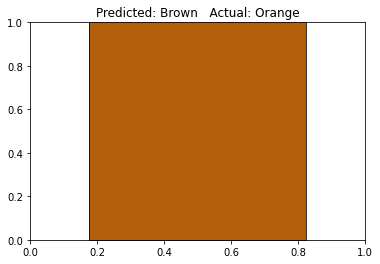

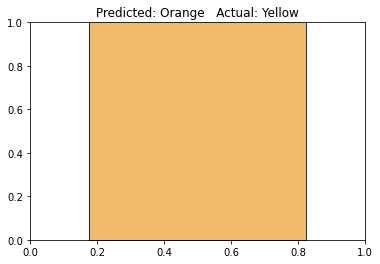

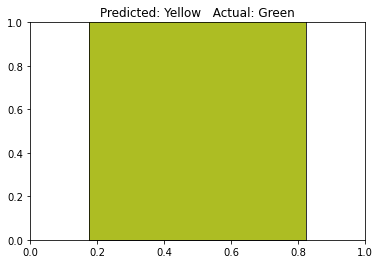

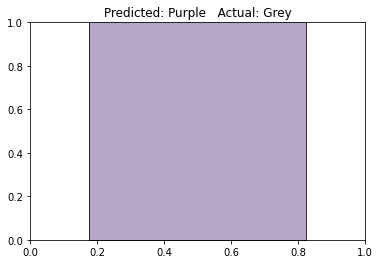

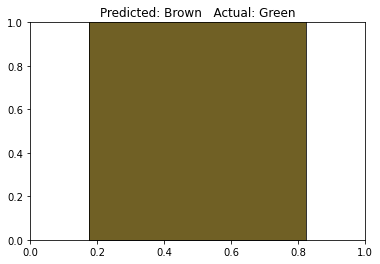

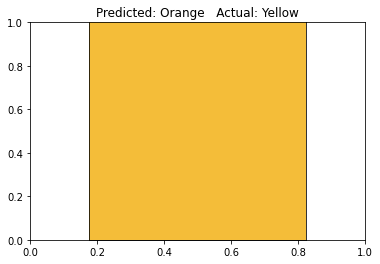

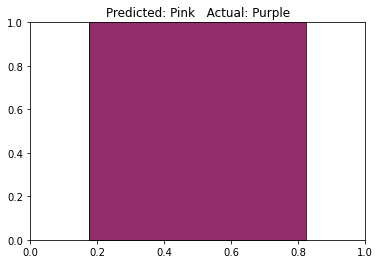

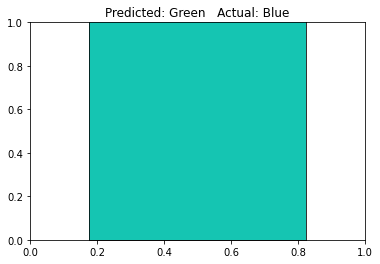

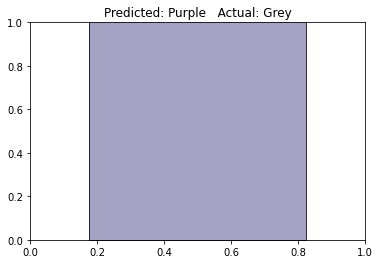

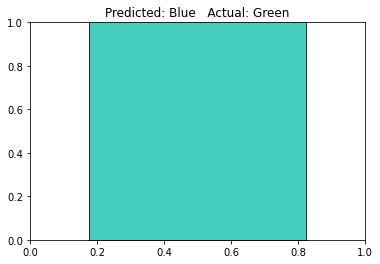

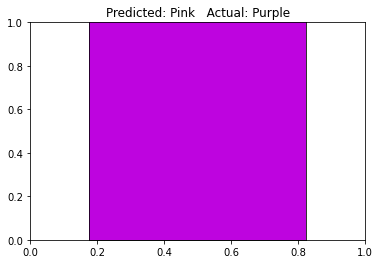

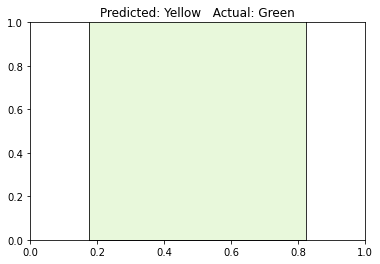

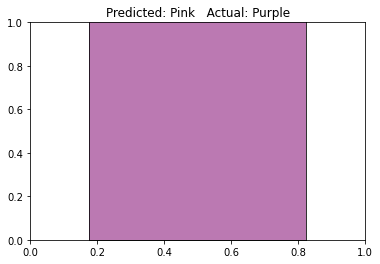

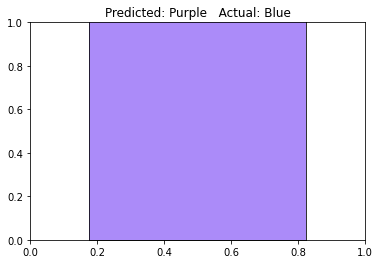

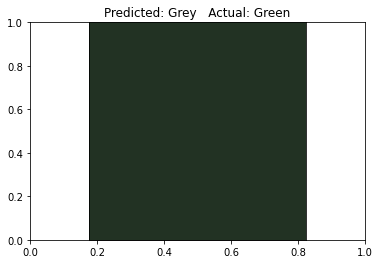

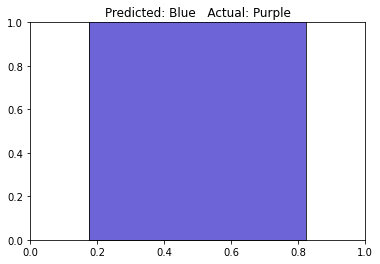

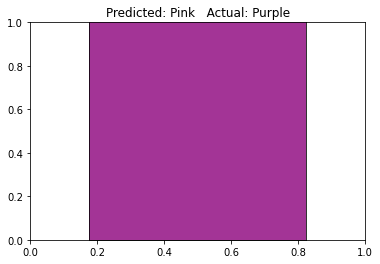

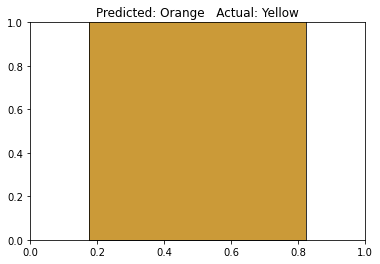

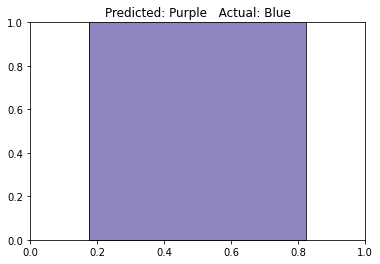

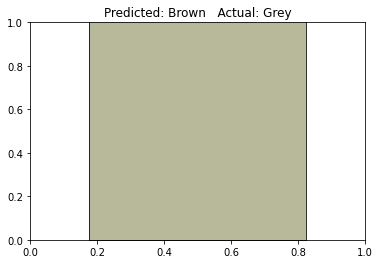

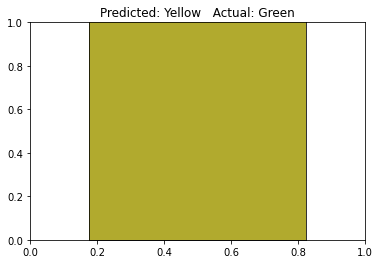

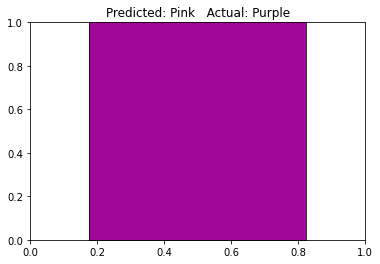

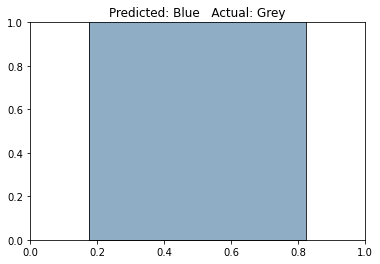

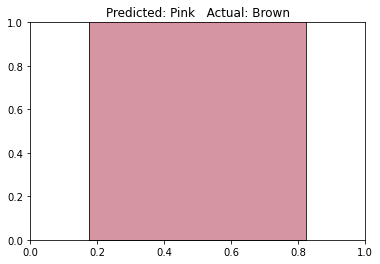

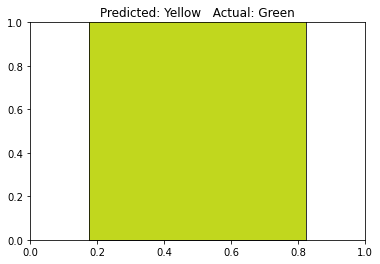

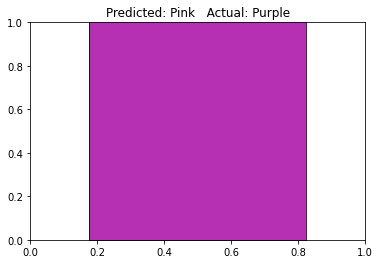

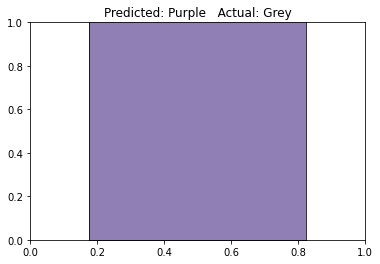

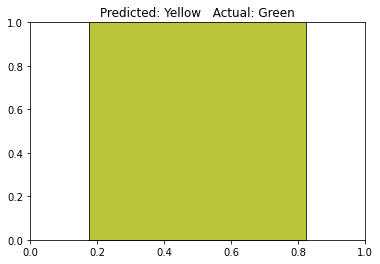

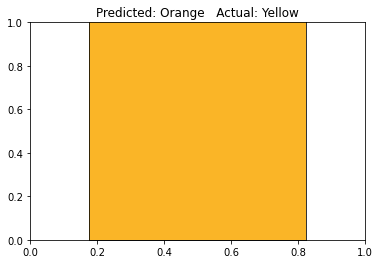

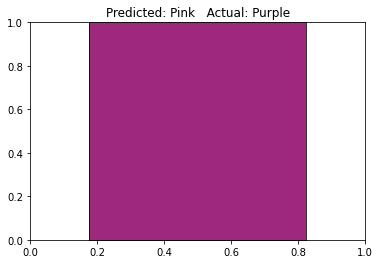

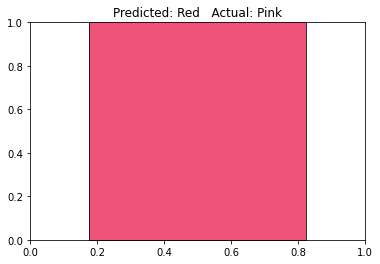

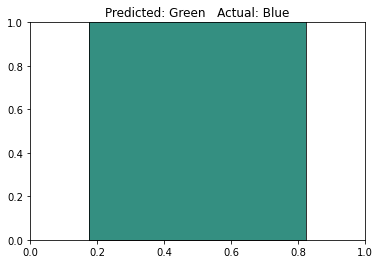

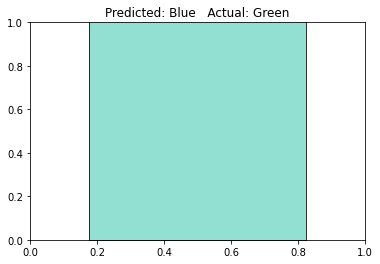

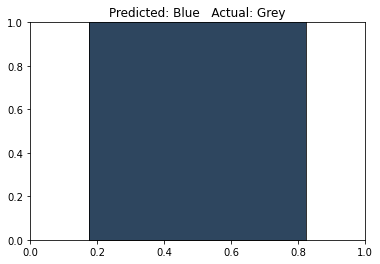

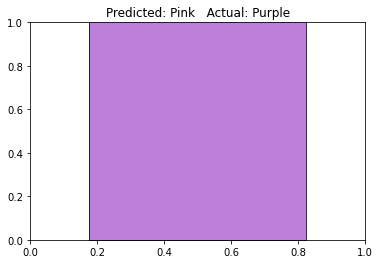

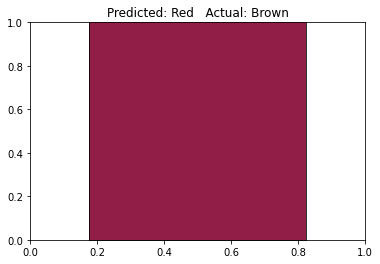

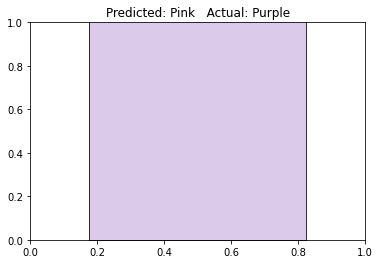

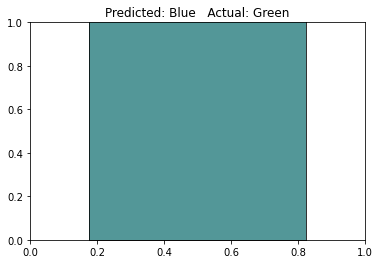

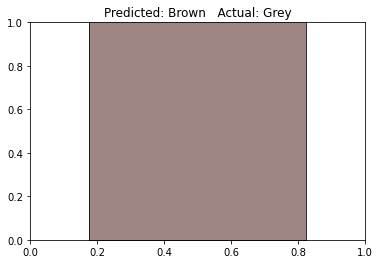

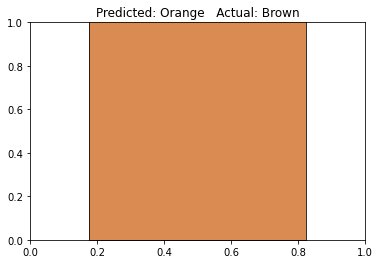

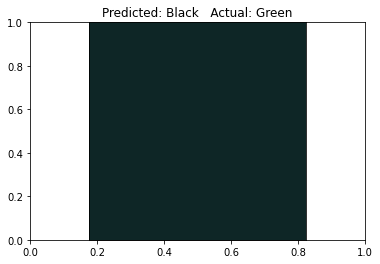

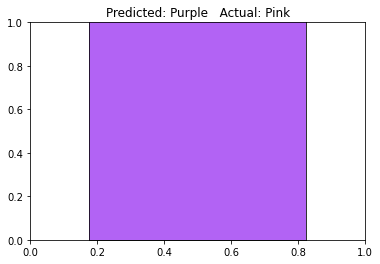

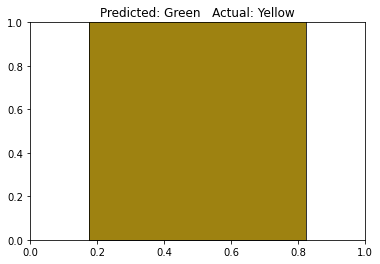

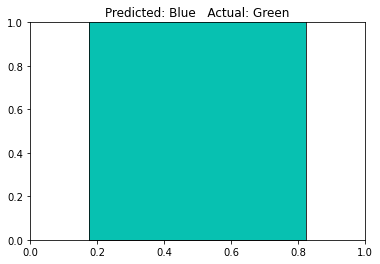

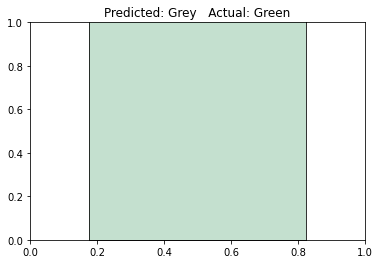

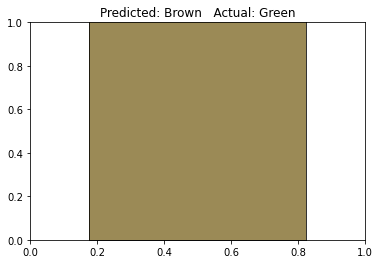

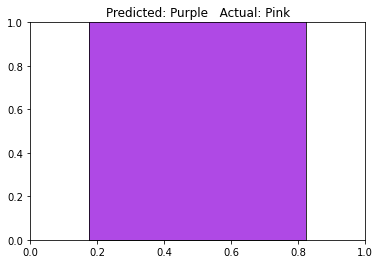

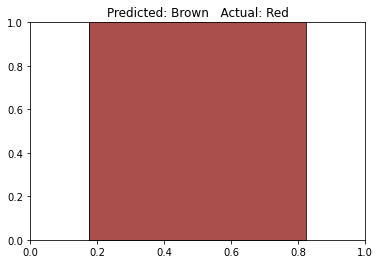

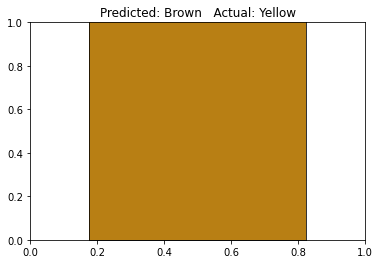

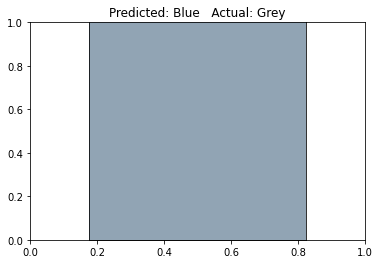

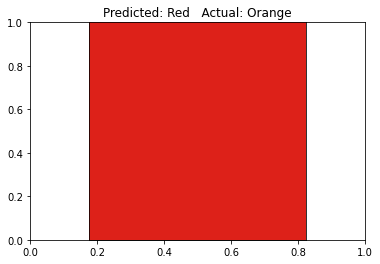

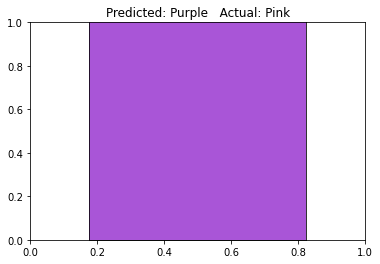

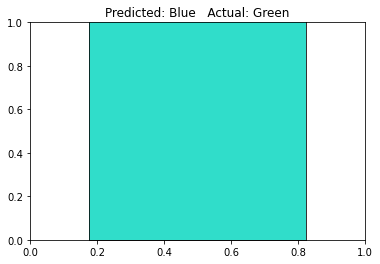

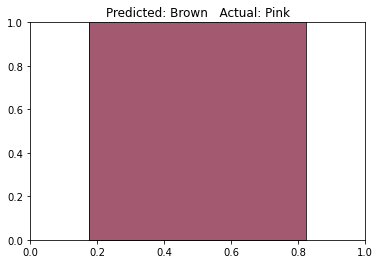

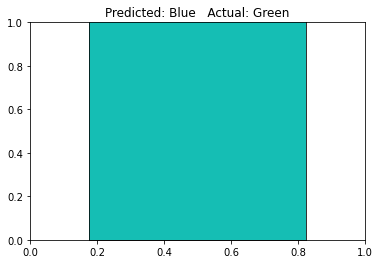

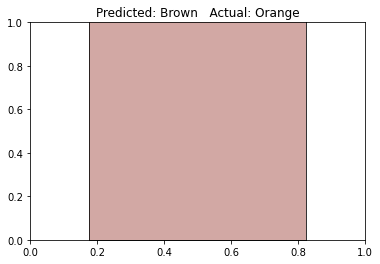

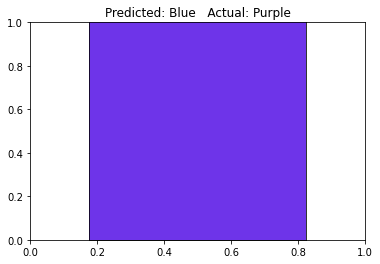

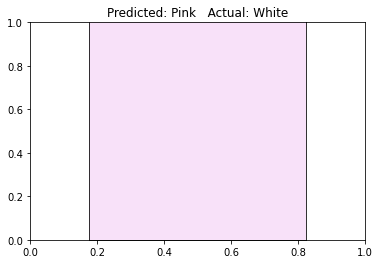

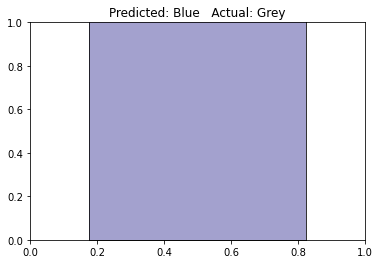

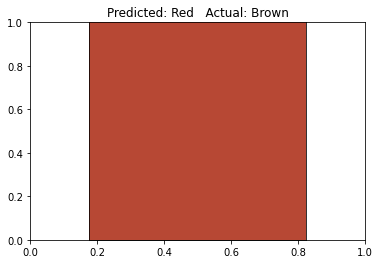

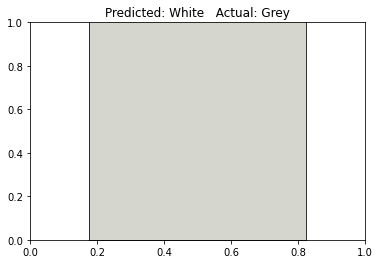

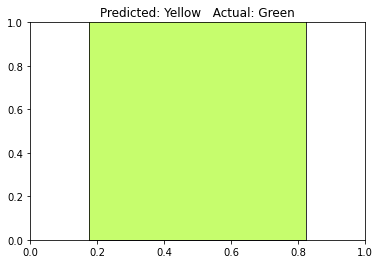

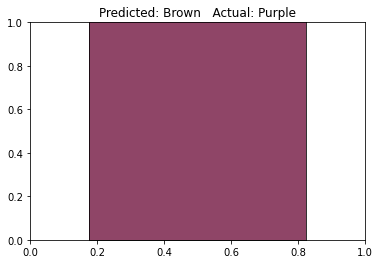

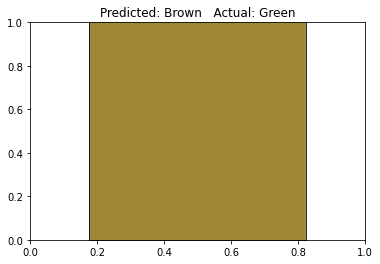

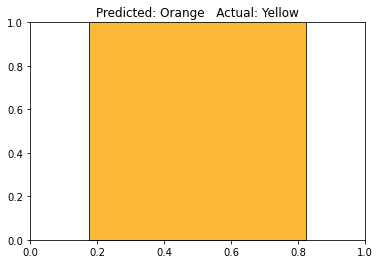

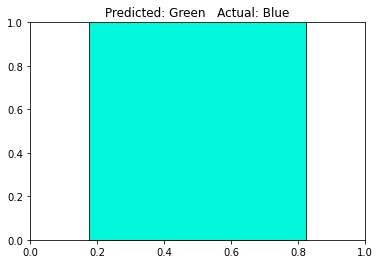

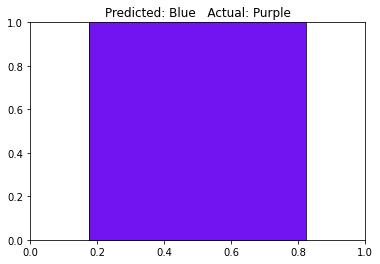

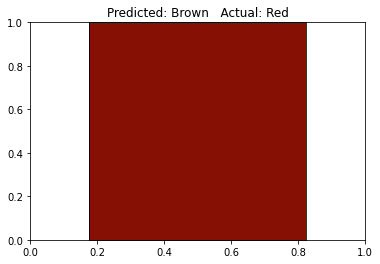

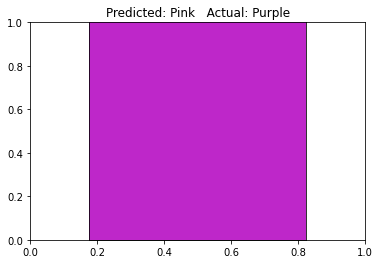

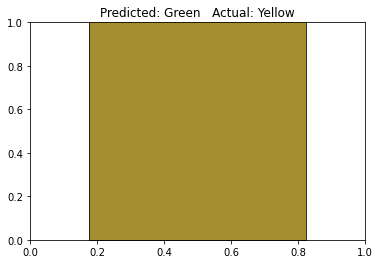

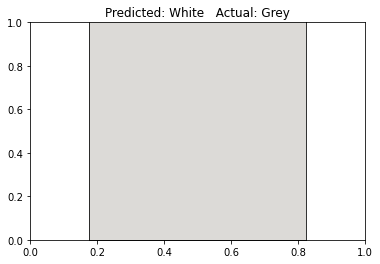

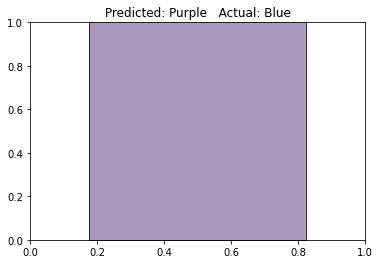

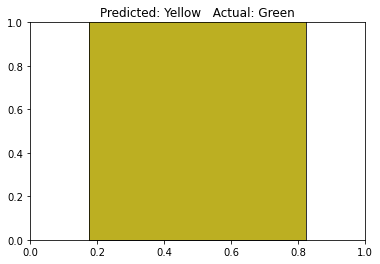

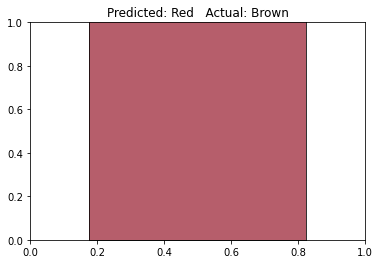

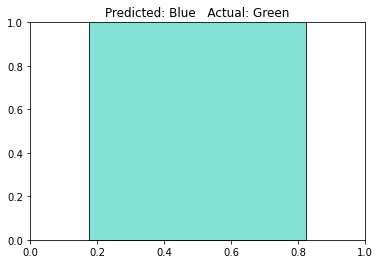

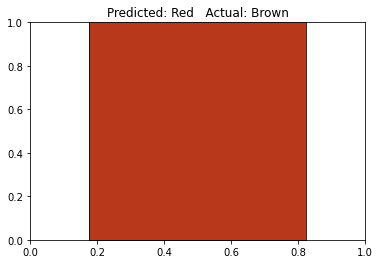

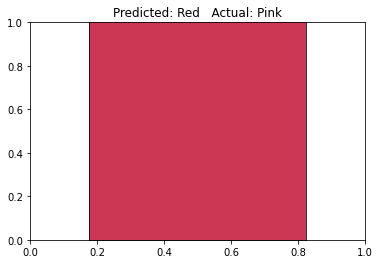

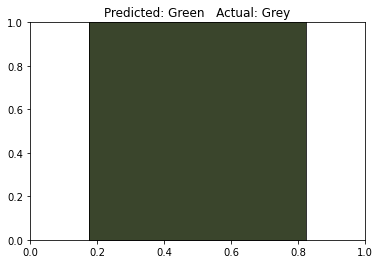

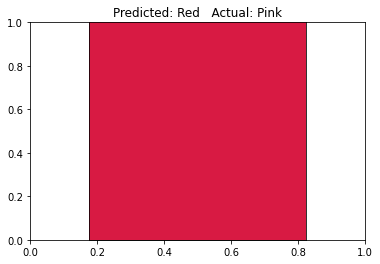

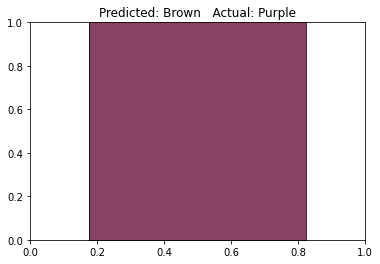

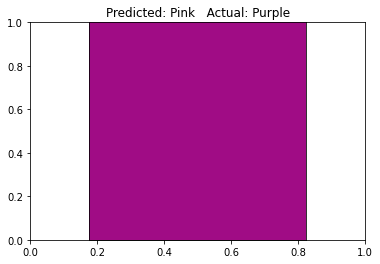

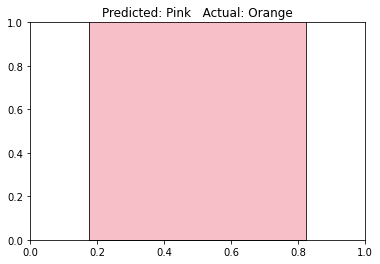

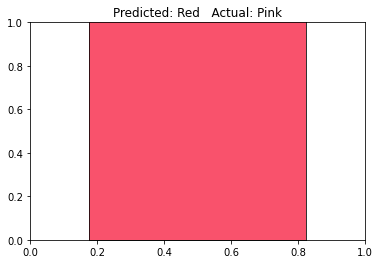

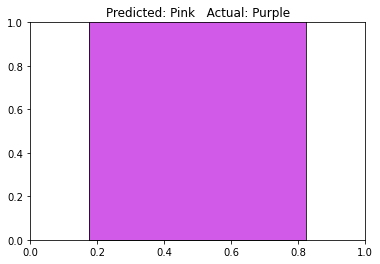

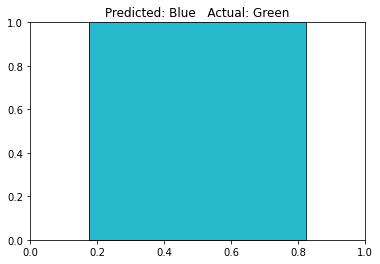

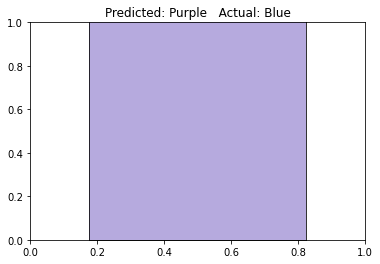

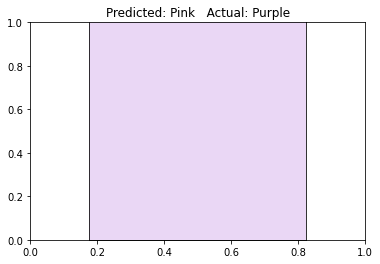

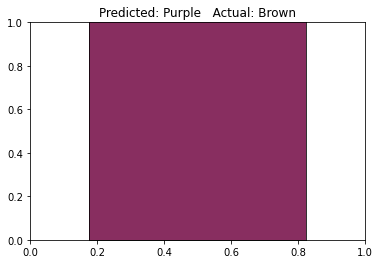

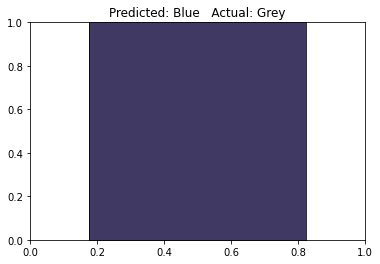

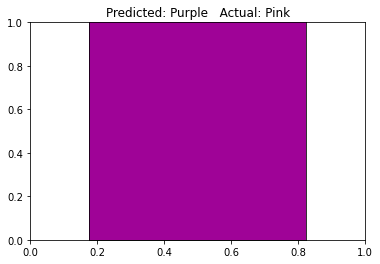

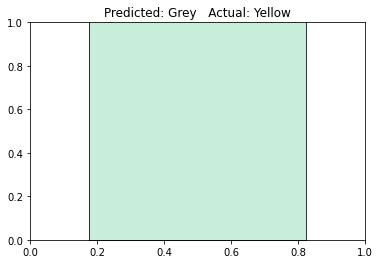

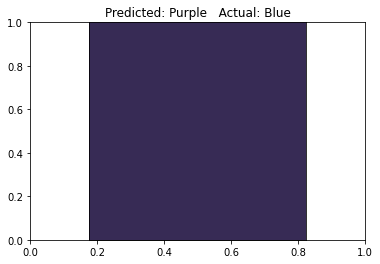

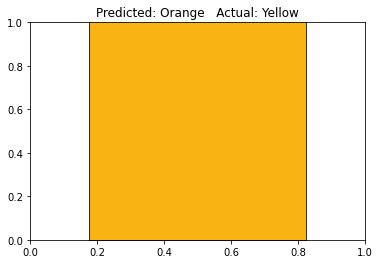

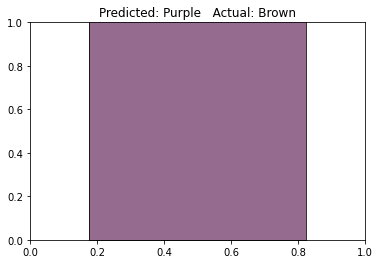

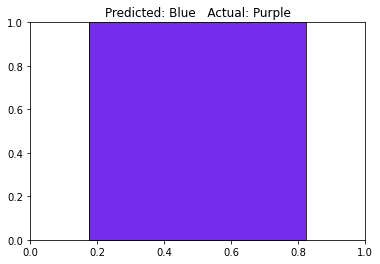

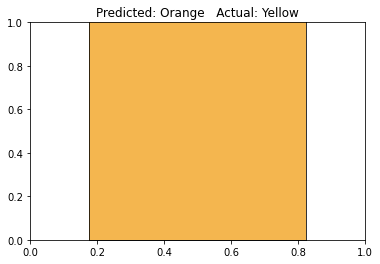

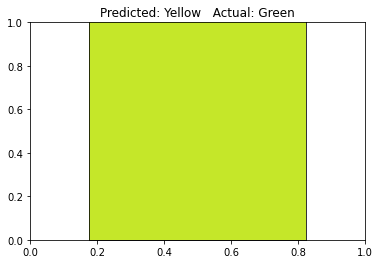

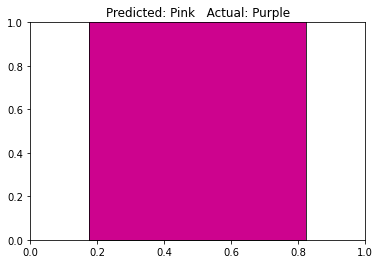

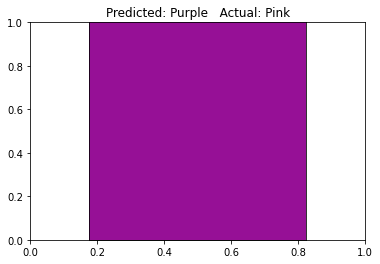

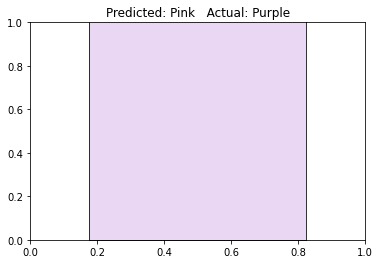

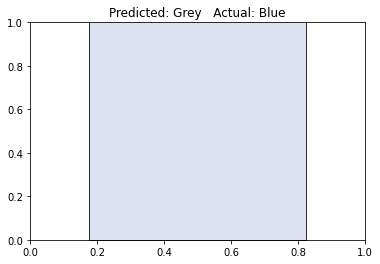

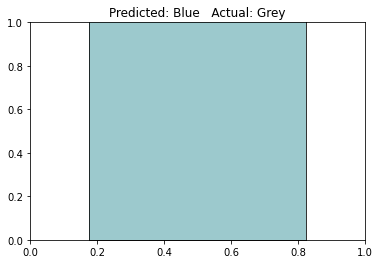

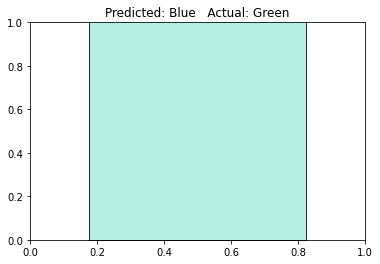

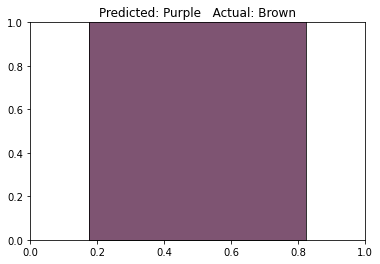

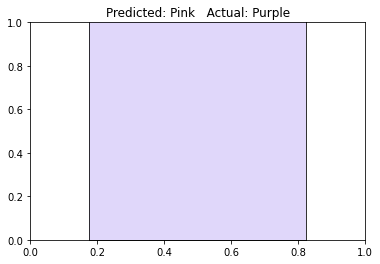

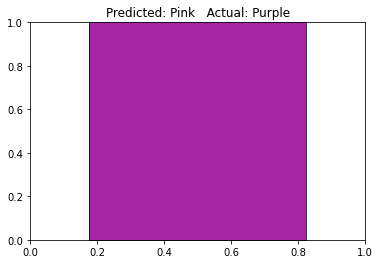

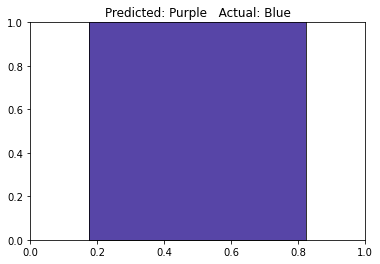

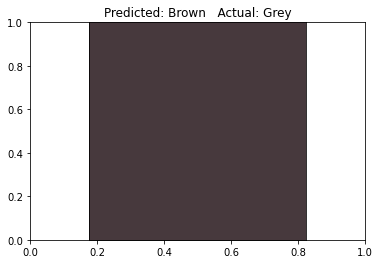

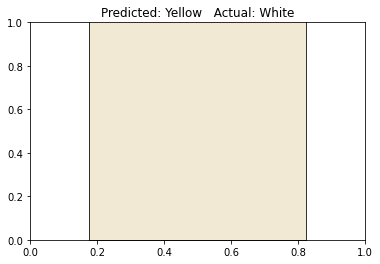

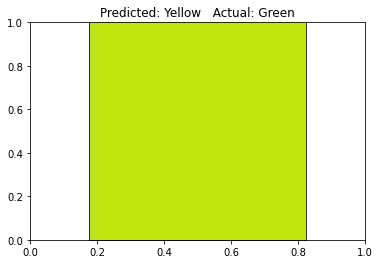

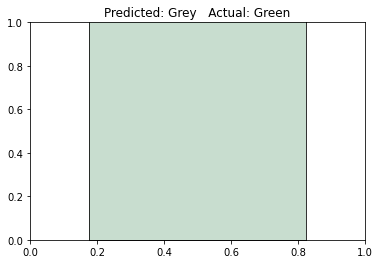

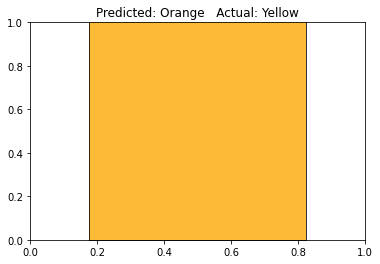

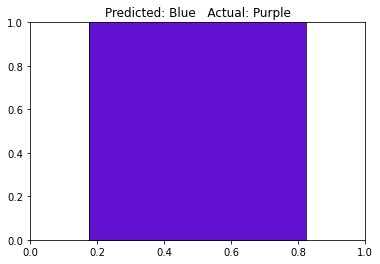

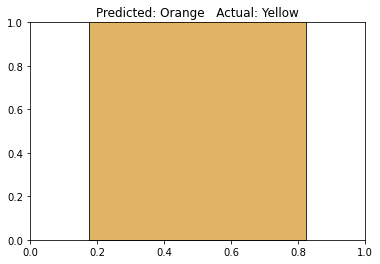

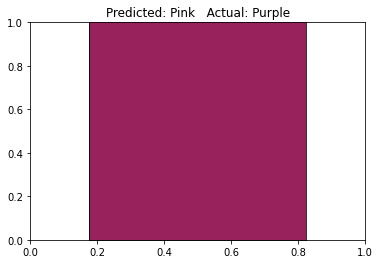

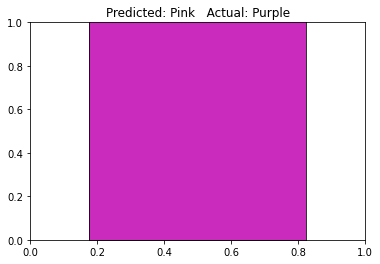

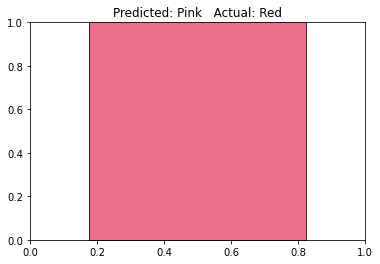

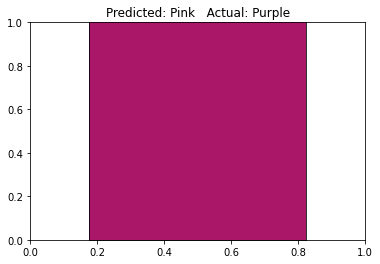

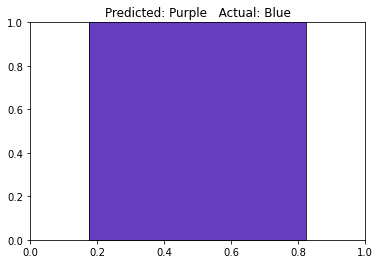

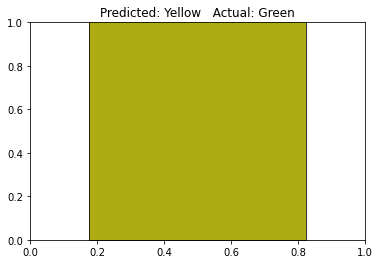

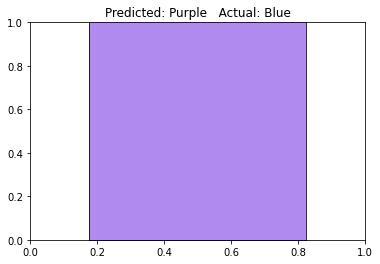

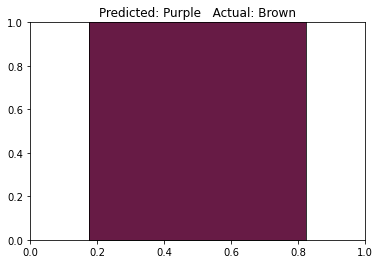

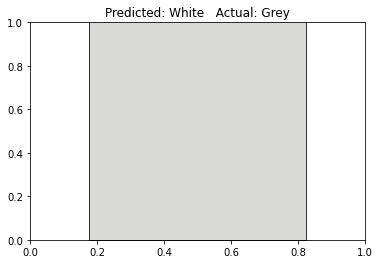

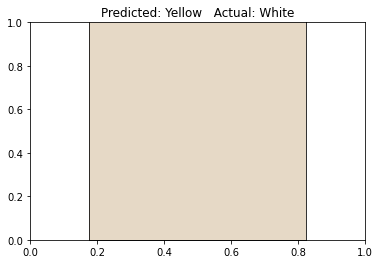

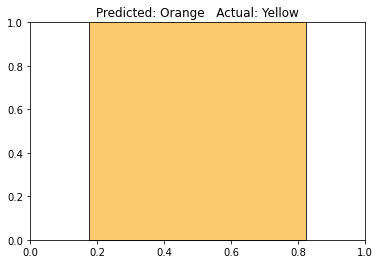

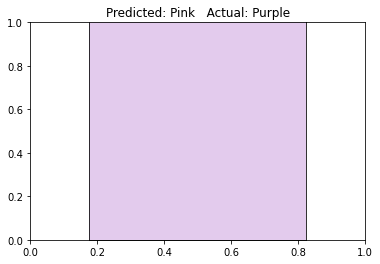

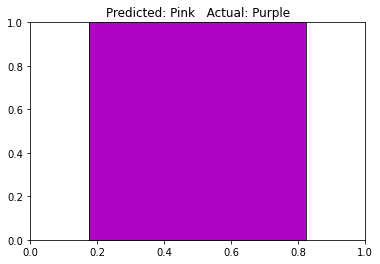

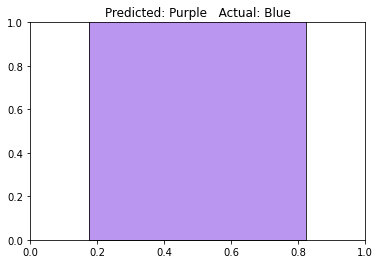

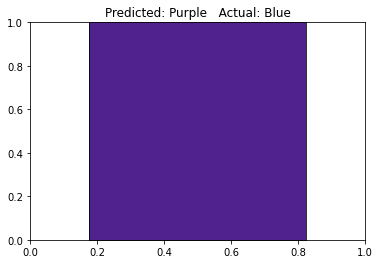

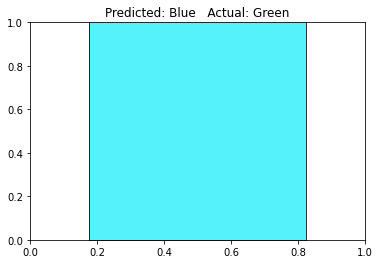

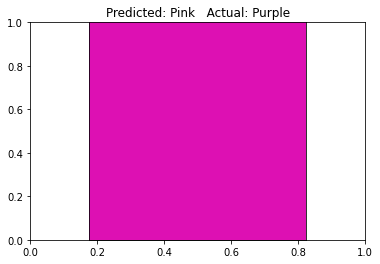

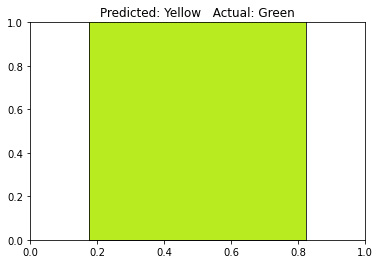

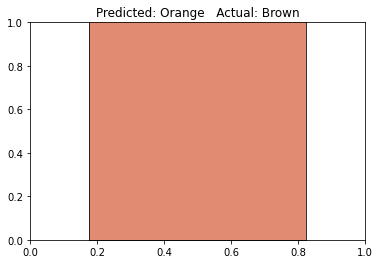

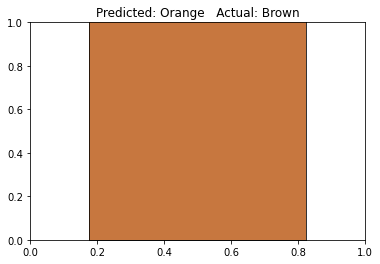

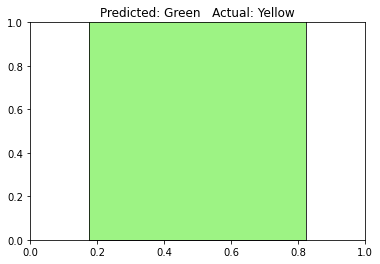

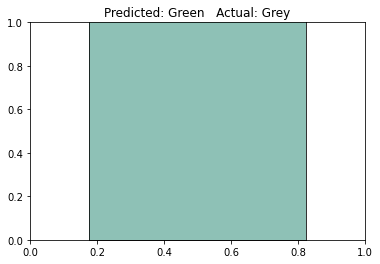

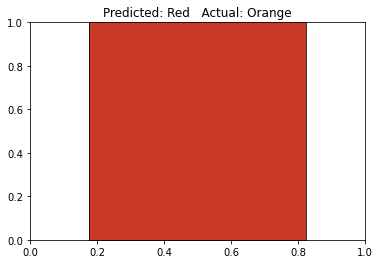

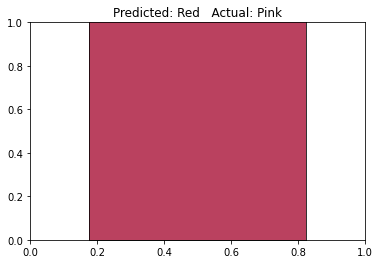

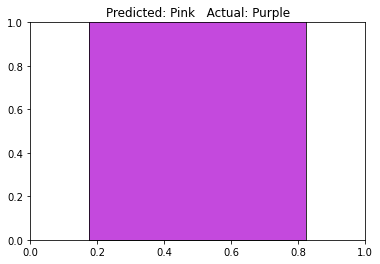

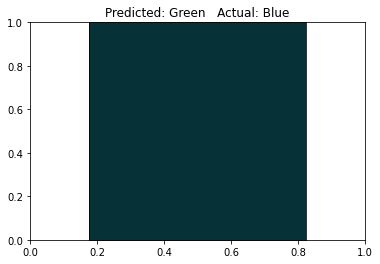

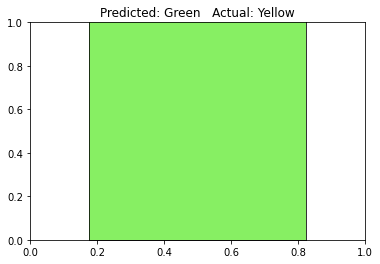

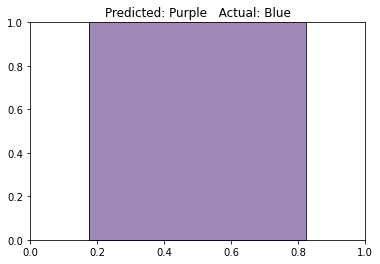

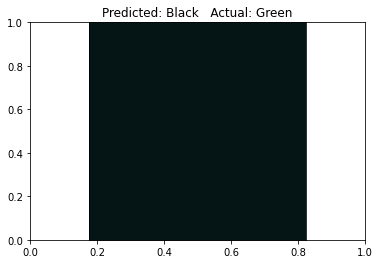

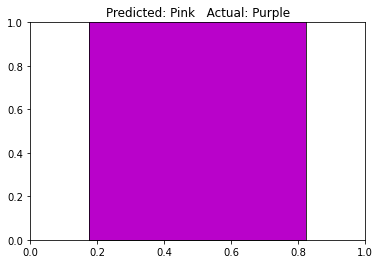

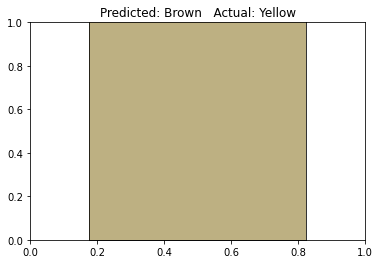

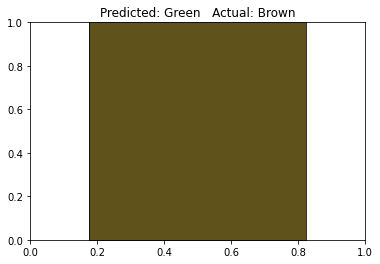

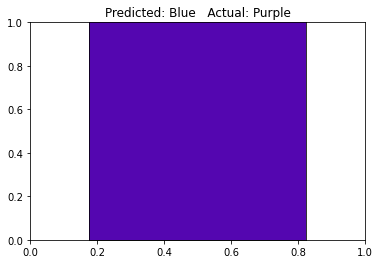

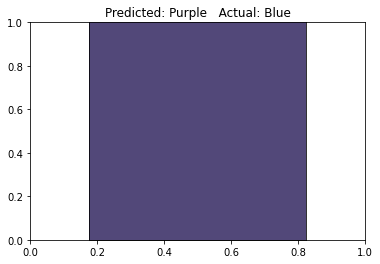

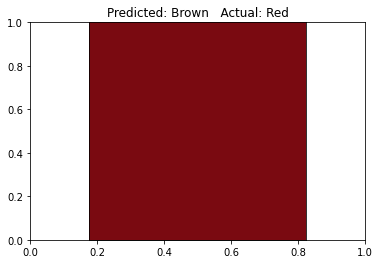

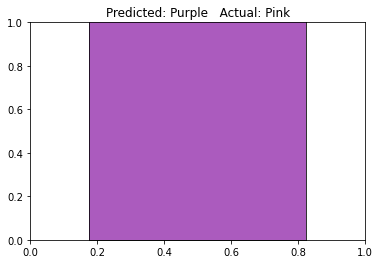

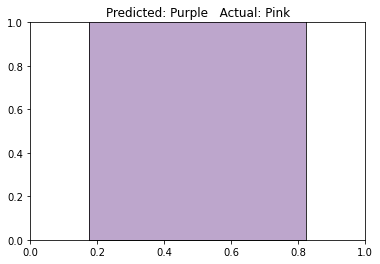

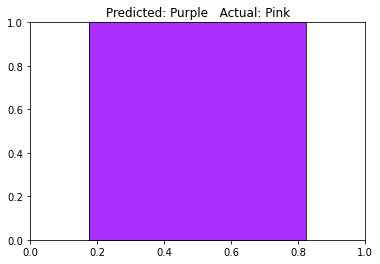

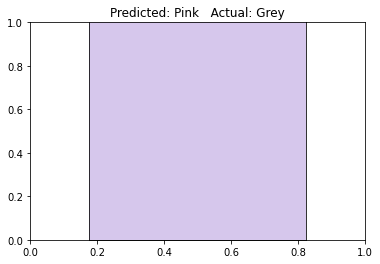

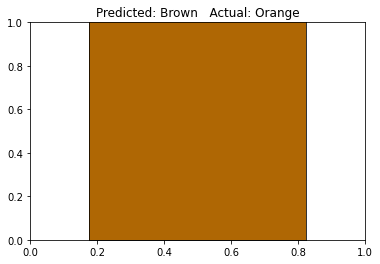

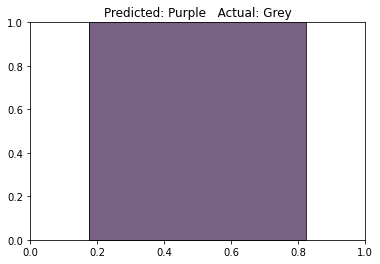

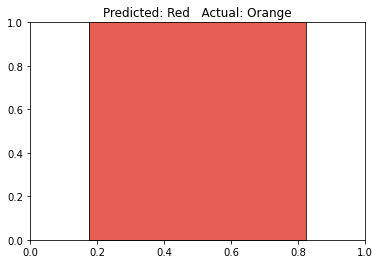

In [115]:
import matplotlib.patches as patches

for idx in color_data_aug.loc[color_data_aug.label != color_data_aug.prediction].index:
    example = color_data_aug.loc[idx,:]
    example_color = (example['red']/255, example['green']/255, example['blue']/255)
    
    fig, ax = plt.subplots()
    ax = fig.add_subplot(111, aspect='equal')
    ax.xaxis.set_visible(False) # Disable axis x 
    ax.yaxis.set_visible(False) # Disable axis y
    ax.add_patch(patches.Rectangle((0,0), 1, 1, color=example_color))
    ax.set_title(f"Predicted: {example['prediction']}   Actual: {example['label']}")
    plt.show(block=False);

The "mistakes" the model don't appear to be hugely problematic; the model has clearly "learned" something about colors. Let's go ahead and use this model to label the dominant color in the cover of each book in our library.

In [116]:
model4.save('color-classifier')

INFO:tensorflow:Assets written to: color-classifier/assets


Try using a decision tree, since it seems particularly suited to this type of problem (based on what I know about RGB values.)

In [134]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=seed)

In [129]:
X_train.head()

red  green  blue
2860   66    184   240
4491  227    111   214
3778   43      1    66
527    61    127   159
2395   77    252    50

In [130]:
color_data['label'].head()

0     Blue
1    Brown
2    Green
3     Pink
4    Green
Name: label, dtype: object

Label encode the target:

In [133]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_y_train = le.fit_transform(color_data.loc[X_train.index, 'label'].copy())
le_y_test = le.transform(color_data.loc[X_test.index, 'label'].copy())

print(le_y_train.shape)
print(le_y_test.shape)
print(le_y_train[:5])

(4041,)
(1011,)
[1 6 0 1 3]


Get a baseline score for decision tree with cross validation:

In [137]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(dt, X_train, le_y_train, scoring='accuracy', return_train_score=True)

In [139]:
print(f"Mean training accuracy: {np.mean(cv_results['train_score'])}")
print(f"Mean testing accuracy: {np.mean(cv_results['test_score'])}")

Mean training accuracy: 1.0
Mean testing accuracy: 0.8126794477964483


The model has 100% accuracy on the training set, and 81% average accuracy on the validation set.

In [145]:
X_val = X_train.sample(frac=0.2, random_state=seed)
le_y_val = pd.Series(le_y_train, index=X_train.index).loc[X_val.index].copy()

In [148]:
small_X_train = X_train.drop(X_val.index, axis=0)
small_y_train = pd.Series(le_y_train, index=X_train.index).loc[small_X_train.index].copy()

In [149]:
print(X_val.shape)
print(le_y_val.shape)

print(small_X_train.shape)
print(small_y_train.shape)

(808, 3)
(808,)
(3233, 3)
(3233,)


In [150]:
dt.fit(small_X_train, small_y_train)

dt.score(X_val, le_y_val)

0.8106435643564357

In [152]:
dt.get_n_leaves()

494

In [154]:
dt.get_depth()

17

In [157]:
dt2 = DecisionTreeClassifier(class_weight='balanced', random_state=seed)

dt2.fit(small_X_train, small_y_train)

dt2.score(X_val, le_y_val)

0.8056930693069307

In [158]:
dt3 = DecisionTreeClassifier(max_depth=10, random_state=seed)

dt3.fit(small_X_train, small_y_train)

dt3.score(X_val, le_y_val)

0.8254950495049505

In [161]:
depths = [5, 10, 11, 12, 15]

for depth in depths:
    dt4 = DecisionTreeClassifier(max_depth=depth, random_state=seed)
    
    print(f'Depth: {depth}')
    print(f"Score: {np.mean(cross_validate(dt4, small_X_train, small_y_train, scoring='accuracy')['test_score'])}")

Depth: 5
Score: 0.7612098707538004
Depth: 10
Score: 0.8153382364903987
Depth: 11
Score: 0.8125556868806255
Depth: 12
Score: 0.8205994803355328
Depth: 15
Score: 0.8103904182676894


Let's try using a random forest to "balance out" the variance of individual trees.

In [163]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=seed)

cv_results = cross_validate(rf, X_train, le_y_train, scoring='accuracy', return_train_score=True)

print(f"Mean training accuracy: {np.mean(cv_results['train_score'])}")
print(f"Mean testing accuracy: {np.mean(cv_results['test_score'])}")

Mean training accuracy: 1.0
Mean testing accuracy: 0.8619212693828097


In [165]:
rf.fit(small_X_train, small_y_train)

rf.score(X_val, le_y_val)

0.8626237623762376

In [166]:
np.mean([tree.get_depth() for tree in rf.estimators_])

17.31

In [167]:
rf2 = RandomForestClassifier(max_depth=12, random_state=seed)

rf2.fit(small_X_train, small_y_train)

rf2.score(X_val, le_y_val)

0.8601485148514851

In [168]:
depths = [1, 3, 5, 10, 15, 20]

for depth in depths:
    rf3 = RandomForestClassifier(max_depth=depth, random_state=seed)

    print(f'Depth: {depth}')
    print(f"Score: {np.mean(cross_validate(rf3, small_X_train, small_y_train, scoring='accuracy')['test_score'])}")

Depth: 1
Score: 0.49273761729535226
Depth: 3
Score: 0.7110981381082491
Depth: 5
Score: 0.8100879984304793
Depth: 10
Score: 0.8611213459596806
Depth: 15
Score: 0.8589555988343438
Depth: 20
Score: 0.8586469583359252


In [169]:
depths = list(range(6, 15))

for depth in depths:
    rf4 = RandomForestClassifier(max_depth=depth, random_state=seed)

    print(f'Depth: {depth}')
    print(f"Score: {np.mean(cross_validate(rf4, small_X_train, small_y_train, scoring='accuracy')['test_score'])}")

Depth: 6
Score: 0.8348323531804327
Depth: 7
Score: 0.8493690813997444
Depth: 8
Score: 0.8574095252678473
Depth: 9
Score: 0.8589565558591451
Depth: 10
Score: 0.8611213459596806
Depth: 11
Score: 0.8611203889348793
Depth: 12
Score: 0.8577172087414645
Depth: 13
Score: 0.8592623252831597
Depth: 14
Score: 0.8626664625013758


In [172]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=seed)

cv_results = cross_validate(ada, X_train, le_y_train, scoring='accuracy', return_train_score=True)

print(f"Mean training accuracy: {np.mean(cv_results['train_score'])}")
print(f"Mean testing accuracy: {np.mean(cv_results['test_score'])}")

Mean training accuracy: 0.5003106883530914
Mean testing accuracy: 0.5013581735182171


In [174]:
forest_size = [50, 100, 150, 200, 250]

for num in forest_size:
    rf5 = RandomForestClassifier(max_depth=14, n_estimators=num, random_state=seed)
    
    print(f'Forest size: {num} trees')
    print(f"Score: {np.mean(cross_validate(rf5, small_X_train, small_y_train, scoring='accuracy')['test_score'])}")

Forest size: 50 trees
Score: 0.8574123963422512
Forest size: 100 trees
Score: 0.8626664625013758
Forest size: 150 trees
Score: 0.8623568649781559
Forest size: 200 trees
Score: 0.8654485335987481
Forest size: 250 trees
Score: 0.8626650269641738


I'm a little suprised that a decision tree or random forest didn't work better than it did, due to the nature of the problem.